In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-product-recommendation/test_ver2.csv.zip
/kaggle/input/santander-product-recommendation/sample_submission.csv.zip
/kaggle/input/santander-product-recommendation/train_ver2.csv.zip


In [2]:
#Importing the nessarray libraries

import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib  inline
from matplotlib import pylab 
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings("ignore")

In [3]:
# to customize the displayed area of the dataframe 
pylab.rcParams['figure.figsize'] = (10, 6) 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# reading the train data
df = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip')

In [5]:
#printing the shape of the data that train data is having the total rows and coloumns (13647309, 48)
df.shape

(13647309, 48)

In [6]:
#this shows all the coloumns in the tain data total-48 columns in the dataset.
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'], dtype='object')

In [7]:
# info method

"""df.info() method displays a summary of the dataframe df, 
including the number of non-null values and data types of each column, 
as well as the memory usage of the dataframe. 
It can be useful for quickly getting an overview of the 
data and identifying missing values or data types that need to be changed."""

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

* fecha_dato: Date of Data
* ncodpers: Customer Code
* ind_empleado: Employee Index
* pais_residencia: Customer's Country of Residence
* sexo: Customer's Gender
* age: Age
* fecha_alta: Date of First Contract with the Bank
* ind_nuevo: New Customer Index (1 if customer registered in the last 6 months)
* antiguedad: Customer Seniority (in months)
* indrel: Primary Customer Index (1 if the customer is the primary customer of the bank)
* ult_fec_cli_1t: Last Date as Primary Customer (if he/she is no longer)
* indrel_1mes: Customer type at the beginning of the month
* tiprel_1mes: Customer relation type at the beginning of the month
* indresi: Residence Index (S (Yes) or N (No) if the residence country is the same as the bank country)
* indext: Foreigner Index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
* conyuemp: Spouse Index (S (Yes) or N (No) if the customer is married to an employee)
* canal_entrada: Channel used by the customer to join
* indfall: Deceased index
* tipodom: Address type (1: primary address)
* cod_prov: Province code (customer's address)
* nomprov: Province name
* ind_actividad_cliente: Activity Index (1, active customer; 0, inactive customer)
* renta: Gross Income of the Household
* segmento: Segmentation: VIP, Individuals, or College Graduates
* ind_ahor_fin_ult1: Saving Account
* ind_aval_fin_ult1: Guarantees
* ind_cco_fin_ult1: Current Accounts
* ind_cder_fin_ult1: Derivada Account
* ind_cno_fin_ult1: Payroll Account
* ind_ctju_fin_ult1: Junior Account
* ind_ctma_fin_ult1: Más particular Account
* ind_ctop_fin_ult1: particular Account
* ind_ctpp_fin_ult1: particular Plus Account
* ind_deco_fin_ult1: Short-term deposits
* ind_deme_fin_ult1: Medium-term deposits
* ind_dela_fin_ult1: Long-term deposits
* ind_ecue_fin_ult1: e-account
* ind_fond_fin_ult1: Funds
* ind_hip_fin_ult1: Mortgage
* ind_plan_fin_ult1: Pensions 1
* ind_pres_fin_ult1: Loans
* ind_reca_fin_ult1: Taxes
* ind_tjcr_fin_ult1: Credit Card
* ind_valo_fin_ult1: Securities
* ind_viv_fin_ult1: Home Account
* ind_nomina_ult1: Payroll
* ind_nom_pens_ult1: Pensions 2
* ind_recibo_ult1: Direct Debit

### numerical columns: 
* ncodpers, 
* ind_nuevo,
* indrel,
* tipodom, 
* cod_prov, 
* ind_actividad_cliente, 
* renta, 
* ind_ahor_fin_ult1,
* ind_aval_fin_ult1, 
* ind_cco_fin_ult1, 
* ind_cder_fin_ult1,
* ind_cno_fin_ult1,
* ind_ctju_fin_ult1,
* ind_ctma_fin_ult1,
* ind_ctop_fin_ult1, 
* ind_ctpp_fin_ult1, 
* ind_deco_fin_ult1,
* ind_deme_fin_ult1,
* ind_dela_fin_ult1,
* ind_ecue_fin_ult1,
* ind_fond_fin_ult1, 
* ind_hip_fin_ult1, 
* ind_plan_fin_ult1, 
* ind_pres_fin_ult1,
* ind_reca_fin_ult1, 
* ind_tjcr_fin_ult1, 
* ind_valo_fin_ult1, 
* ind_viv_fin_ult1, 
* ind_nomina_ult1, 
* ind_nom_pens_ult1,
* ind_recibo_ult1

### categorical columns: 
* fecha_dato,
* ind_empleado, 
* pais_residencia, 
* sexo, 
* age, 
* fecha_alta, 
* ult_fec_cli_1t, 
* ndrel_1mes, 
* tiprel_1mes, 
* indresi, 
* indext, 
* conyuemp, 
* canal_entrada, 
* indfall, 
* nomprov, 
* segmento

### The columns that are neither numerical or categorical are:
* fecha_dato: Date of observation
* ncodpers: Customer code
* fecha_alta: Date when the customer became as the first holder of a contract in the bank
* ult_fec_cli_1t: Last date as primary customer (if he isn't at the end of the month)
* tipodom: Addres type. 1, primary address. 2, address declared.
* cod_prov: Province code (customer's address)
* nomprov: Province name (customer's address)
* renta: Gross income of the household to which the customer belongs

In [8]:
# Get numerical columns
num_cols = [col for col in df.columns[:24] if df[col].dtype in ['int64', 'float64']]

"""summary statistics for numerical columns which prints the count, mean, 
standard deviation, minimum, maximum and quartiles for each of the numeric columns."""

print(df[num_cols].describe())



           ncodpers     ind_nuevo        indrel     tipodom      cod_prov  ind_actividad_cliente         renta
count  1.364731e+07  1.361958e+07  1.361958e+07  13619574.0  1.355372e+07           1.361958e+07  1.085293e+07
mean   8.349042e+05  5.956184e-02  1.178399e+00         1.0  2.657147e+01           4.578105e-01  1.342543e+05
std    4.315650e+05  2.366733e-01  4.177469e+00         0.0  1.278402e+01           4.982169e-01  2.306202e+05
min    1.588900e+04  0.000000e+00  1.000000e+00         1.0  1.000000e+00           0.000000e+00  1.202730e+03
25%    4.528130e+05  0.000000e+00  1.000000e+00         1.0  1.500000e+01           0.000000e+00  6.871098e+04
50%    9.318930e+05  0.000000e+00  1.000000e+00         1.0  2.800000e+01           0.000000e+00  1.018500e+05
75%    1.199286e+06  0.000000e+00  1.000000e+00         1.0  3.500000e+01           1.000000e+00  1.559560e+05
max    1.553689e+06  1.000000e+00  9.900000e+01         1.0  5.200000e+01           1.000000e+00  2.889440e+07


In [9]:
# Get categorical columns
cat_cols = [col for col in df.columns[:24] if df[col].dtype == 'object']

"""summary statistics for categorical columns which prints the count, unique values, 
top value and frequency of the top value for each of the categorical columns."""

print(df[cat_cols].describe())


        fecha_dato ind_empleado pais_residencia      sexo       age  fecha_alta  antiguedad ult_fec_cli_1t  indrel_1mes tiprel_1mes   indresi    indext conyuemp canal_entrada   indfall   nomprov           segmento
count     13647309     13619575        13619575  13619505  13647309    13619575    13647309          24793   13497528.0    13497528  13619575  13619575     1808      13461183  13619575  13553718           13457941
unique          17            5             118         2       235        6756         507            223         13.0           5         2         2        2           162         2        52                  3
top     2016-05-28            N              ES         V        23  2014-07-28           0     2015-12-24          1.0           I         S         N        N           KHE         N    MADRID  02 - PARTICULARES
freq        931453     13610977        13553710   7424252    542682       57389      134335            763    7277607.0     7304875  13553711  1

In [10]:
# Loop through all categorical columns in the dataset
for col in cat_cols:
    # Count the number of unique values in the current column
    x = df[col].nunique()
    # Print a separator line for readability
    print('-' * 50)
    # Print the column name, number of unique values, and the unique values themselves
    print(f"# col {col}, n_uniq {x}, uniq {df[col].unique()}")


--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 5, uniq ['N' nan 'A' 'B' 'F' 'S']
--------------------------------------------------
# col pais_residencia, n_uniq 118, uniq ['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN'
 'TW' 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL'
 'RU' 'GT' 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA'
 'CI' 'QA' 'LU' 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR'
 'AO' 'CU' 'GQ' 'EG' 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK'
 'TN' 'TG' 'KR' 'GH' 'RS' 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 

Obervations - 

The dataset contains several columns, and for each column, the following observations were made:
1. The 'fecha_dato' column has have 17 months of data in the train set, starting from Jan 2015 through May 2016.
2. The 'ind_empleado' column has 5 unique values (N, A, B, F, S) along with missing values.
3. The 'pais_residencia' column has 118 unique values representing different countries with Spain (ES) being the most common value followed by missing values.
4. The 'sexo' column has 2 unique values (H, V) representing gender with missing values.
5. The 'age' column has 235 unique values representing the age of the customers with 'NA' being one of the unique values, which may be indicating missing values. Additionally, there are some numeric values in this column, ranging from 2 to 116.
6. Overall, the dataset appears to contain information about customers, with variables such as gender, age, and country of residence. The dataset also contains several categorical variables, with varying numbers of unique values. Additionally, there are some missing values in some of the columns, which will need to be handled accordingly during the data analysis process.


In [11]:
# Check for duplicates
#any duplicates
# Check for duplicates
if df.duplicated().any():
    print("Duplicates found in the dataset")
else:
    print("No duplicates found in the dataset")

    
# drop the duplicate values if any
# df.drop_duplicates(inplace=True)


No duplicates found in the dataset


**Now Lets plot the Bar plots for all the necessary columns.**

In [12]:
#convert numeric attributes to be numeric datatype
#age, whether customer is new, Customer seniority (in months), customer's primary status, address type, customer active?
numeric = ['age','antiguedad']
for attributes in numeric:
    #errors='coerce' - when value is invalid, set it to NAN
    df[attributes] = pd.to_numeric(df[attributes], errors='coerce')

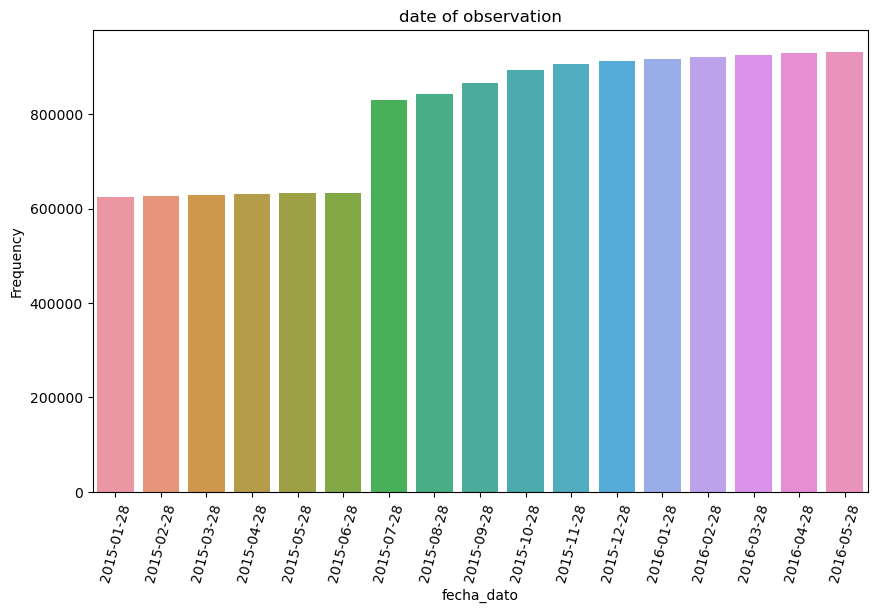

In [13]:
#plooting date of observation(fecha_dato)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='fecha_dato', data=df)
plt.xticks(rotation=75)
plt.title('date of observation')
plt.xlabel('fecha_dato')
plt.ylabel('Frequency')
plt.show()


There are 956645 unique customers


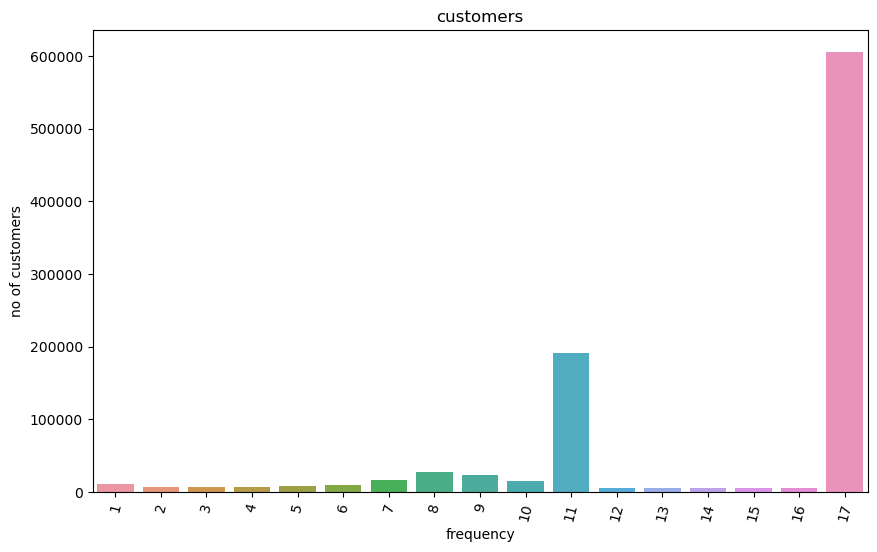

In [14]:
unique_cust_ids, freq = np.unique(df['ncodpers'], return_counts=True)
print('There are {} unique customers'.format(len(unique_cust_ids)))
# np.max(freq)
num_cust_ids = df.groupby(['ncodpers']).agg('size').value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=num_cust_ids.index, y=num_cust_ids.values)
plt.xticks(rotation=75)
plt.title('customers')
plt.xlabel('frequency')
plt.ylabel('no of customers')
plt.show()


Observation:

Most of the customers have either 17 or 11 months of data. 

It meas new customers are less.

unique values in Employee index :  5


Text(0, 0.5, 'Number of Employees')

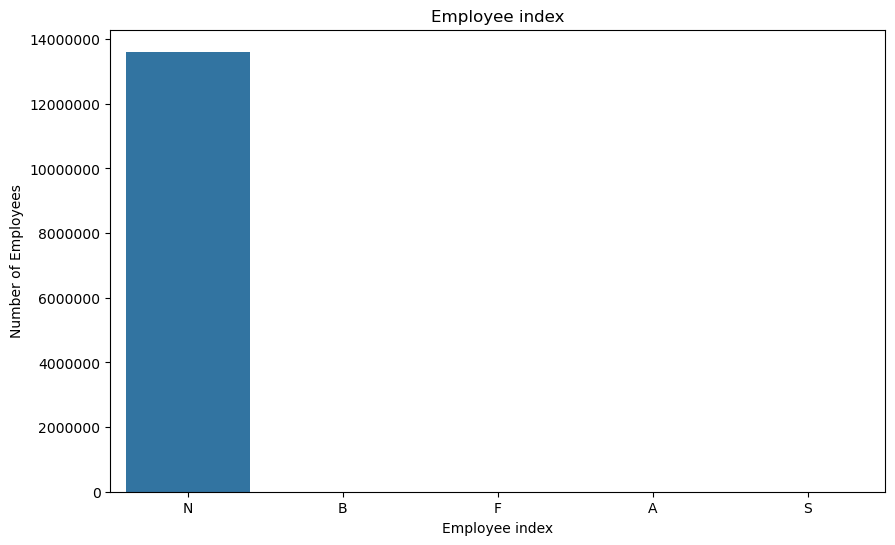

In [15]:
emp_status = df.ind_empleado.value_counts()
len_unique = len(emp_status)
print("unique values in Employee index : ",len_unique)


plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain')
sns.barplot(x=emp_status.index, y=emp_status.values)
plt.title('Employee index')
plt.xlabel('Employee index')
plt.ylabel('Number of Employees')


Number of unique values in Employee Status :  5


Text(0, 0.5, 'Number of Employees-Log')

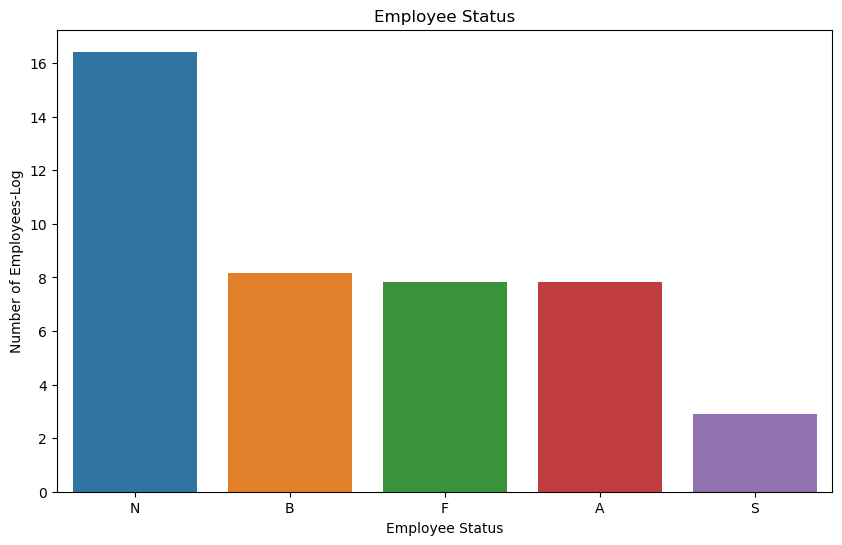

In [16]:
print("Number of unique values in Employee Status : ",len_unique)
plt.figure(figsize=(10,6))
sns.barplot(x=emp_status.index, y=np.log1p(emp_status.values))
plt.title('Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Number of Employees-Log')


Observation:Based on the analysis, it appears that might employees with a status other than 'N' that are not seen that is above this code, so for the better understanding of the Employee Status, had taken the logarithm of the count.

unique values of Cusotmers Country :  118


Text(0, 0.5, 'no of Customers')

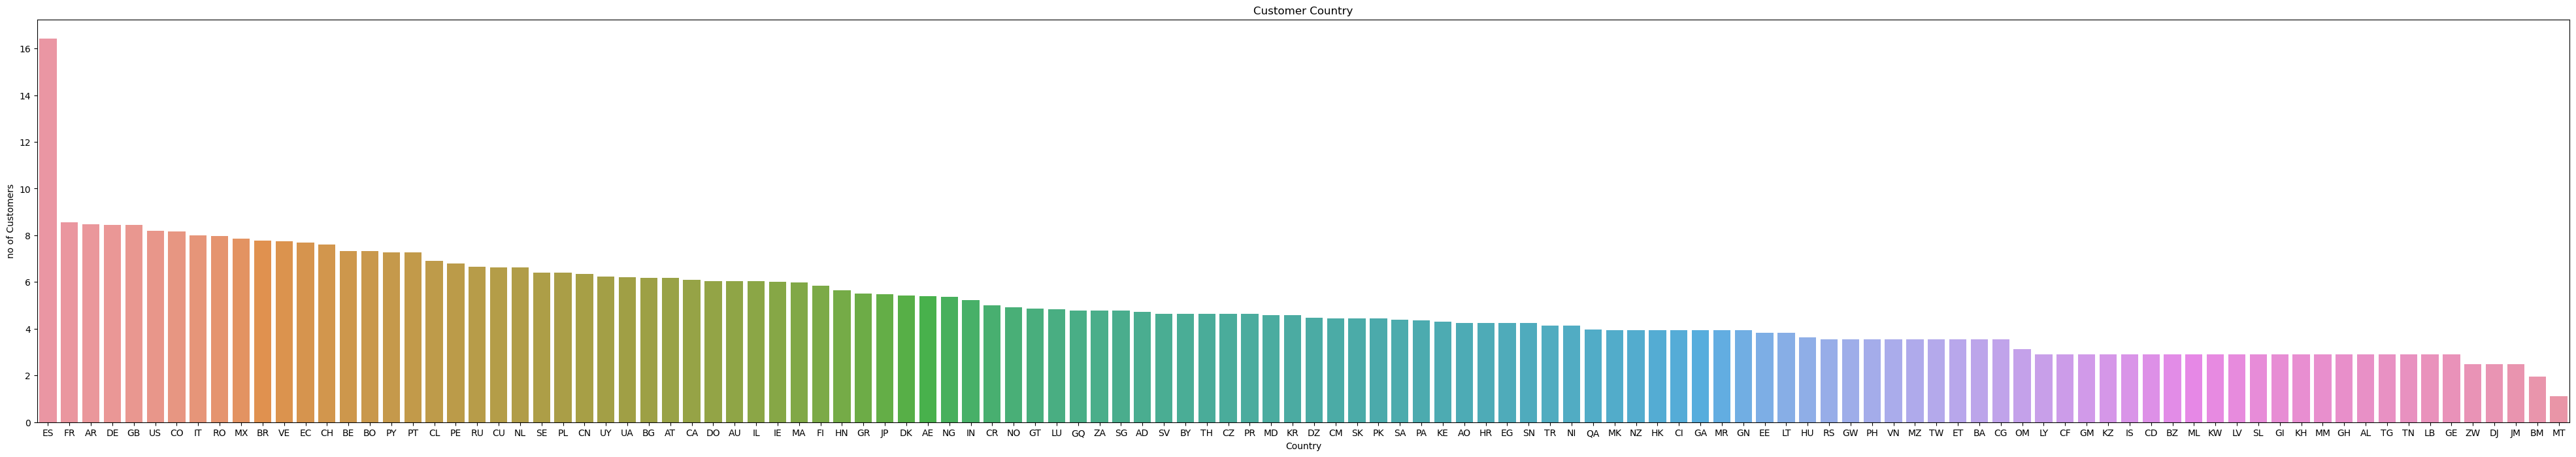

In [17]:
country = df['pais_residencia'].value_counts()
len_unique = len(country)
print("unique values of Cusotmers Country : ",len_unique)

plt.figure(figsize=(50,8))
sns.barplot(x=country.index, y=np.log1p(country.values))
plt.title('Customer Country')
plt.xlabel('Country')
plt.ylabel('no of Customers')


Observations - so most of the customers lives/ are in spain according to the plot, Spain - ES.

According to the countory codes(https://worldwide.espacenet.com/patent/help/countrycodes)

Number of unique values in Gender :  2


Text(0, 0.5, 'no of customers')

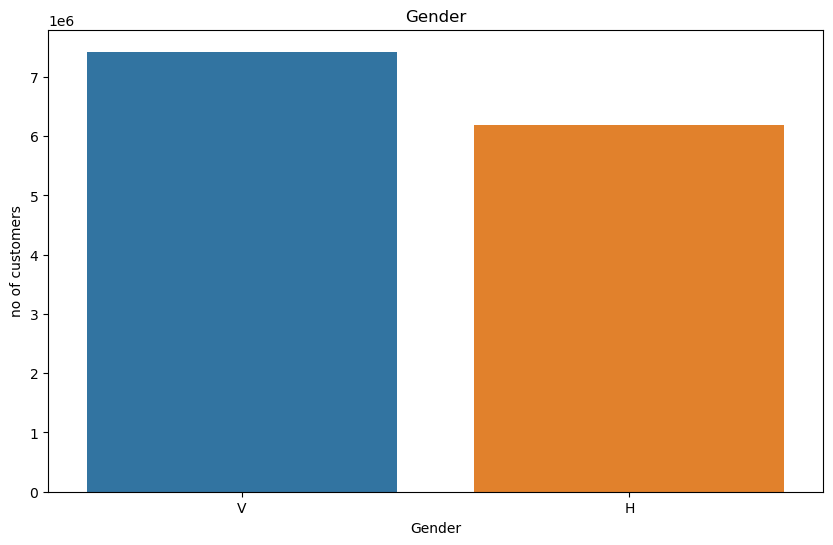

In [18]:
gender = df['sexo'].value_counts()
len_unique = len(gender)
print("Number of unique values in Gender : ",len_unique)

plt.figure(figsize=(10,6))
# sns.barplot(x=gender.index, y=np.log1p(gender.values))
sns.barplot(x=gender.index, y=(gender.values))
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('no of customers')


unique values in Customer Age:  120
minumun age of customer :  2.0
maximum age of customer :  164.0
Average age of customer :  40.18146491355274


Text(0, 0.5, 'Number of Customers')

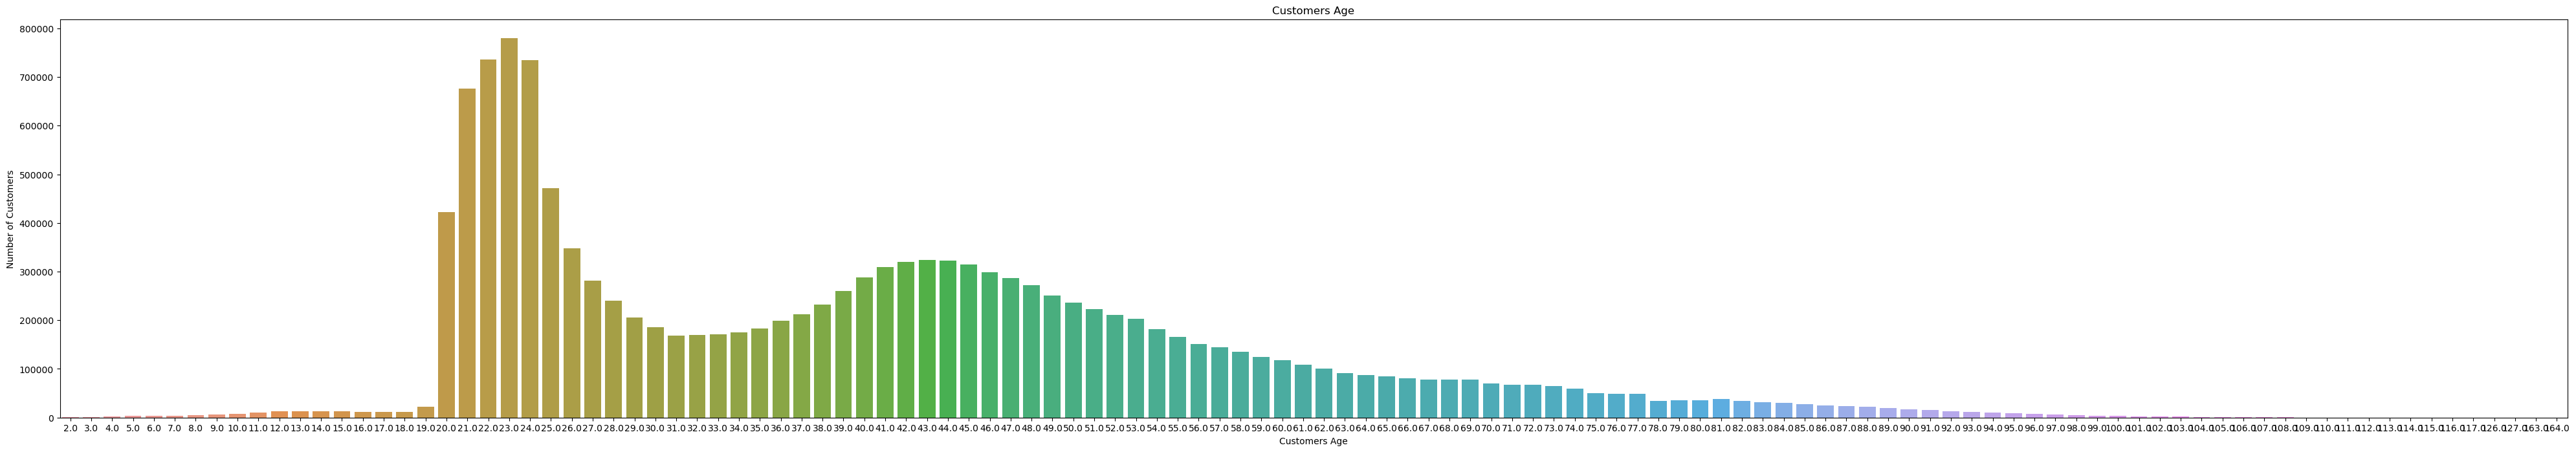

In [19]:
# df['age'] = df['age'].replace(' NA', float('nan')) # Replace ' NA' with NaN
# df['age'] = df['age'].astype(float).astype('Int64') # Convert to int after replacing NaN

customer_age = df['age'].value_counts(dropna=True)
len_unique = len(customer_age)
print("unique values in Customer Age: ", len_unique)
print("minumun age of customer : ", df['age'].min())
print("maximum age of customer : ", df['age'].max())
print("Average age of customer : ", df['age'].mean())

plt.figure(figsize=(50,8))
sns.barplot(x=customer_age.index, y=customer_age.values)
plt.title('Customers Age')
plt.xlabel('Customers Age')
plt.ylabel('Number of Customers')


unique months in Customer's Joined Date :  12

more Customer joined in the month of  :  10
less Customer joined in the month of :  6


Text(0, 0.5, 'no of employee')

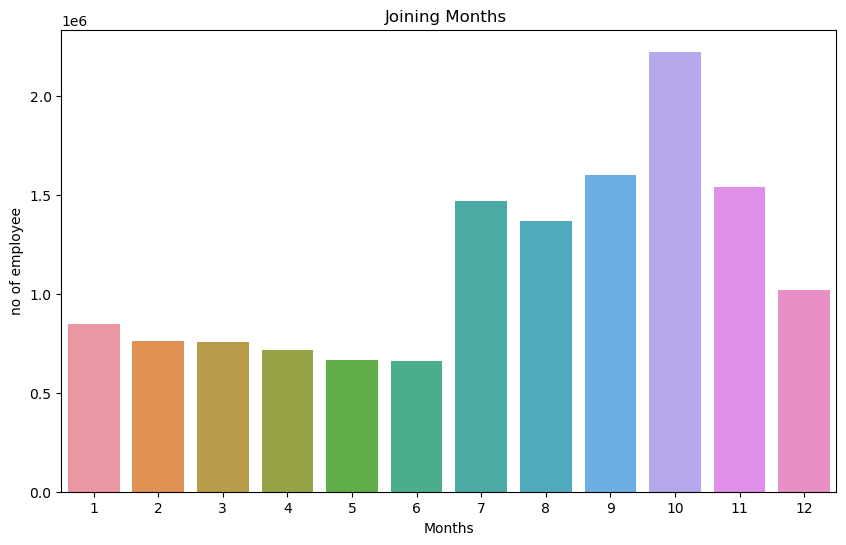

In [20]:
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], format='%Y-%m-%d')

join_month = df['fecha_alta'].dt.month.value_counts()

len_unique = len(join_month)
print("unique months in Customer\'s Joined Date : ",len_unique)
print("")
print("more Customer joined in the month of  : ", join_month.index.astype(int)[0])
print("less Customer joined in the month of : ", join_month.index.astype(int)[11])

plt.figure(figsize=(10,6))
sns.barplot(x=join_month.index.astype(int), y=join_month.values)
plt.title('Joining Months ')
plt.xlabel('Months')
plt.ylabel('no of employee')


unique days in Customers Joined Date :  31

More Customers joined on  :  3
less Customes joined on :  26


Text(0, 0.5, 'no of employees')

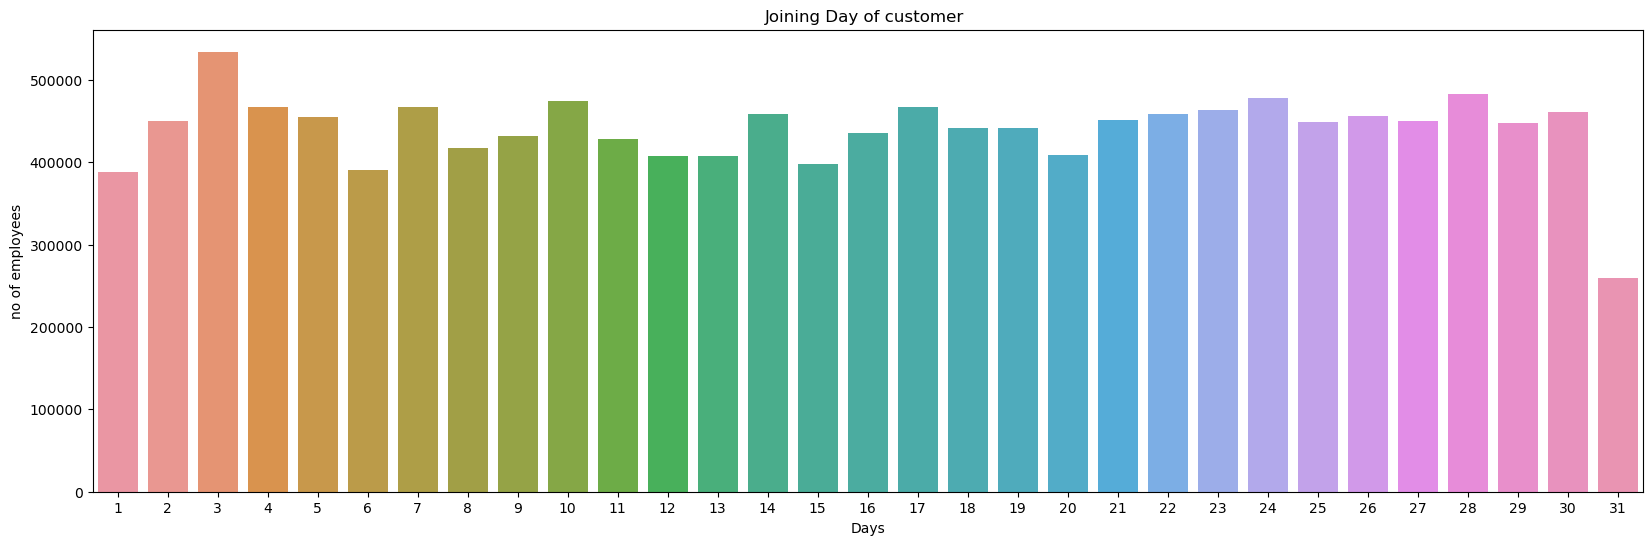

In [21]:
join_day = df['fecha_alta'].dt.day.value_counts()

len_unique = len(join_day)
print("unique days in Customers Joined Date : ",len_unique)
print("")
print("More Customers joined on  : ", join_day.index.astype(int)[0])
print("less Customes joined on : ", join_day.index.astype(int)[11])

plt.figure(figsize=(20,6))
sns.barplot(x=join_day.index.astype(int), y=join_day.values)
plt.title('Joining Day of customer ')
plt.xlabel('Days')
plt.ylabel('no of employees')

Observation:

Most customer's have joined in the month of October. Not sure if there is any significance to October.
Join Day's seems to be fairly evenly distributed.

Minimum value of Join Date :  199501.0
Maximum value of Join Date :  201605.0


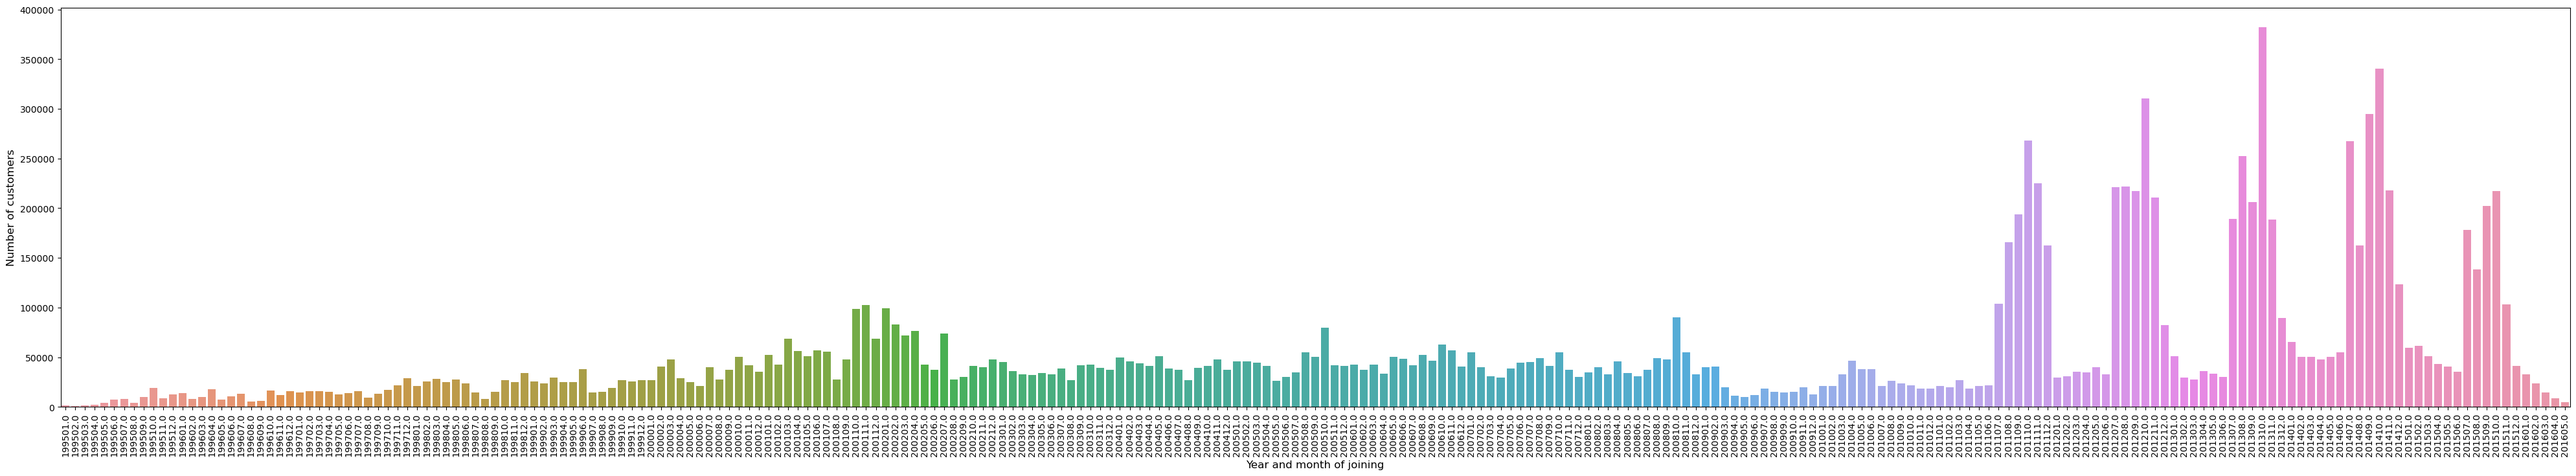

In [22]:
"""calculating the minimum and maximum join dates of the customers and plotting the bar chart 
showing the number of customers who joined the company in each month and year."""

join_year_month = df['fecha_alta'].apply(lambda x: (100*x.year) + x.month)
cnt_join_year_month = join_year_month.value_counts()
print("Minimum value of Join Date : ", min(cnt_join_year_month.index))
print("Maximum value of Join Date : ", max(cnt_join_year_month.index))

plt.figure(figsize=(50,8))
sns.barplot(x=cnt_join_year_month.index, y=cnt_join_year_month.values)
# sns.barplot(x=join_year_month.index, y=join_year_month.values)

plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

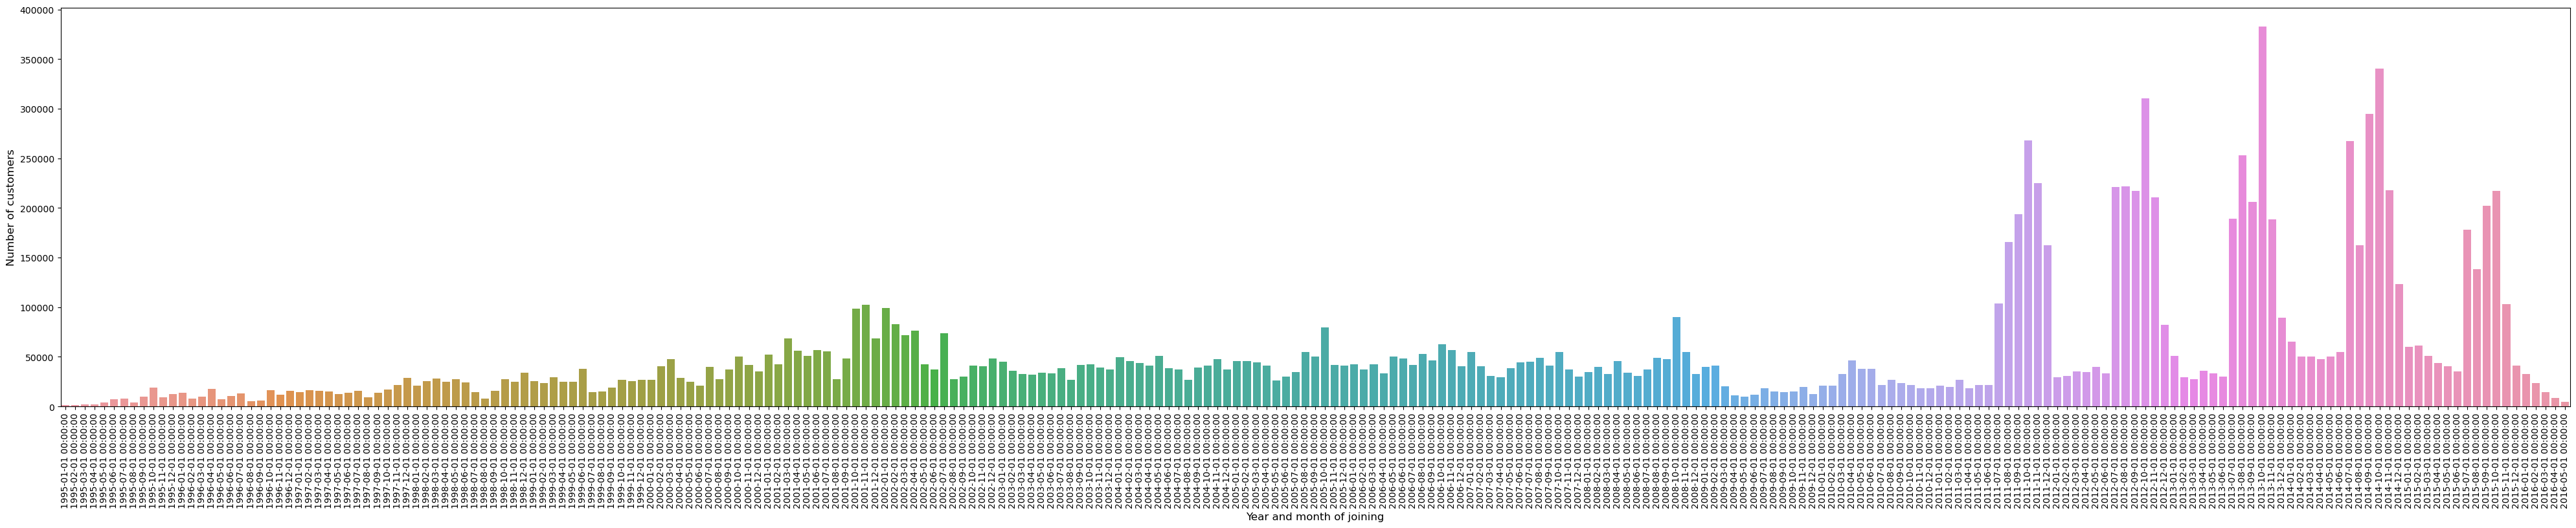

In [23]:
"""calculating the year and month of joining for each customer and counts the
number of customers who joined in each month and year. 
Then converting the index to a datetime format and sort
the values by index, then plotting a bar chart showing the number of 
customers who joined the company in each month and year."""


# Calculate the year and month of joining for each customer
join_year_month = df['fecha_alta'].apply(lambda x: (100*x.year) + x.month)
cnt_join_year_month = cnt_join_year_month.iloc[185:]
# Count the number of customers who joined in each month and year
cnt_join_year_month = join_year_month.value_counts()

# Convert the index to a datetime format
cnt_join_year_month.index = pd.to_datetime(cnt_join_year_month.index.astype(int), format='%Y%m')

# Sort the values by index
cnt_join_year_month = cnt_join_year_month.sort_index()

# Plot the results
plt.figure(figsize=(50,8))
sns.barplot(x=cnt_join_year_month.index, y=cnt_join_year_month.values)

plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

unique values in new_customer_index :  2


Text(0, 0.5, 'no of customers')

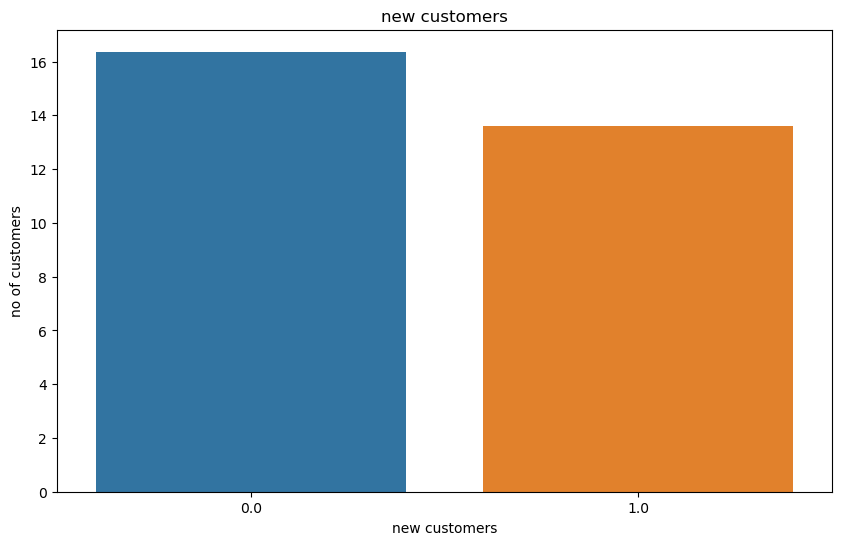

In [24]:
new_customer_index = df['ind_nuevo'].value_counts()
len_unique = len(new_customer_index.unique())
print("unique values in new_customer_index : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(x=new_customer_index.index, y=np.log1p(new_customer_index.values))

plt.title('new customers')
plt.xlabel('new customers')
plt.ylabel('no of customers')

Number of unique values in Customer_Since :  258
Most number of people have been a customer for the past 12.0 months


Text(0, 0.5, 'Months')

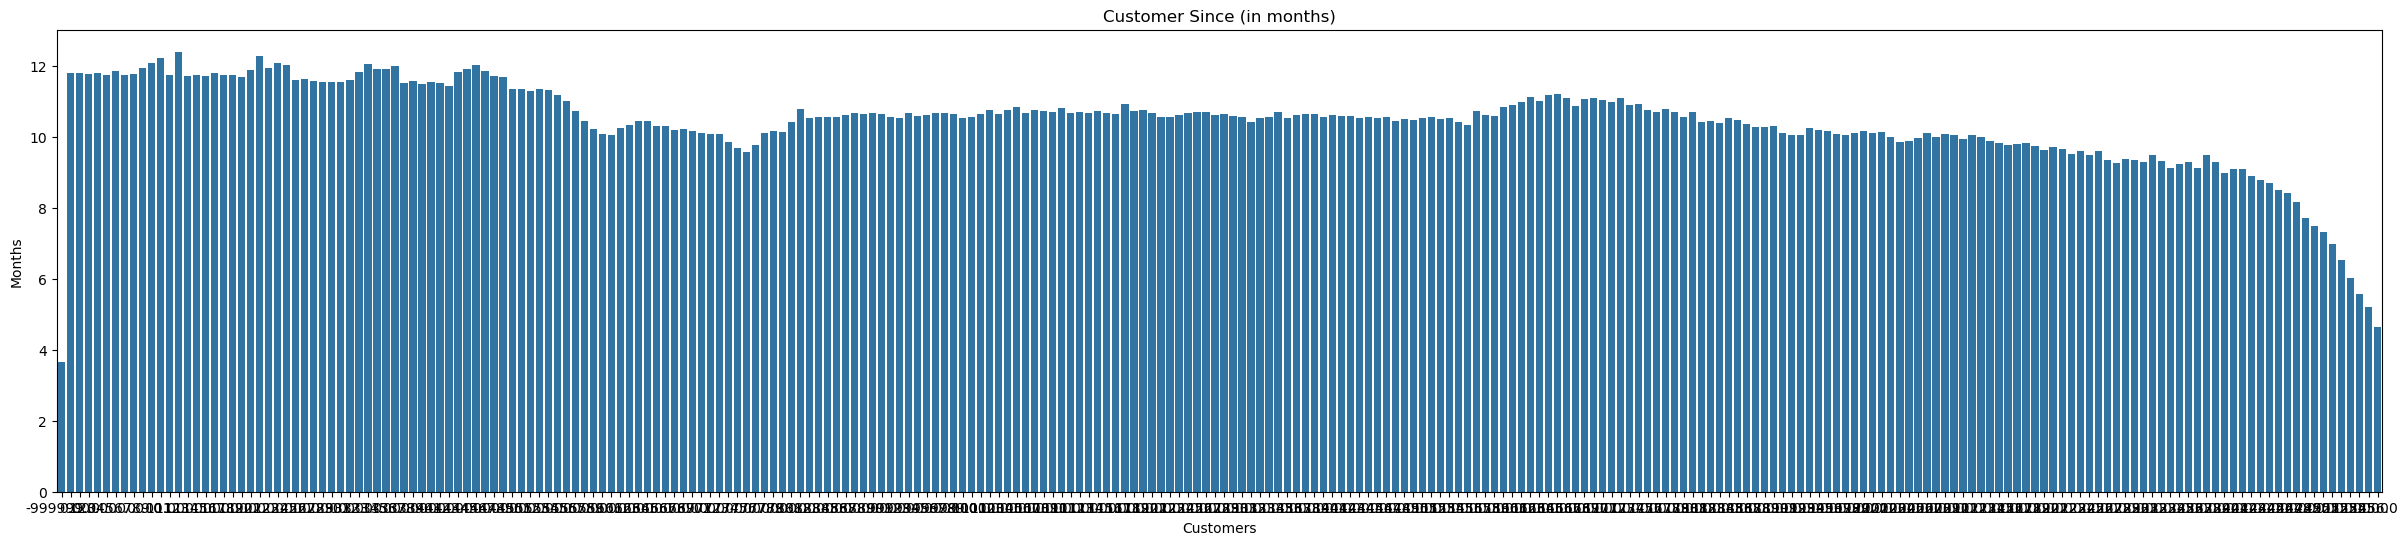

In [25]:
customer_since = df['antiguedad'].value_counts()
len_unique = len(customer_since.unique())
print("Number of unique values in Customer_Since : ",len_unique)

print("Most number of people have been a customer for the past {} months".format(customer_since.index[0]))
plt.figure(figsize=(30,6))
sns.barplot(x=customer_since.index, y=np.log1p(customer_since.values),color=color[0])

plt.title('Customer Since (in months)')
plt.xlabel('Customers')
plt.ylabel('Months')


unique values in Relationship Status :  2


Text(0, 0.5, 'Customers')

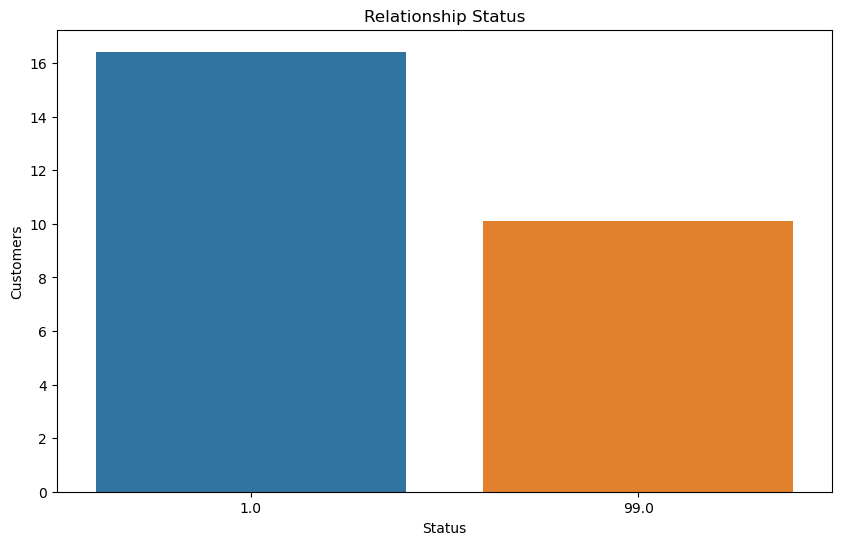

In [26]:
relationship_status = df.indrel.value_counts()
len_unique = len(relationship_status.unique())
print("unique values in Relationship Status : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(x=relationship_status.index, y=np.log1p(relationship_status.values))

plt.title('Relationship Status')
plt.xlabel('Status')
plt.ylabel('Customers')

unique values in Residing Country index :  2


Text(0, 0.5, 'Customers')

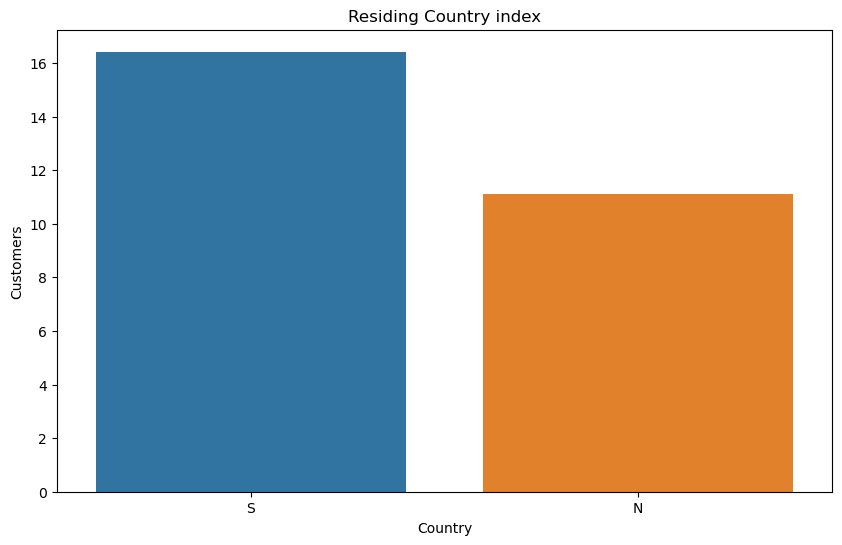

In [27]:
residence_index = df.indresi.value_counts()
len_unique = len(residence_index.unique())
print("unique values in Residing Country index : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(x=residence_index.index, y=np.log1p(residence_index.values))

plt.title('Residing Country index')
plt.xlabel('Country')
plt.ylabel('Customers')

Observation: Most of them are residing in the same country as they bank.

unique values in foreigner_index :  2


Text(0, 0.5, 'Customers')

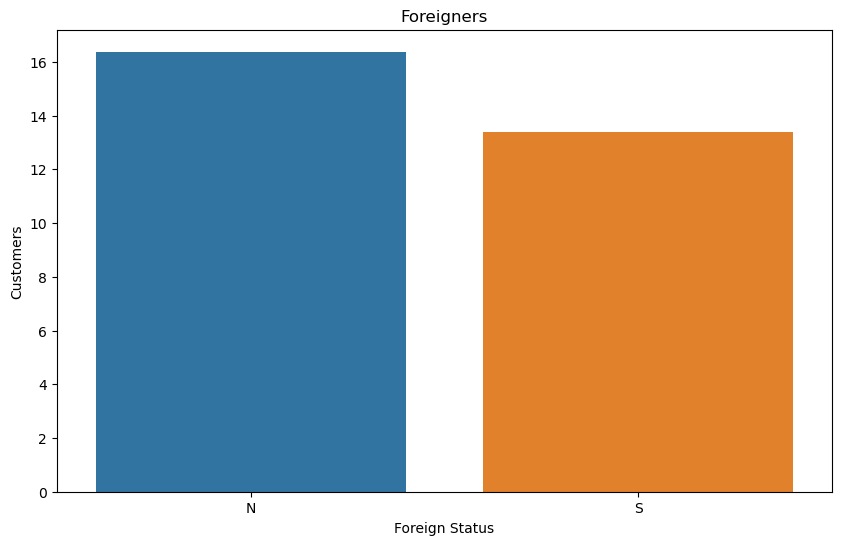

In [28]:
foreigner_index = df.indext.value_counts()
len_unique = len(foreigner_index.unique())
print("unique values in foreigner_index : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(x=foreigner_index.index, y=np.log1p(foreigner_index.values))

plt.title('Foreigners')
plt.xlabel('Foreign Status')
plt.ylabel('Customers')

unique values in spouse_employee_index :  2


Text(0, 0.5, 'customer')

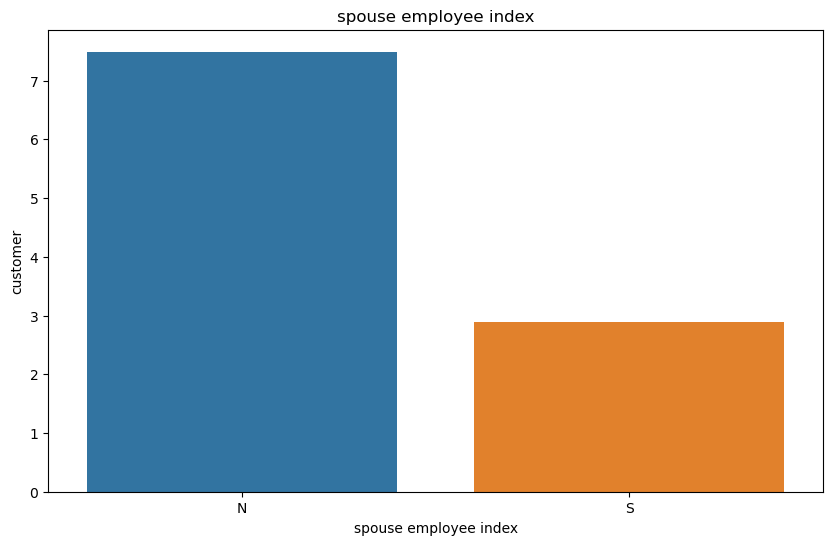

In [29]:
spouse_employee_index = df.conyuemp.value_counts()
len_unique = len(spouse_employee_index.unique())
print("unique values in spouse_employee_index : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(x=spouse_employee_index.index, y=np.log1p(spouse_employee_index.values))
plt.title('spouse employee index')
plt.xlabel('spouse employee index')
plt.ylabel('customer')

In [30]:
df["canal_entrada"].value_counts()

KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
KHK     241084
KHM     183924
KHD     116891
KHN     116608
KAS      86221
RED      75607
KAG      74295
KAY      67350
KAA      66656
KAB      62381
KAE      50764
KCC      49308
KBZ      46446
KHL      45128
KFD      44461
KAI      37699
KEY      35146
KAW      34275
KAR      32686
KAZ      32186
KAF      30559
007      29063
013      27139
KCI      26546
KAH      24875
KAJ      24280
KCH      24098
KHF      20674
KAQ      18017
KHC      16418
KAP      14928
KAM      11285
KAD      10680
KFP       9487
KGX       9474
KEJ       9247
KHO       8992
KGV       8950
KDR       8050
KFT       8036
KAC       7697
KAL       7573
KBO       7380
KBH       7197
KFG       6800
KFS       6694
KAO       6676
KFJ       6620
KES       5904
KEW       5687
KFF       5529
KCG       5399
KCB       5187
KEN       4917
KFU       4914
KFN       4520
KCL       4187
KBQ       4179
KGY       4138
KFK       3913
KFL       3806
KBF       

unique values in Channels used to join :  155
Number of data points in Channel KHE : 4055270 ( 29.715 %)
Number of data points in Channel KAT : 3268209 ( 23.948 %)
Number of data points in Channel KFC : 3098360 ( 22.703 %)
Number of data points in Channel KHQ : 591039 ( 4.331 %)
Number of data points in Channel KFA : 409669 ( 3.002 %)
Number of data points in Channel KHK : 241084 ( 1.767 %)
Number of data points in Channel KHM : 183924 ( 1.348 %)
Number of data points in Channel KHD : 116891 ( 0.857 %)
Number of data points in Channel KHN : 116608 ( 0.854 %)
Number of data points in Channel KAS : 86221 ( 0.632 %)
Number of data points in Channel RED : 75607 ( 0.554 %)
Number of data points in Channel KAG : 74295 ( 0.544 %)
Number of data points in Channel KAY : 67350 ( 0.494 %)
Number of data points in Channel KAA : 66656 ( 0.488 %)
Number of data points in Channel KAB : 62381 ( 0.457 %)
Number of data points in Channel KAE : 50764 ( 0.372 %)
Number of data points in Channel KCC : 4930

Text(0, 0.5, 'customers')

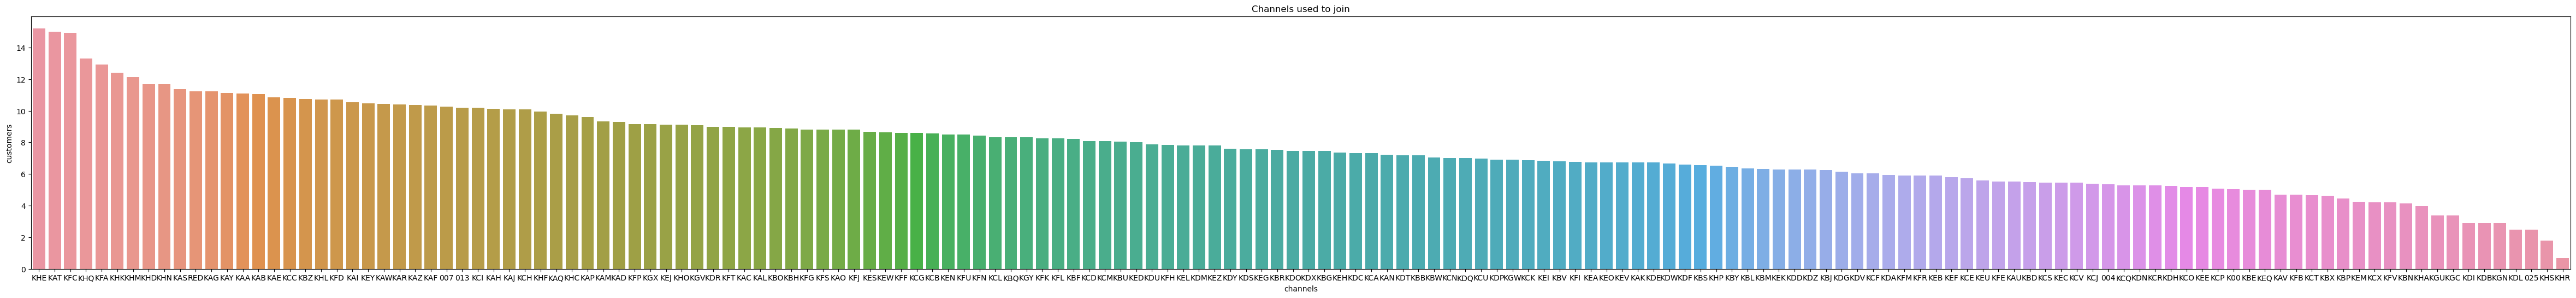

In [31]:
join_channel = df.canal_entrada.value_counts()
len_unique = len(join_channel.unique())
print("unique values in Channels used to join : ",len_unique)

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order

sorted_distb = np.argsort(-join_channel.values)

for i in sorted_distb:
    print('Number of data points in Channel', str(join_channel.index[i]), ':', join_channel.values[i], '(', np.round((join_channel.values[i]/df.shape[0]*100), 3), '%)')

plt.figure(figsize=(60,6))
sns.barplot(x=join_channel.index, y=np.log1p(join_channel.values))
plt.title('Channels used to join')
plt.xlabel('channels')
plt.ylabel('customers')

Number of unique values in Deceased index :  2
Number of customers deceased  :  [13584813    34762]


Text(0, 0.5, 'customers')

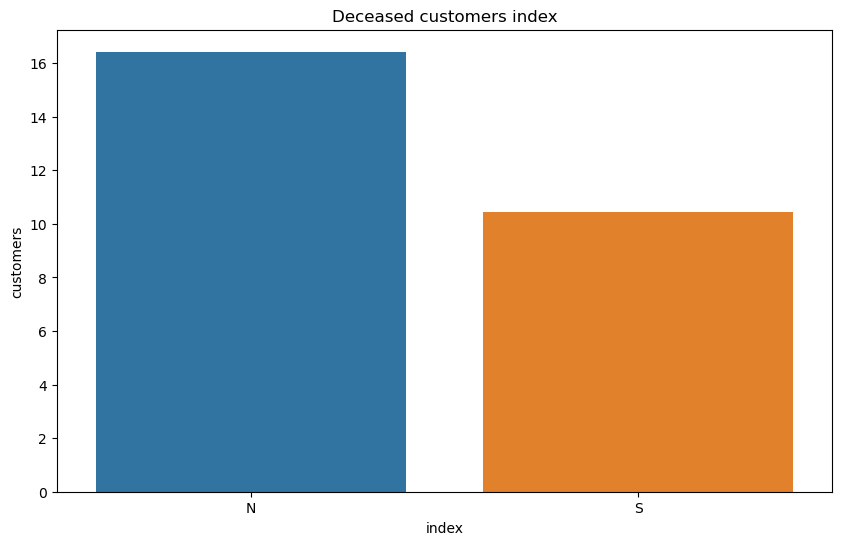

In [32]:
deceased_index = df.indfall.value_counts()
len_unique = len(deceased_index.unique())

print("Number of unique values in Deceased index : ",len_unique)
print("Number of customers deceased  : ",deceased_index.values)


plt.figure(figsize=(10,6))
sns.barplot(x=deceased_index.index, y=np.log1p(deceased_index.values))
plt.title('Deceased customers index')
plt.xlabel('index')
plt.ylabel('customers')

unique values in Customer primary address :  1


Text(0, 0.5, 'customers')

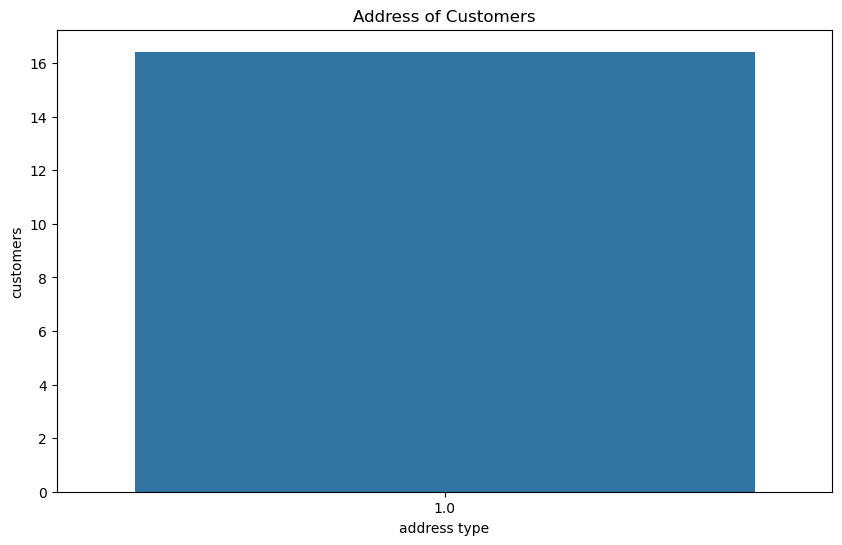

In [33]:
address_type = df.tipodom.value_counts()
len_unique = len(address_type.unique())
print("unique values in Customer primary address : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(x=address_type.index, y=np.log1p(address_type.values))

plt.title('Address of Customers')
plt.xlabel('address type')
plt.ylabel('customers')

unique values in customers Address :  52


Text(0, 0.5, 'customers')

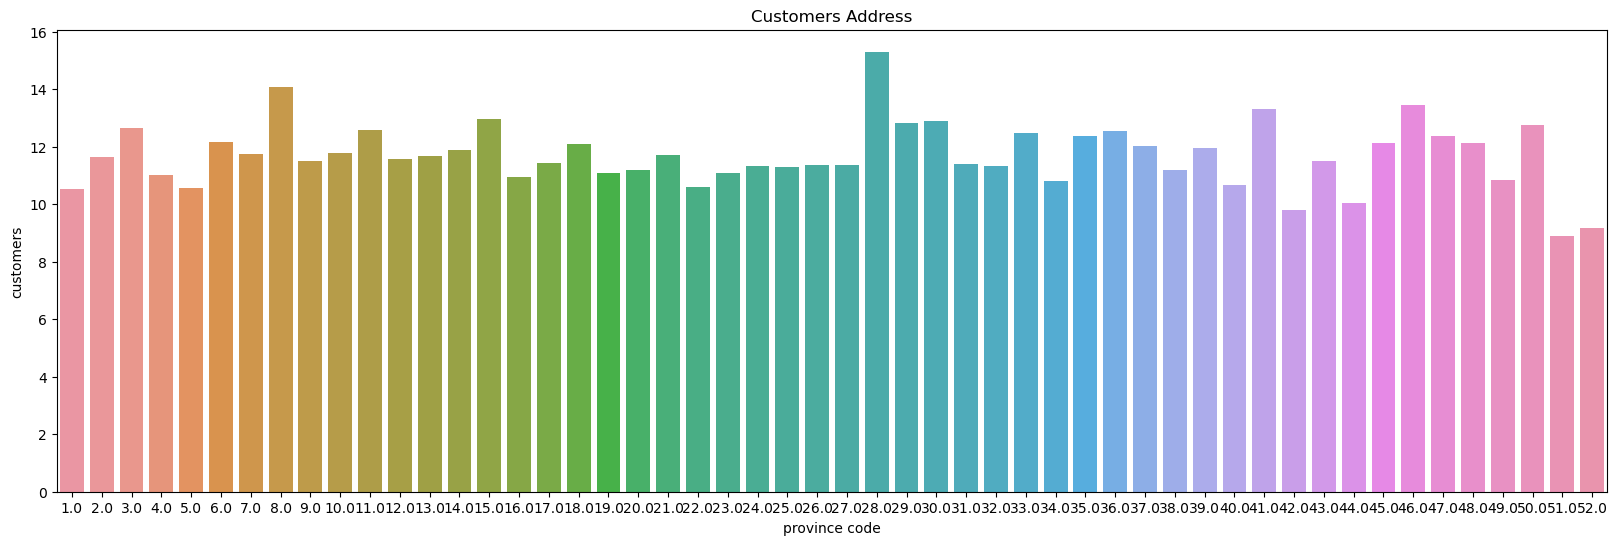

In [34]:
province_cd = df.cod_prov.value_counts()
len_unique = len(province_cd.unique())
print("unique values in customers Address : ",len_unique)

plt.figure(figsize=(20,6))
sns.barplot(x=province_cd.index, y=np.log1p(province_cd.values))

plt.title('Customers Address')
plt.xlabel('province code')
plt.ylabel('customers')

unique values in Province Name :  52


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'MADRID'),
  Text(1, 0, 'BARCELONA'),
  Text(2, 0, 'VALENCIA'),
  Text(3, 0, 'SEVILLA'),
  Text(4, 0, 'CORUÑA, A'),
  Text(5, 0, 'MURCIA'),
  Text(6, 0, 'MALAGA'),
  Text(7, 0, 'ZARAGOZA'),
  Text(8, 0, 'ALICANTE'),
  Text(9, 0, 'CADIZ'),
  Text(10, 0, 'PONTEVEDRA'),
  Text(11, 0, 'ASTURIAS'),
  Text(12, 0, 'VALLADOLID'),
  Text(13, 0, 'PALMAS, LAS'),
  Text(14, 0, 'BADAJOZ'),
  Text(15, 0, 'BIZKAIA'),
  Text(16, 0, 'TOLEDO'),
  Text(17, 0, 'GRANADA'),
  Text(18, 0, 'SALAMANCA'),
  Text(19, 0, 'CANTABRIA'),
  Text(20, 0, 'CORDOBA'),
  Text(21, 0, 'CACERES'),
  Text(22, 0, 'BALEARS, ILLES'),
  Text(23, 0, 'HUELVA'),
  Text(24, 0, 'CIUDAD REAL'),
  Text(25, 0, 'ALBACETE'),
  Text(26, 0, 'CASTELLON'),
  Text(27, 0, 'TARRAGONA'),
  Text(28

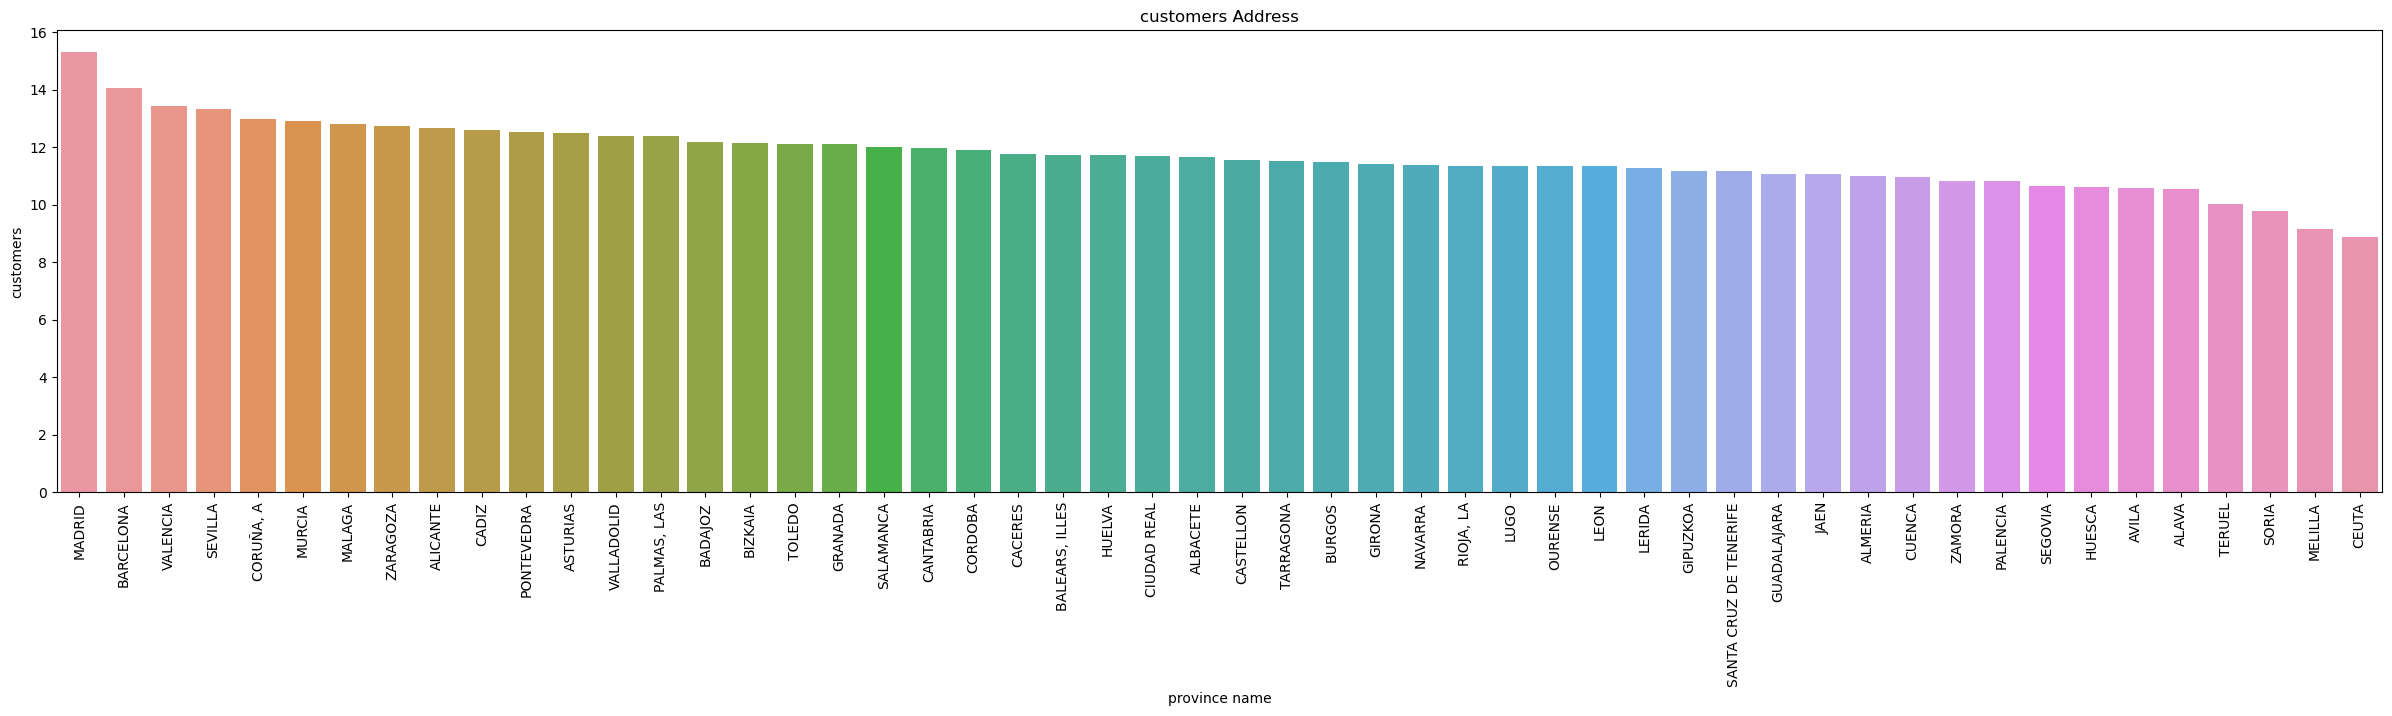

In [35]:
province_name = df.nomprov.value_counts()
len_unique = len(province_name.unique())

print("unique values in Province Name : ",len_unique)

plt.figure(figsize=(30,6))
sns.barplot(x=province_name.index, y=np.log1p(province_name.values))
plt.title('customers Address')
plt.xlabel('province name')
plt.ylabel('customers')
plt.xticks(rotation='vertical')

unique values in customers activity index :  2


Text(0, 0.5, 'customers')

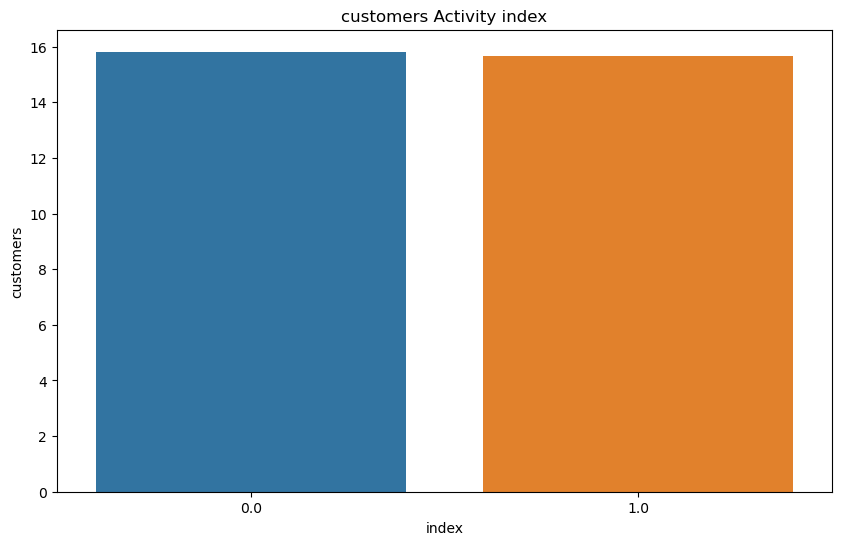

In [36]:
customer_activity_index  = df.ind_actividad_cliente.value_counts()
len_unique = len(customer_activity_index.unique())
print("unique values in customers activity index : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(x=customer_activity_index.index, y=np.log1p(customer_activity_index.values))
plt.title('customers Activity index')
plt.xlabel('index')
plt.ylabel('customers')

Average household income: 127829.31492811818

The maximum household income: 28894395.51
The minimum household income: 1202.73
The median household income: 96853.275


Text(0, 0.5, 'Income')

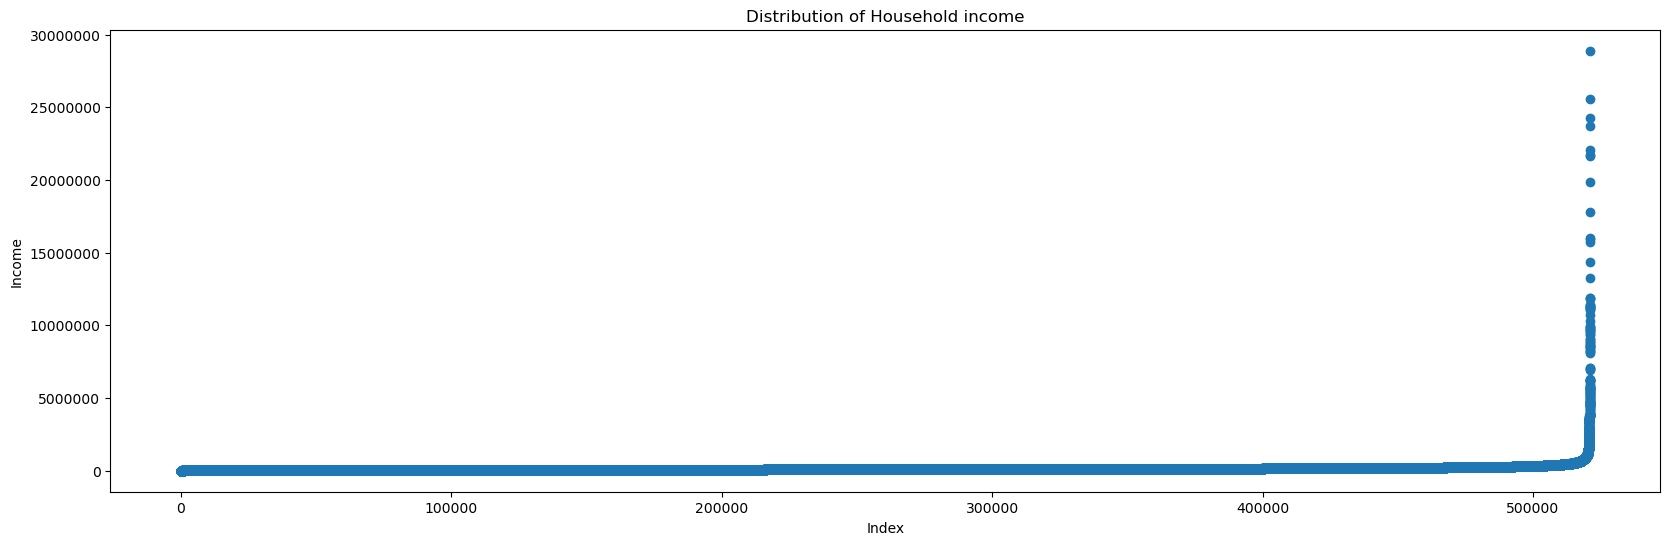

In [37]:
household_income = np.sort(df.renta.unique())

print ('Average household income: {}'.format(np.nanmean(household_income)))
print("")
print ('The maximum household income: {}'.format(np.nanmax(household_income)))
print ('The minimum household income: {}'.format(np.nanmin(household_income)))
print ('The median household income: {}'.format(np.nanmedian(household_income)))

plt.figure(figsize=(20,6))
plt.scatter(range(len(household_income)), household_income)
plt.title('Distribution of Household income')
plt.ticklabel_format(style = 'plain')
plt.xlabel('Index')
plt.ylabel('Income')

Observation: 
look at the percentile distribution there are only very few households with large incomes.

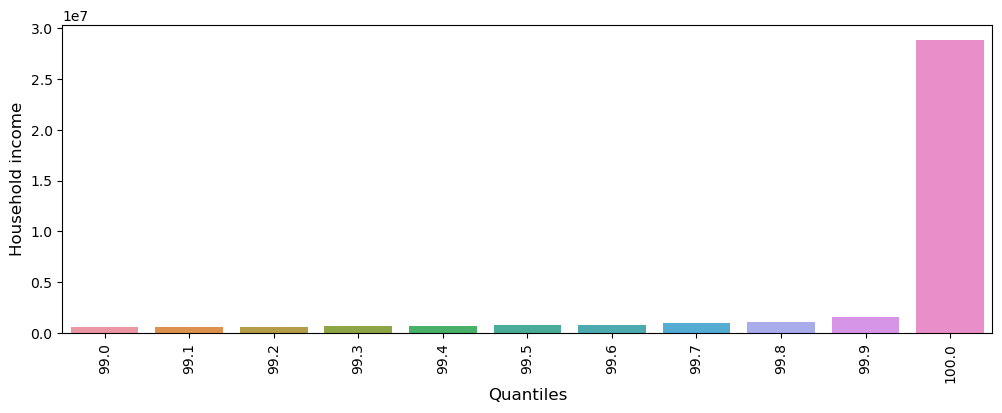

In [38]:
quantile_series = df.renta.quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot(x=(quantile_series.index*100), y=quantile_series.values)

plt.ylabel('Household income', fontsize=12)
plt.xlabel('Quantiles', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Observation: The sudden increase in the 100th percentile could be an outlier, so the upperbound is cap to be at 99th percentile.

unique values in Customer segmentation :  3


Text(0, 0.5, 'customers')

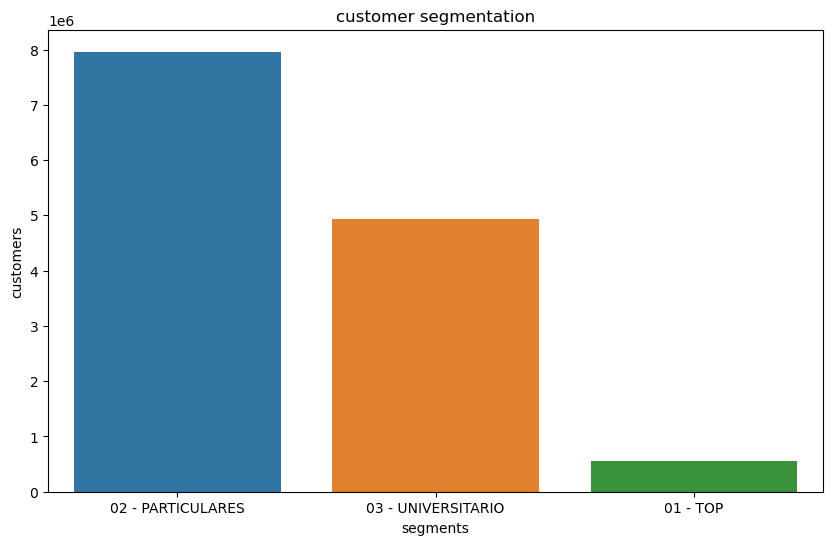

In [39]:
customer_segment = df.segmento.value_counts()
len_unique = len(customer_segment.unique())
print("unique values in Customer segmentation : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(x=customer_segment.index, y=customer_segment.values)

plt.title('customer segmentation')
plt.xlabel('segments')
plt.ylabel('customers')

Observation: form this we can see that individuals are higher in population while the VIPS are the few among the population.

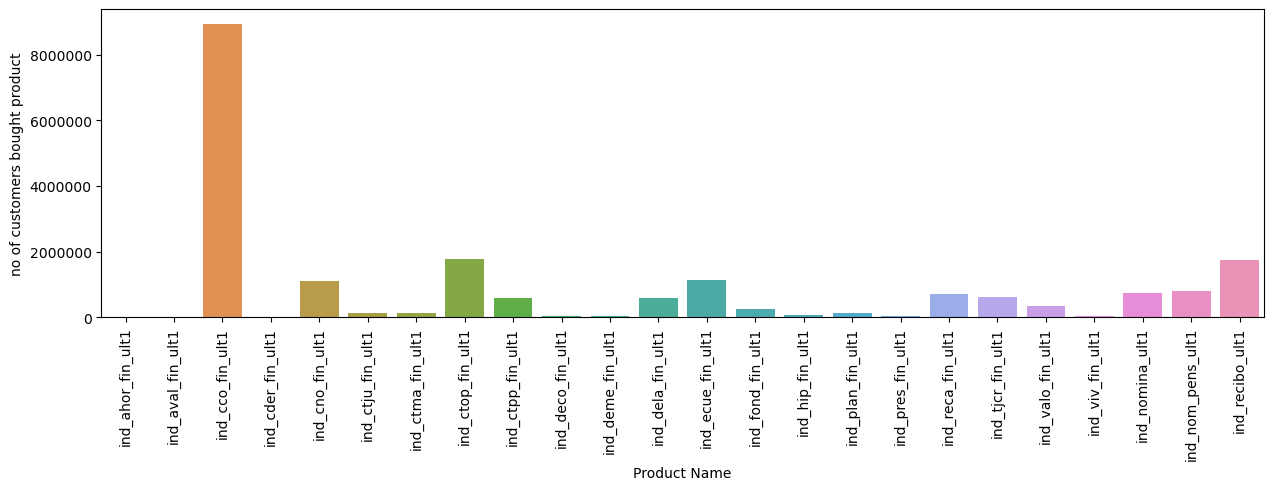

In [40]:
target_variables = list(df.columns[24:])
target_counts = df[target_variables].astype('float64').sum(axis=0)
plt.figure(figsize=(15,4))
sns.barplot(x=target_counts.index, y=target_counts.values)

plt.xlabel('Product Name')
plt.ylabel('no of customers bought product')
plt.ticklabel_format(style = 'plain', axis='y')
plt.xticks(rotation='vertical')
plt.show()

Observation: The most bought product is the current account followed by Particular Account. The least bought is the Guarantees.

In [41]:
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T
df_a.head()

sexo                           H                     V           
ind_actividad_cliente        0.0        1.0        0.0        1.0
ind_ahor_fin_ult1          130.0      212.0      244.0      810.0
ind_aval_fin_ult1            0.0       81.0        0.0      235.0
ind_cco_fin_ult1       2206458.0  1977400.0  2091349.0  2662928.0
ind_cder_fin_ult1          119.0      624.0      382.0     4247.0
ind_cno_fin_ult1          6359.0   445073.0     7745.0   643839.0

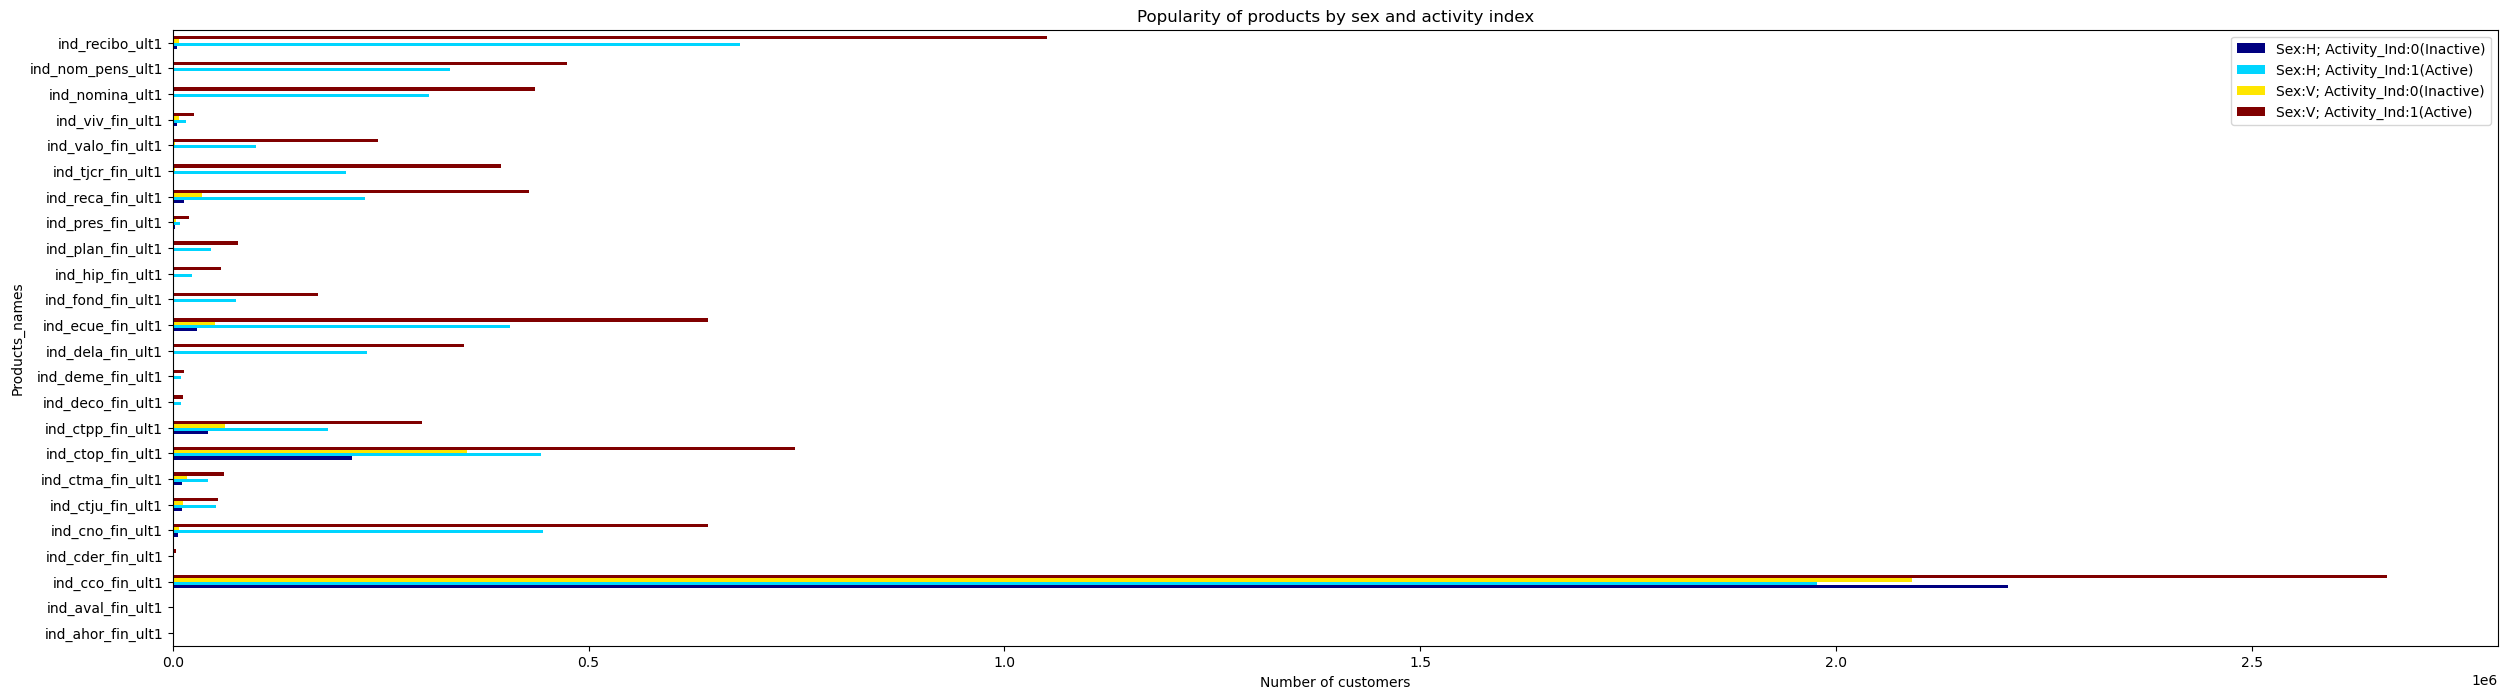

In [42]:
df_a.plot(kind='barh', figsize=[30,8], colormap='jet')
plt.title('Popularity of products by sex and activity index') 
plt.xlabel('Number of customers') 
plt.ylabel('Products_names') 
plt.legend(["Sex:H; Activity_Ind:0(Inactive)", "Sex:H; Activity_Ind:1(Active)", "Sex:V; Activity_Ind:0(Inactive)", 
            "Sex:V; Activity_Ind:1(Active)"]) 

Observation: As noted earlier the most popular product is Cur_Acct.
Lets exclude the dominant product and analyze others.

In [43]:
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

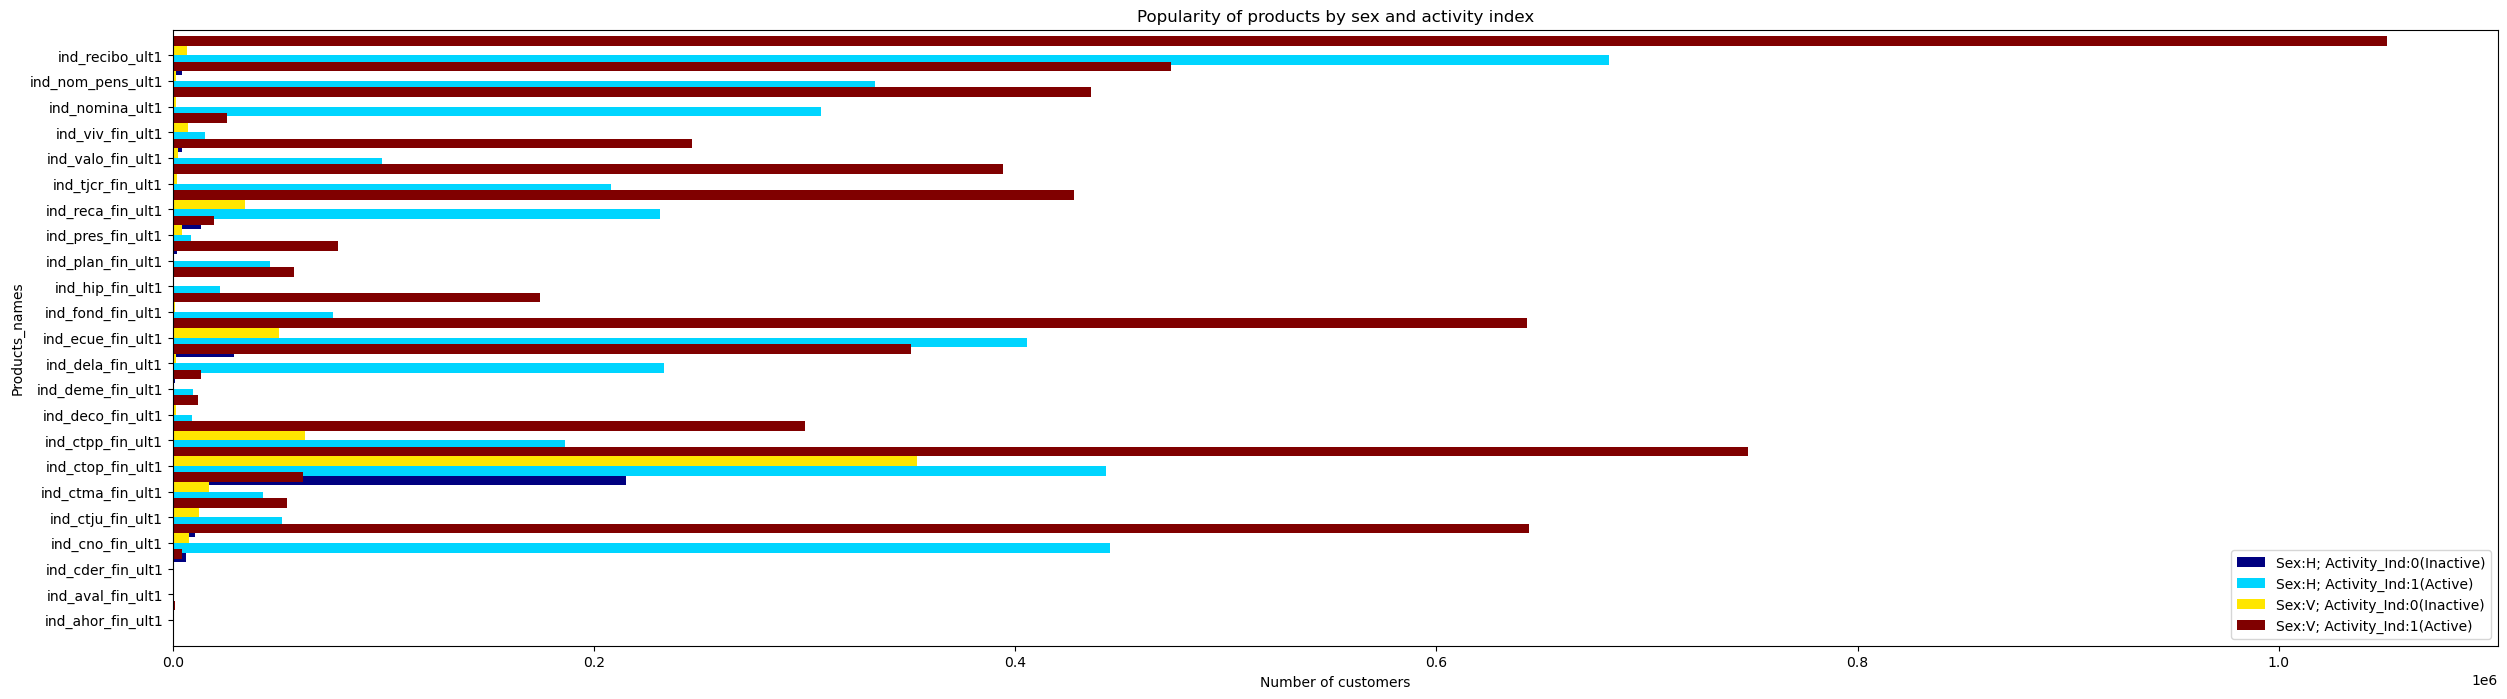

In [44]:
df_a.plot(kind='barh', figsize=[30,8], colormap='jet', width=1.5)
plt.title('Popularity of products by sex and activity index') 
plt.xlabel('Number of customers') 
plt.ylabel('Products_names') 
plt.legend(["Sex:H; Activity_Ind:0(Inactive)", "Sex:H; Activity_Ind:1(Active)", "Sex:V; Activity_Ind:0(Inactive)", 
            "Sex:V; Activity_Ind:1(Active)"]) 

In [45]:
tmp = df.head()

In [46]:
df_a

sexo                          H                   V           
ind_actividad_cliente       0.0       1.0       0.0        1.0
ind_ahor_fin_ult1         130.0     212.0     244.0      810.0
ind_aval_fin_ult1           0.0      81.0       0.0      235.0
ind_cder_fin_ult1         119.0     624.0     382.0     4247.0
ind_cno_fin_ult1         6359.0  445073.0    7745.0   643839.0
ind_ctju_fin_ult1       10670.0   51919.0   12321.0    54139.0
ind_ctma_fin_ult1       10514.0   42668.0   17163.0    61909.0
ind_ctop_fin_ult1      215358.0  442968.0  353109.0   747948.0
ind_ctpp_fin_ult1       41746.0  186364.0   62601.0   299944.0
ind_deco_fin_ult1        1008.0    9246.0    1437.0    12142.0
ind_deme_fin_ult1          14.0    9387.0      60.0    13202.0
ind_dela_fin_ult1        1026.0  233280.0    1615.0   350295.0
ind_ecue_fin_ult1       29027.0  405373.0   50491.0   643127.0
ind_fond_fin_ult1         629.0   76071.0    1091.0   174365.0
ind_hip_fin_ult1           59.0   22560.0     137.0    57333.0
ind_plan_fin_ult1         212.0   46177.0     498.0    78211.0
ind_pres_fin_ult1        2062.0    8692.0    4217.0    19552.0
ind_reca_fin_ult1       13199.0  231473.0   34392.0   427741.0
ind_tjcr_fin_ult1        1253.0  208029.0    2148.0   394136.0
ind_valo_fin_ult1         988.0   99342.0    2494.0   246500.0
ind_viv_fin_ult1         4319.0   15264.0    7399.0    25502.0
ind_nomina_ult1           942.0  307650.0    1237.0   435927.0
ind_nom_pens_ult1        1065.0  333556.0    1452.0   473787.0
ind_recibo_ult1          4361.0  682123.0    6826.0  1051480.0

In [47]:
df_a.T[['ind_ahor_fin_ult1', 'ind_aval_fin_ult1']]

ind_ahor_fin_ult1  ind_aval_fin_ult1
sexo ind_actividad_cliente                                      
H    0.0                                130.0                0.0
     1.0                                212.0               81.0
V    0.0                                244.0                0.0
     1.0                                810.0              235.0

In [48]:
df[df.ind_ahor_fin_ult1 == 1]['fecha_dato'].value_counts()

2015-03-28    89
2015-02-28    89
2015-01-28    88
2015-04-28    87
2015-05-28    85
2015-06-28    83
2015-07-28    82
2015-08-28    82
2015-11-28    81
2015-09-28    81
2015-10-28    81
2015-12-28    79
2016-01-28    78
2016-02-28    78
2016-03-28    78
2016-05-28    78
2016-04-28    77
Name: fecha_dato, dtype: int64

In [49]:
df[df.ind_aval_fin_ult1 == 1]['fecha_dato'].value_counts()

2015-03-28    21
2015-04-28    21
2015-05-28    21
2015-06-28    21
2015-02-28    20
2015-01-28    19
2015-08-28    19
2015-09-28    19
2015-07-28    19
2015-10-28    18
2015-11-28    18
2015-12-28    18
2016-01-28    18
2016-02-28    16
2016-03-28    16
2016-04-28    16
2016-05-28    16
Name: fecha_dato, dtype: int64

In [50]:
#Popularity of products by different Age group

#change datatype

df["age"]   = pd.to_numeric(df["age"], errors="coerce") 

df_a = df.groupby(pd.cut(df['age'], [0,20,40,60,80,100, pd.np.inf], right=False)).sum()

df_a.head()


ncodpers          age  ind_nuevo   antiguedad     indrel    tipodom     cod_prov  ind_actividad_cliente         renta  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
age                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
[0.0, 20.0)     123076888696    2054071.0    15635.0   12723030.0   184212.0   151382.0    4166185.0               112405.0  1.944307e+10                  0                  0              9597                  0                 9             127675                  3                  6                  0                  0                  0                284                 10                  0                34                  0                  0                217                  0                  0                 0             82.0              441.0               12
[20.0, 40.0)   7608632101710  183750289.0   633530.0  253045624.0  8191835.0  6853057.0  177404730.0              2489282.0  6.266751e+11                 28                 77           5168565                555            381418               1374              44702             181427             100603               6431               2697              63023             276568              21754              4455               6257               6771             162396             108376              39622             10676         249239.0           253619.0           605791
[40.0, 60.0)   2705869081743  228177059.0   126889.0  554955914.0  5512252.0  4762061.0  127821075.0              2757436.0  5.610754e+11               1260                222           2729736               3617            611177                  0              66222            1054773             385340              13045              15029             342056             640972             155411             69290              95371              22668             455289             415982             230461             39471         457560.0           468376.0           964000
[60.0, 80.0)    752844911066   98452397.0    30228.0  167666665.0  1679882.0  1452620.0   39580777.0               709857.0  1.950329e+11                108                 17            822953               1030             97206                  0              17792             379789              87112               3587               3596             142491             177007              60242              6283              22993               4808              77455              76687              66533              1919          38189.0            76663.0           154048
[80.0, 100.0)   177527872045   33175096.0     4890.0   52235783.0   461269.0   384535.0   10725818.0               162722.0  5.222399e+10                  0                  0            200863                170             13117                  0               3523             136984              17243                770               1341              38077              33238              14502                61                477                259              11149               4477         

Observation: As expected most of the products are bought by Active customers and Savings_Acct and Guarantees are owned by very less people, may be we can remove these 2 products.

In [51]:
# Let's drop the columns which are unnecessary for this step
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T
df_a.head()

age                [0.0, 20.0)  [20.0, 40.0)  [40.0, 60.0)  [60.0, 80.0)  [80.0, 100.0)  [100.0, inf)
ind_ahor_fin_ult1          0.0          28.0        1260.0         108.0            0.0           0.0
ind_aval_fin_ult1          0.0          77.0         222.0          17.0            0.0           0.0
ind_cco_fin_ult1        9597.0     5168565.0     2729736.0      822953.0       200863.0        6436.0
ind_cder_fin_ult1          0.0         555.0        3617.0        1030.0          170.0           0.0
ind_cno_fin_ult1           9.0      381418.0      611177.0       97206.0        13117.0          89.0

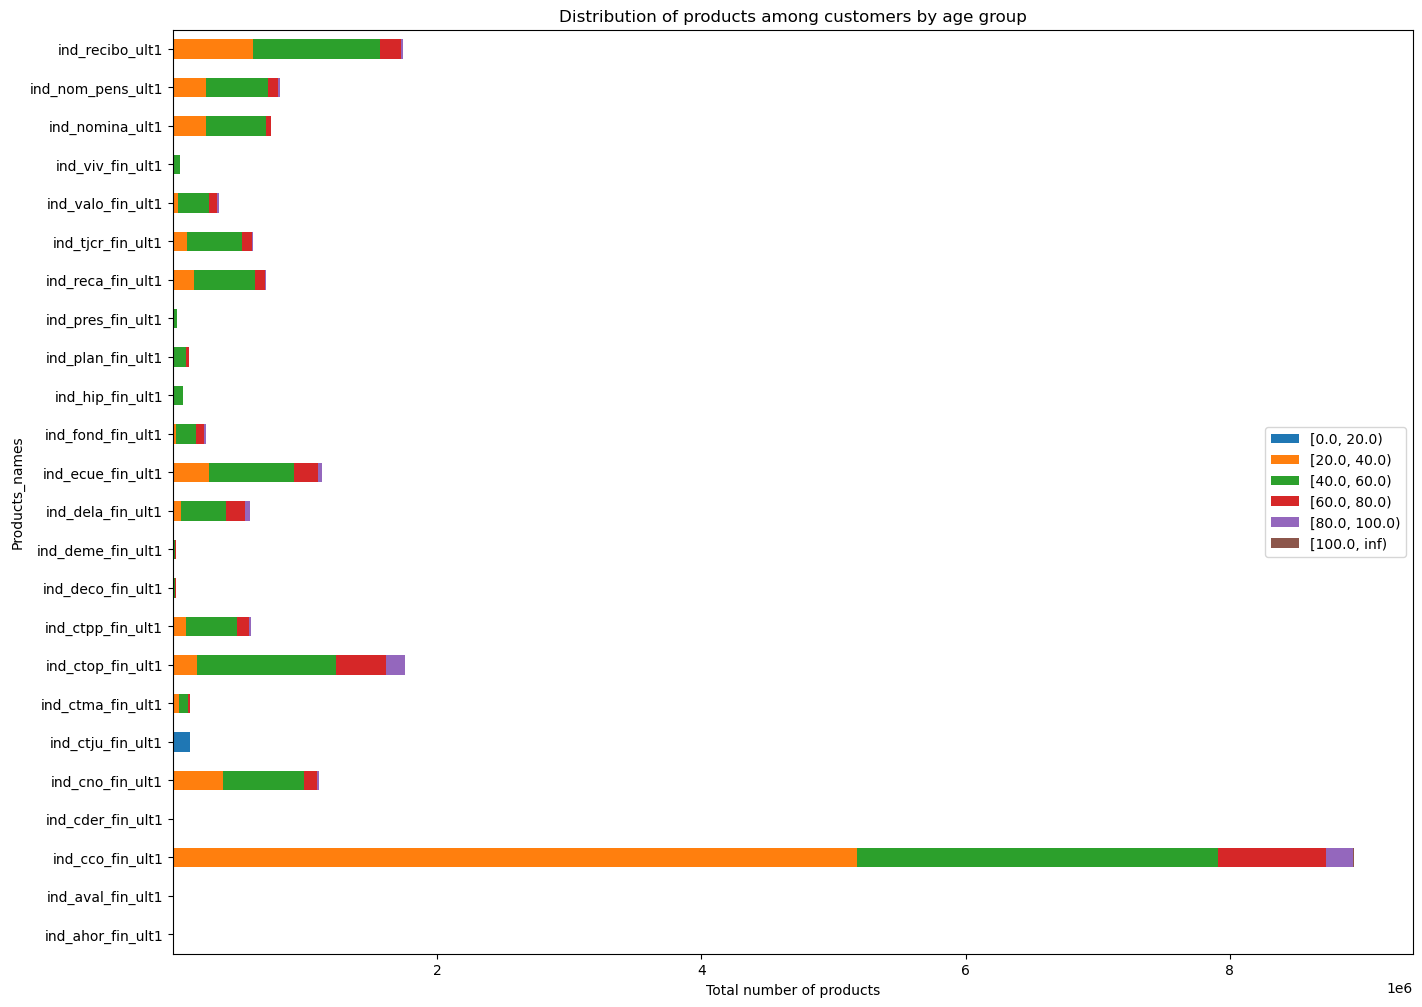

In [52]:
# Plot of product share for each age group
df_a.plot(kind='barh', stacked=True, figsize=[16,12])
plt.title('Distribution of products among customers by age group') 
plt.xlabel('Total number of products') 
plt.ylabel('Products_names') 
plt.legend(loc="center right") 

In [53]:
#Popularity of products by different channels used to join

df["canal_entrada"].value_counts().head(5)

KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
Name: canal_entrada, dtype: int64

In [54]:
#to better visualize we will use the top 5 channels to plot
df_a = df.loc[:, ['canal_entrada']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
interested_channels = ['KHE', 'KAT', 'KFC', 'KHQ', 'KFA']
df_a = df_a[df_a.canal_entrada.isin(interested_channels)]
df_a = df_a.groupby(['canal_entrada']).sum()
df_a = df_a.T
df_a.head()

canal_entrada            KAT       KFA        KFC        KHE       KHQ
ind_ahor_fin_ult1      777.0      51.0      287.0        0.0       0.0
ind_aval_fin_ult1      154.0       5.0      125.0        0.0       0.0
ind_cco_fin_ult1   1854011.0  227554.0  1713483.0  3480725.0  440623.0
ind_cder_fin_ult1     2245.0     166.0     2157.0       17.0       2.0
ind_cno_fin_ult1    447141.0   52585.0   339245.0    76760.0    3111.0

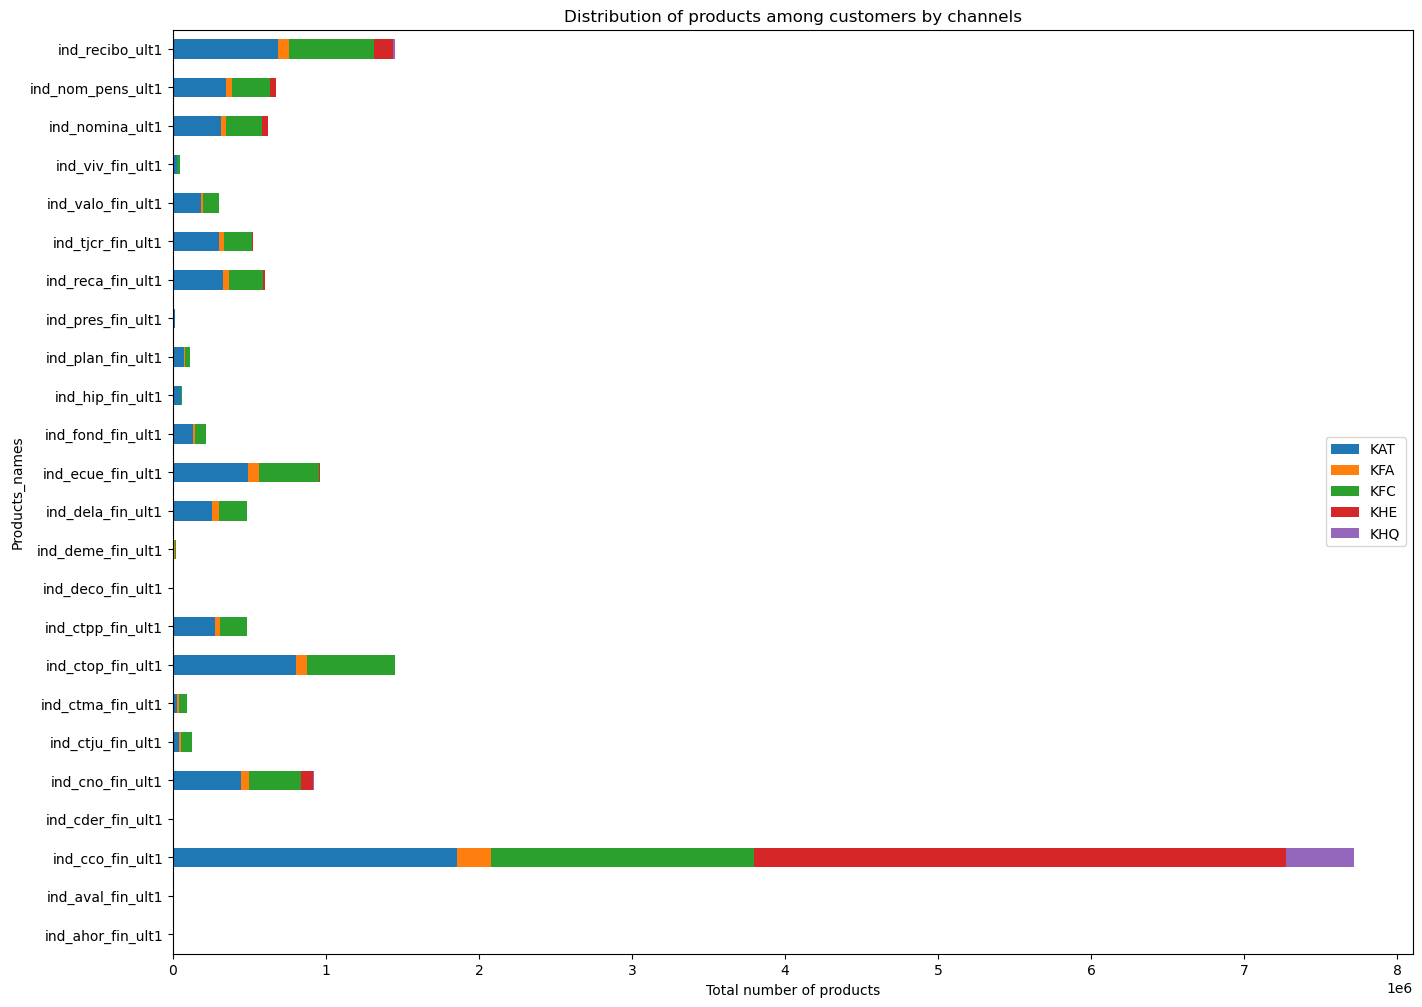

In [55]:
# Plot of product share for each age group
df_a.plot(kind='barh', stacked=True, figsize=[16,12])
plt.title('Distribution of products among customers by channels') 
plt.xlabel('Total number of products') 
plt.ylabel('Products_names') 
plt.legend(loc="center right") 

In [56]:
#Popularity of products by different customer seniority

#change datatype customer since
df["antiguedad"]   = pd.to_numeric(df["antiguedad"], errors="coerce") 

df.antiguedad.min(), df.antiguedad.max()

(-999999.0, 256.0)

In [57]:
df.loc[df["antiguedad"]<0, 'antiguedad'] = 0

df.antiguedad.min(), df.antiguedad.max()

(0.0, 256.0)

In [58]:
df_a = df.groupby(pd.cut(df['antiguedad'], [0,50,100,150,200, 260, pd.np.inf], right=False)).sum()
df_a.head()

ncodpers          age  ind_nuevo   antiguedad     indrel    tipodom     cod_prov  ind_actividad_cliente         renta  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
antiguedad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
[0.0, 50.0)     8079911418650  201773262.0   811207.0  159222027.0  8639292.0  6750243.0  174330763.0              2681885.0  5.930163e+11                  0                  5           5048550                293            364017              37849              40734                176                152              17509                917             117966             374062              22463               482               6427                588             106003              79954              25256                70         226846.0           239998.0           620843
[50.0, 100.0)   1556800749940   85425251.0        0.0  139932079.0  2110479.0  1921731.0   51326100.0               860955.0  2.176168e+11                  0                 65           1138353                581            139996              21429              87365              33367             263897               1070               4001             112854             142467              28136               952               8190               7594             100150              85880              39578              2522          92325.0            99901.0           221175
[100.0, 150.0)  1119118021253  105158361.0        0.0  259088006.0  2252047.0  2096815.0   57776336.0              1048829.0  2.571758e+11                430                 52           1205443               1945            194006              53304               1423             565936             108593               1938               7964             126358             198805              48988             24486              21034              18053             171624             132409              70244             15895         134014.0           145223.0           300720
[150.0, 200.0)   564266695994  114662814.0        0.0  366480380.0  2291542.0  2134742.0   58064570.0              1220481.0  2.790798e+11                694                107           1160804               1793            268763              16467               1732             984695             148050               2622               7592             169549             290642              91496             36083              49797               5547             216287             200959             130578             22121         194203.0           213511.0           400748
[200.0, 260.0)    53326528267   40234787.0        0.0  156427150.0   755929.0   716043.0   18644437.0               423035.0  1.101646e+11                272                 87            385000                760            136234                  0               1003             175209              69963                694               2189              59489             122049              61073             18120              39650               2741             112741             106364   

In [59]:
# Let's drop the columns which are unnecessary
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T
df_a.head()

antiguedad         [0.0, 50.0)  [50.0, 100.0)  [100.0, 150.0)  [150.0, 200.0)  [200.0, 260.0)  [260.0, inf)
ind_ahor_fin_ult1          0.0            0.0           430.0           694.0           272.0           0.0
ind_aval_fin_ult1          5.0           65.0            52.0           107.0            87.0           0.0
ind_cco_fin_ult1     5048550.0      1138353.0       1205443.0       1160804.0        385000.0           0.0
ind_cder_fin_ult1        293.0          581.0          1945.0          1793.0           760.0           0.0
ind_cno_fin_ult1      364017.0       139996.0        194006.0        268763.0        136234.0           0.0

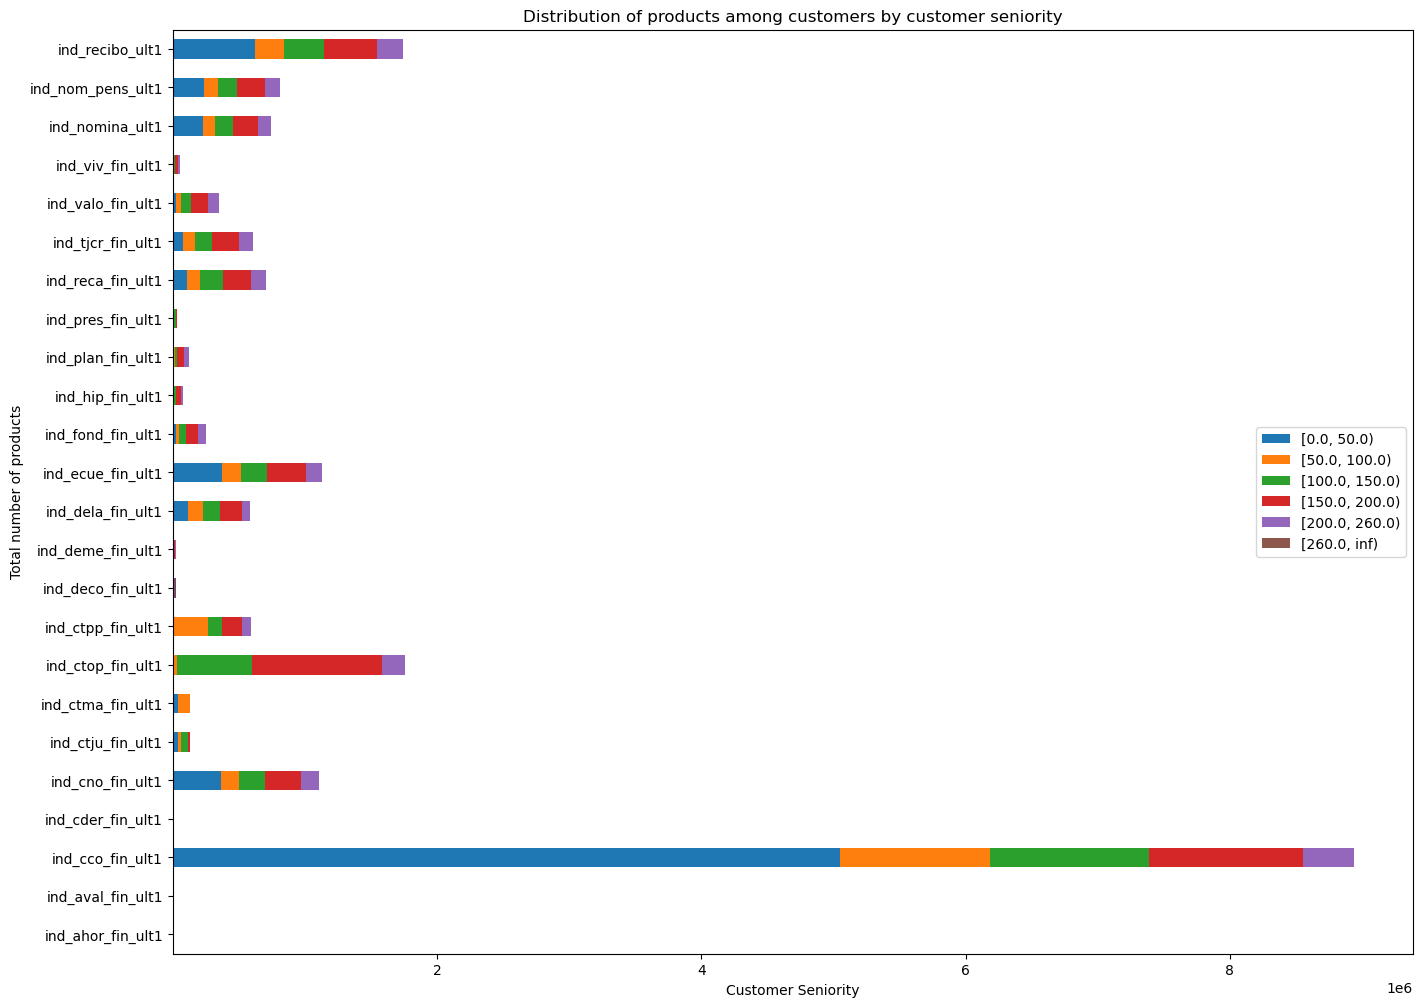

In [60]:
# Plot of product share based on customer seniority
df_a.plot(kind='barh', stacked=True, figsize=[16,12])
plt.title('Distribution of products among customers by customer seniority') 
plt.xlabel('Customer Seniority') 
plt.ylabel('Total number of products') 
# plt.ticklabel_format(style = 'plain')
plt.legend(loc="center right") 

In [61]:
#Ownership of products by customer seniority

# total number of products per customer per month
df["total_products"] = df.loc[:,"ind_ahor_fin_ult1": "ind_recibo_ult1"].sum(axis=1)
df["total_products"] = pd.to_numeric(df["total_products"], errors="coerce") 

df["antiguedad"]   = pd.to_numeric(df["antiguedad"], errors="coerce") 
df_a = df.loc[:, ['antiguedad']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
df_a = (df_a.groupby(pd.cut(df_a['antiguedad'], [0,50,100,150,200, pd.np.inf], right=False)).sum())
df_a.head()

antiguedad  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
antiguedad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
[0.0, 50.0)     159222027.0                  0                  5           5048550                293            364017              37849              40734                176                152              17509                917             117966             374062              22463               482               6427                588             106003              79954              25256                70         226846.0           239998.0           620843
[50.0, 100.0)   139932079.0                  0                 65           1138353                581            139996              21429              87365              33367             263897               1070               4001             112854             142467              28136               952               8190               7594             100150              85880              39578              2522          92325.0            99901.0           221175
[100.0, 150.0)  259088006.0                430                 52           1205443               1945            194006              53304               1423             565936             108593               1938               7964             126358             198805              48988             24486              21034              18053             171624             132409              70244             15895         134014.0           145223.0           300720
[150.0, 200.0)  366480380.0                694                107           1160804               1793            268763              16467               1732             984695             148050               2622               7592             169549             290642              91496             36083              49797               5547             216287             200959             130578             22121         194203.0           213511.0           400748
[200.0, inf)    156427150.0                272                 87            385000                760            136234                  0               1003             175209              69963                694               2189              59489             122049              61073             18120              39650               2741             112741             106364              83668             11876          98368.0           111227.0           201317

In [62]:
exclude = ["antiguedad"]
df_a = df_a.drop(exclude, axis=1).T

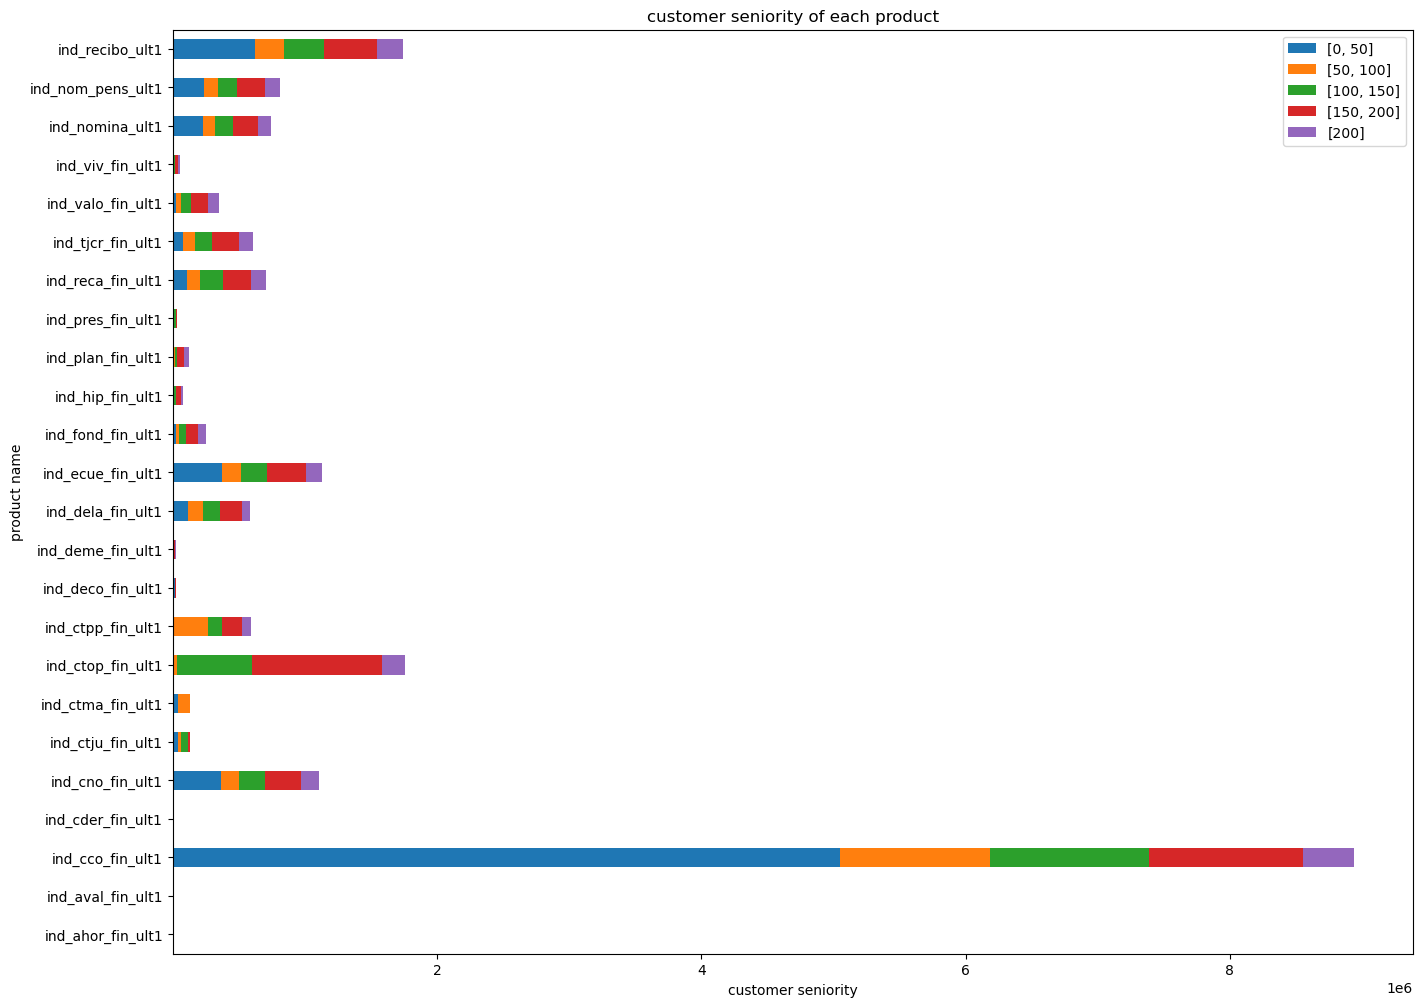

In [63]:
# Customers' seniority distribution of each product
df_a.plot(kind='barh', stacked=True, figsize=[16,12])
plt.title('customer seniority of each product') 
plt.xlabel('customer seniority') 
plt.ylabel('product name') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200]]) 

In [64]:
#lets exclude the dominant product
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T


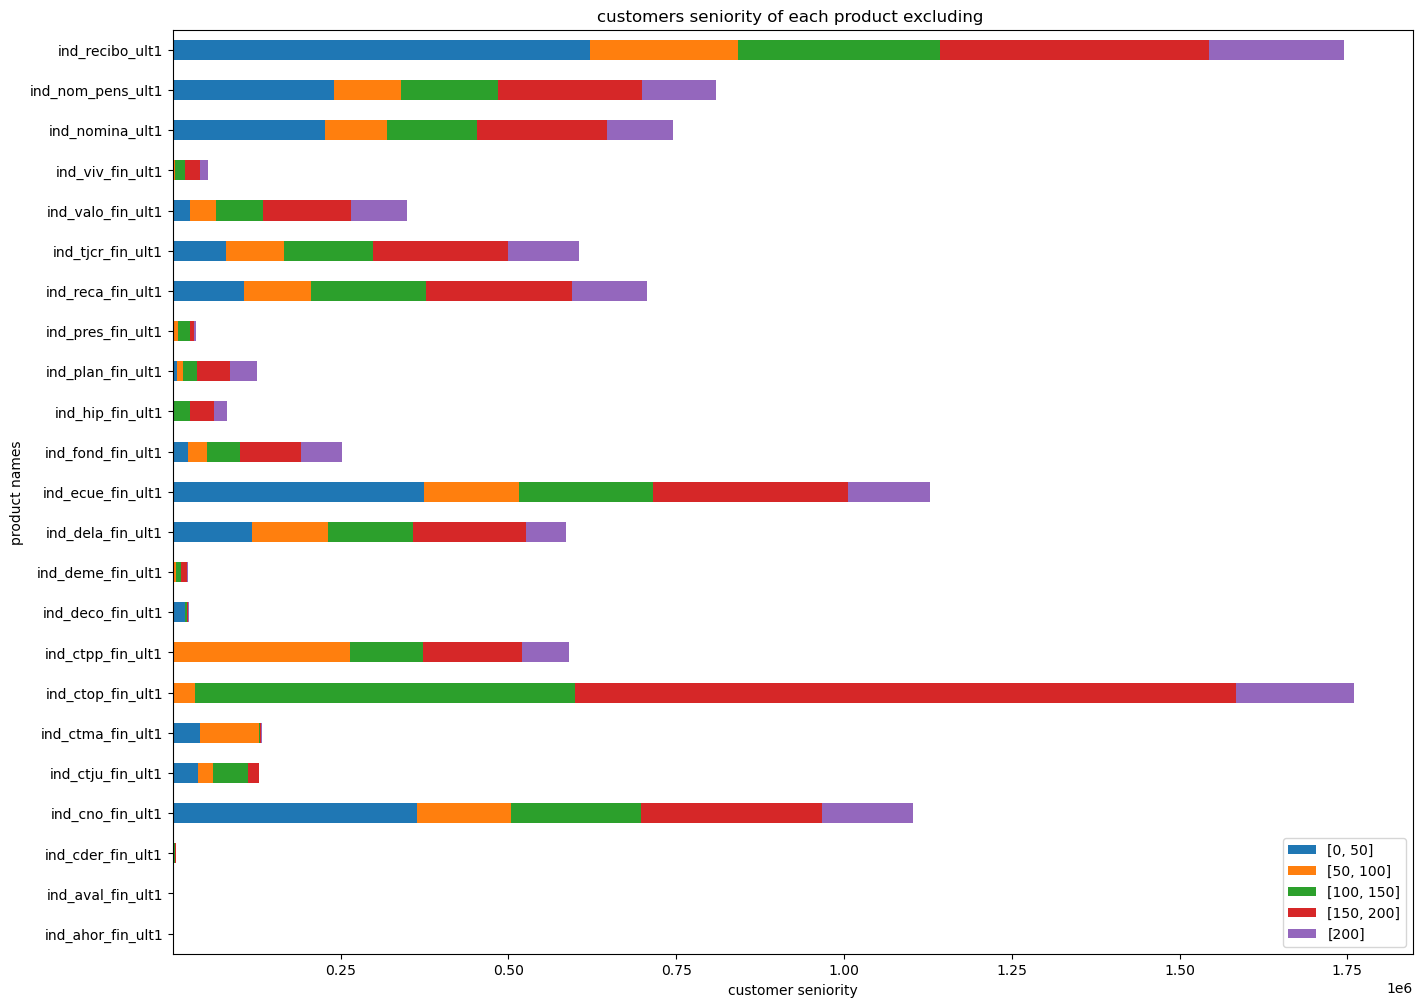

In [65]:
# Customers' seniority distribution of each product
df_a.plot(kind='barh', stacked=True, figsize=[16,12])
plt.title('customers seniority of each product excluding ') 
plt.xlabel('customer seniority') 
plt.ylabel('product names') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200]],loc="lower right") 

In [66]:
df.loc[df["antiguedad"]<0, 'antiguedad'] = 0

df_a = df.loc[:, ['antiguedad']].join(df.loc[:, 'ind_ahor_fin_ult1':'total_products'])
df_a.head()

antiguedad  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1  total_products
0         6.0                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0             1.0
1        35.0                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0             1.0
2        35.0                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0             1.0
3        35.0                  0                  0                 0                  0                 0                  0                  0                  0                  0                  1                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0             1.0
4        35.0                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0             1.0

In [67]:
df_a.groupby("total_products").agg("mean")

antiguedad  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
total_products                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
0.0              82.124277           0.000000           0.000000          0.000000           0.000000          0.000000           0.000000           0.000000           0.000000           0.000000           0.000000           0.000000           0.000000           0.000000           0.000000          0.000000           0.000000           0.000000           0.000000           0.000000           0.000000          0.000000         0.000000           0.000000         0.000000
1.0              58.712773           0.000037           0.000000          0.847444           0.000058          0.010163           0.017906           0.005550           0.056628           0.012897           0.000953           0.000043           0.006181           0.017738           0.001354          0.000768           0.002274           0.002041           0.009637           0.002777           0.002066          0.000926         0.000000           0.000032         0.002526
2.0             103.438498           0.000138           0.000000          0.903877           0.000630          0.045406           0.000423           0.024442           0.377635           0.065180           0.005534           0.002010           0.074072           0.124248           0.018511          0.001533           0.005936           0.006596           0.044429           0.019150           0.026773          0.005504         0.000744           0.003629         0.243602
3.0             114.687215           0.000392           0.000003          0.793608           0.001421          0.185431           0.000140           0.027252           0.354210           0.112630           0.003441           0.007850           0.199403           0.263398           0.072469          0.010502           0.021071           0.003511           0.145887           0.105274           0.100412          0.014273         0.098445           0.111772         0.367205
4.0             116.368564           0.000576           0.000080          0.566645           0.001751          0.432704           0.000004           0.020261           0.295827           0.147248           0.003382           0.010149           0.184055           0.322494           0.103474          0.017399           0.034445           0.003122           0.221574           0.203070           0.125129          0.015604         0.307146           0.335087         0.648773
5.0             129.744127           0.000335           0.000066          0.390452           0.002153          0.647084           0.000000           0.021536           0.267505           0.200951           0.002591           0.008503           0.171532           0.431807           0.103928          0.035383           0.049068           0.003432           0.315076           0.325360           0.137539          0.015579         0.508296           0.555736         0.806087
6.0             142.169084           0.000341           0.000180          0.269432           0.001593          0.816757           0.000009           0.021366           0.257139           0.253532           0.002930  

In [68]:
df_a = df_a.dropna(axis=0)
df_a = df_a.groupby("total_products").agg("mean")

df_b = df_a.loc[:, ['antiguedad']]
df_b.head()

antiguedad
total_products            
0.0              82.127070
1.0              58.712426
2.0             103.438287
3.0             114.687215
4.0             116.368564

Text(0, 0.5, 'average')

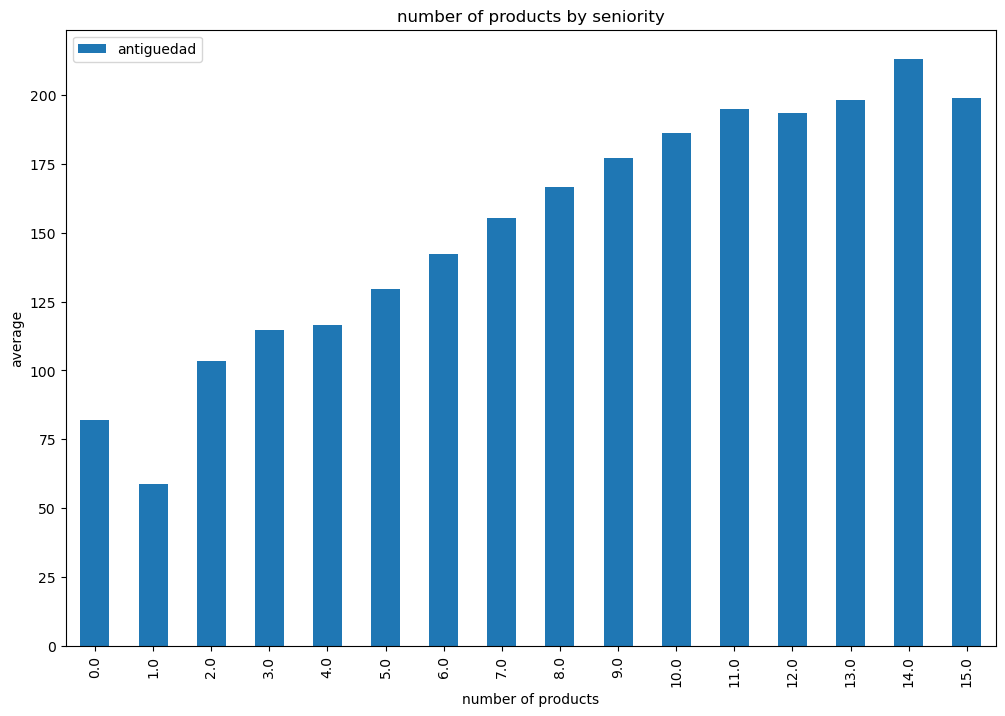

In [69]:
# Total number of products by seniority
df_b.plot(kind='bar', figsize=[12,8])
plt.title('number of products by seniority') 
plt.xlabel('number of products') 
plt.ylabel('average') 

In [70]:
#Ownership of products by customers on a monthly basis

df.ind_empleado.value_counts(dropna=False)

N      13610977
NaN       27734
B          3566
F          2523
A          2492
S            17
Name: ind_empleado, dtype: int64

In [71]:
# calculate the percentage of customers using different number of products
df_a = df["total_products"].value_counts().to_frame()

#customer id 
count = df["ncodpers"].count()
df_a["percent"] = (df_a["total_products"]/count)*100
df_a

total_products    percent
1.0          7169004  52.530532
0.0          2556239  18.730718
2.0          1930726  14.147302
3.0           770692   5.647209
4.0           450017   3.297478
5.0           289882   2.124096
6.0           210944   1.545682
7.0           141484   1.036717
8.0            76139   0.557905
9.0            33768   0.247433
10.0           12682   0.092927
11.0            4343   0.031823
12.0            1124   0.008236
13.0             230   0.001685
14.0              26   0.000191
15.0               9   0.000066

Observation: almost 52% of the customers used only one product. 

from the data 18% of the customers do not own any product.

In [72]:
# activity status of customer who did not own any product

df[df.total_products == 0.00]['ind_actividad_cliente'].value_counts()

0.0    2530764
1.0      19607
Name: ind_actividad_cliente, dtype: int64

Observations: most of the customers are non-active customers

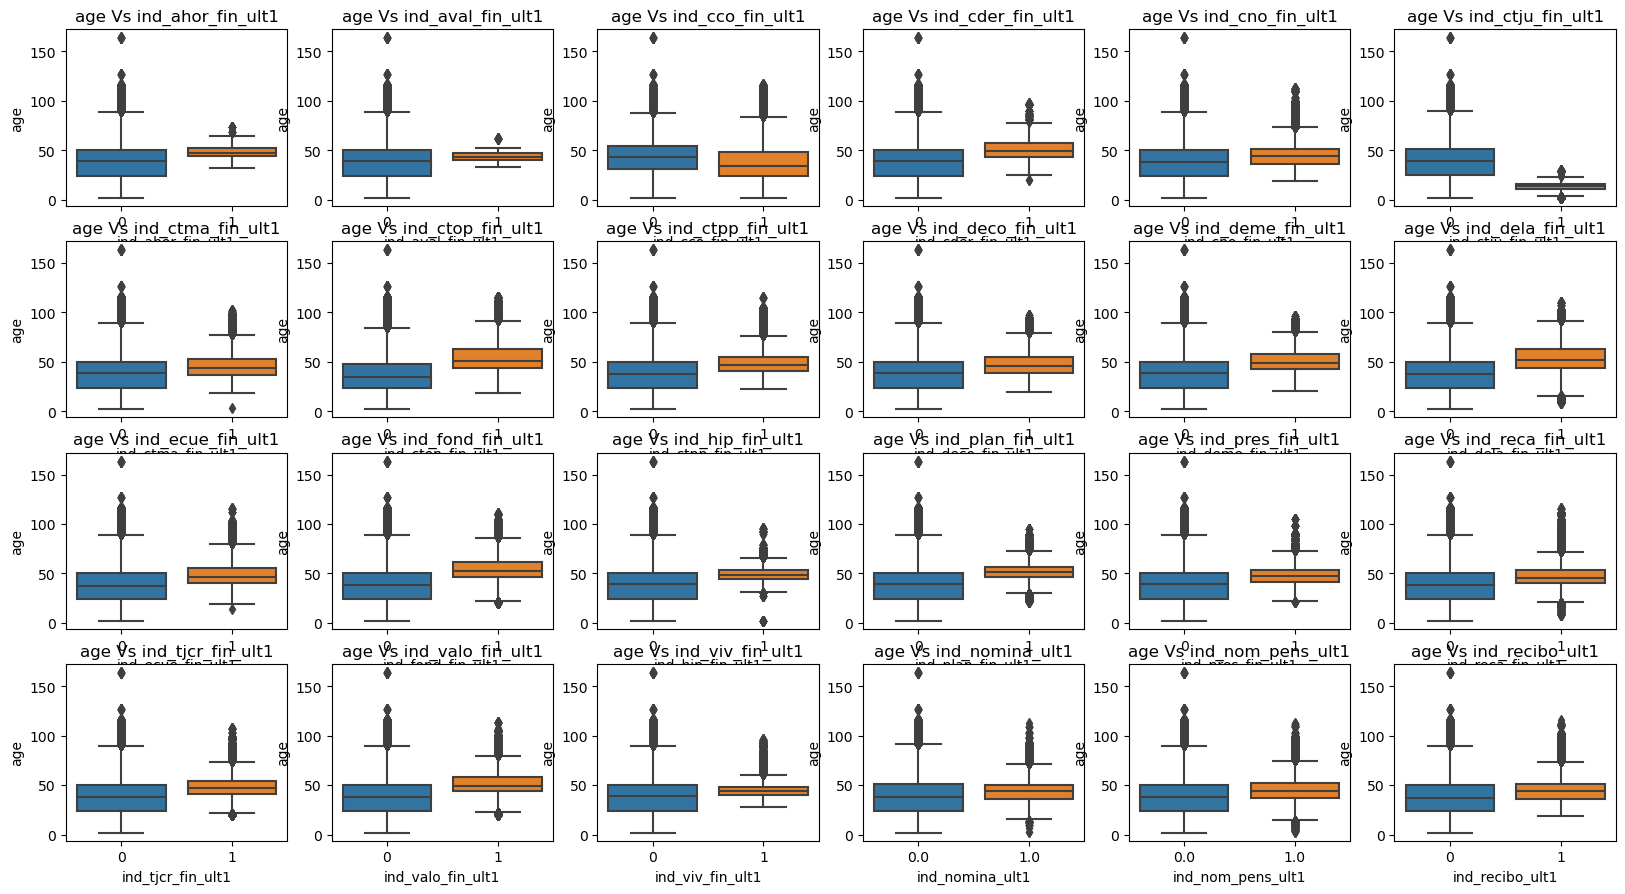

In [73]:
# Age vs Target Variables
fig = plt.figure(figsize=(20, 60))

plot_count = 0
for target_var in target_variables:
    plot_count += 1
    plt.subplot(22, 6, plot_count)
    sns.boxplot(x=target_var, y='age', data=df)
    plt.title('age Vs ' + target_var)
plt.show()


In [74]:
#returning the maximum and minimum age values in the DataFrame 'df'.
print('minimum age:',df.age.min())

print('maximum age:',df.age.max())

minimum age: 2.0
maximum age: 164.0


In [75]:
#Lets cap the max Age at 100  #https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

df.age.quantile(0.999)

cap_age_max = df.age.quantile(0.999)
cap_age_max = df["age"].loc[df["age"] > cap_age_max]

df_a = df.loc[:, ['age']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])

#return dictionary similar to {'Savings_Acct': 'sum','Guarantees': 'sum','Cur_Acct': 'sum'} that include all products

product_sum = {column:'sum' for column in df_a.columns.drop(['age']).tolist()}

In [76]:
"""grouping the df_a by the 'age' column and then applying the product_sum aggregation function to the remaining columns. 
The resulting df has one row per unique age value and the values in each column are the product of all the corresponding values for that age group. 
The reindex function is used to drop the 'age' column from the DataFrame, so only the aggregated columns are retained."""

df_a = df_a.groupby('age').agg(product_sum).reindex(columns=df_a.columns.drop('age'))
df_a.head()


ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
age                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2.0                  0                  0                 7                  0                 0                565                  0                  0                  0                  0                  0                  0                  0                  0                34                  0                  0                  0                  0                  0                 0              0.0                0.0                0
3.0                  0                  0                 2                  0                 0               1415                  1                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              2.0                3.0                0
4.0                  0                  0                11                  0                 0               1996                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0               11.0                0
5.0                  0                  0                 6                  0                 0               2724                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                9.0                0
6.0                  0                  0                 0                  0                 0               3376                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0               13.0                0

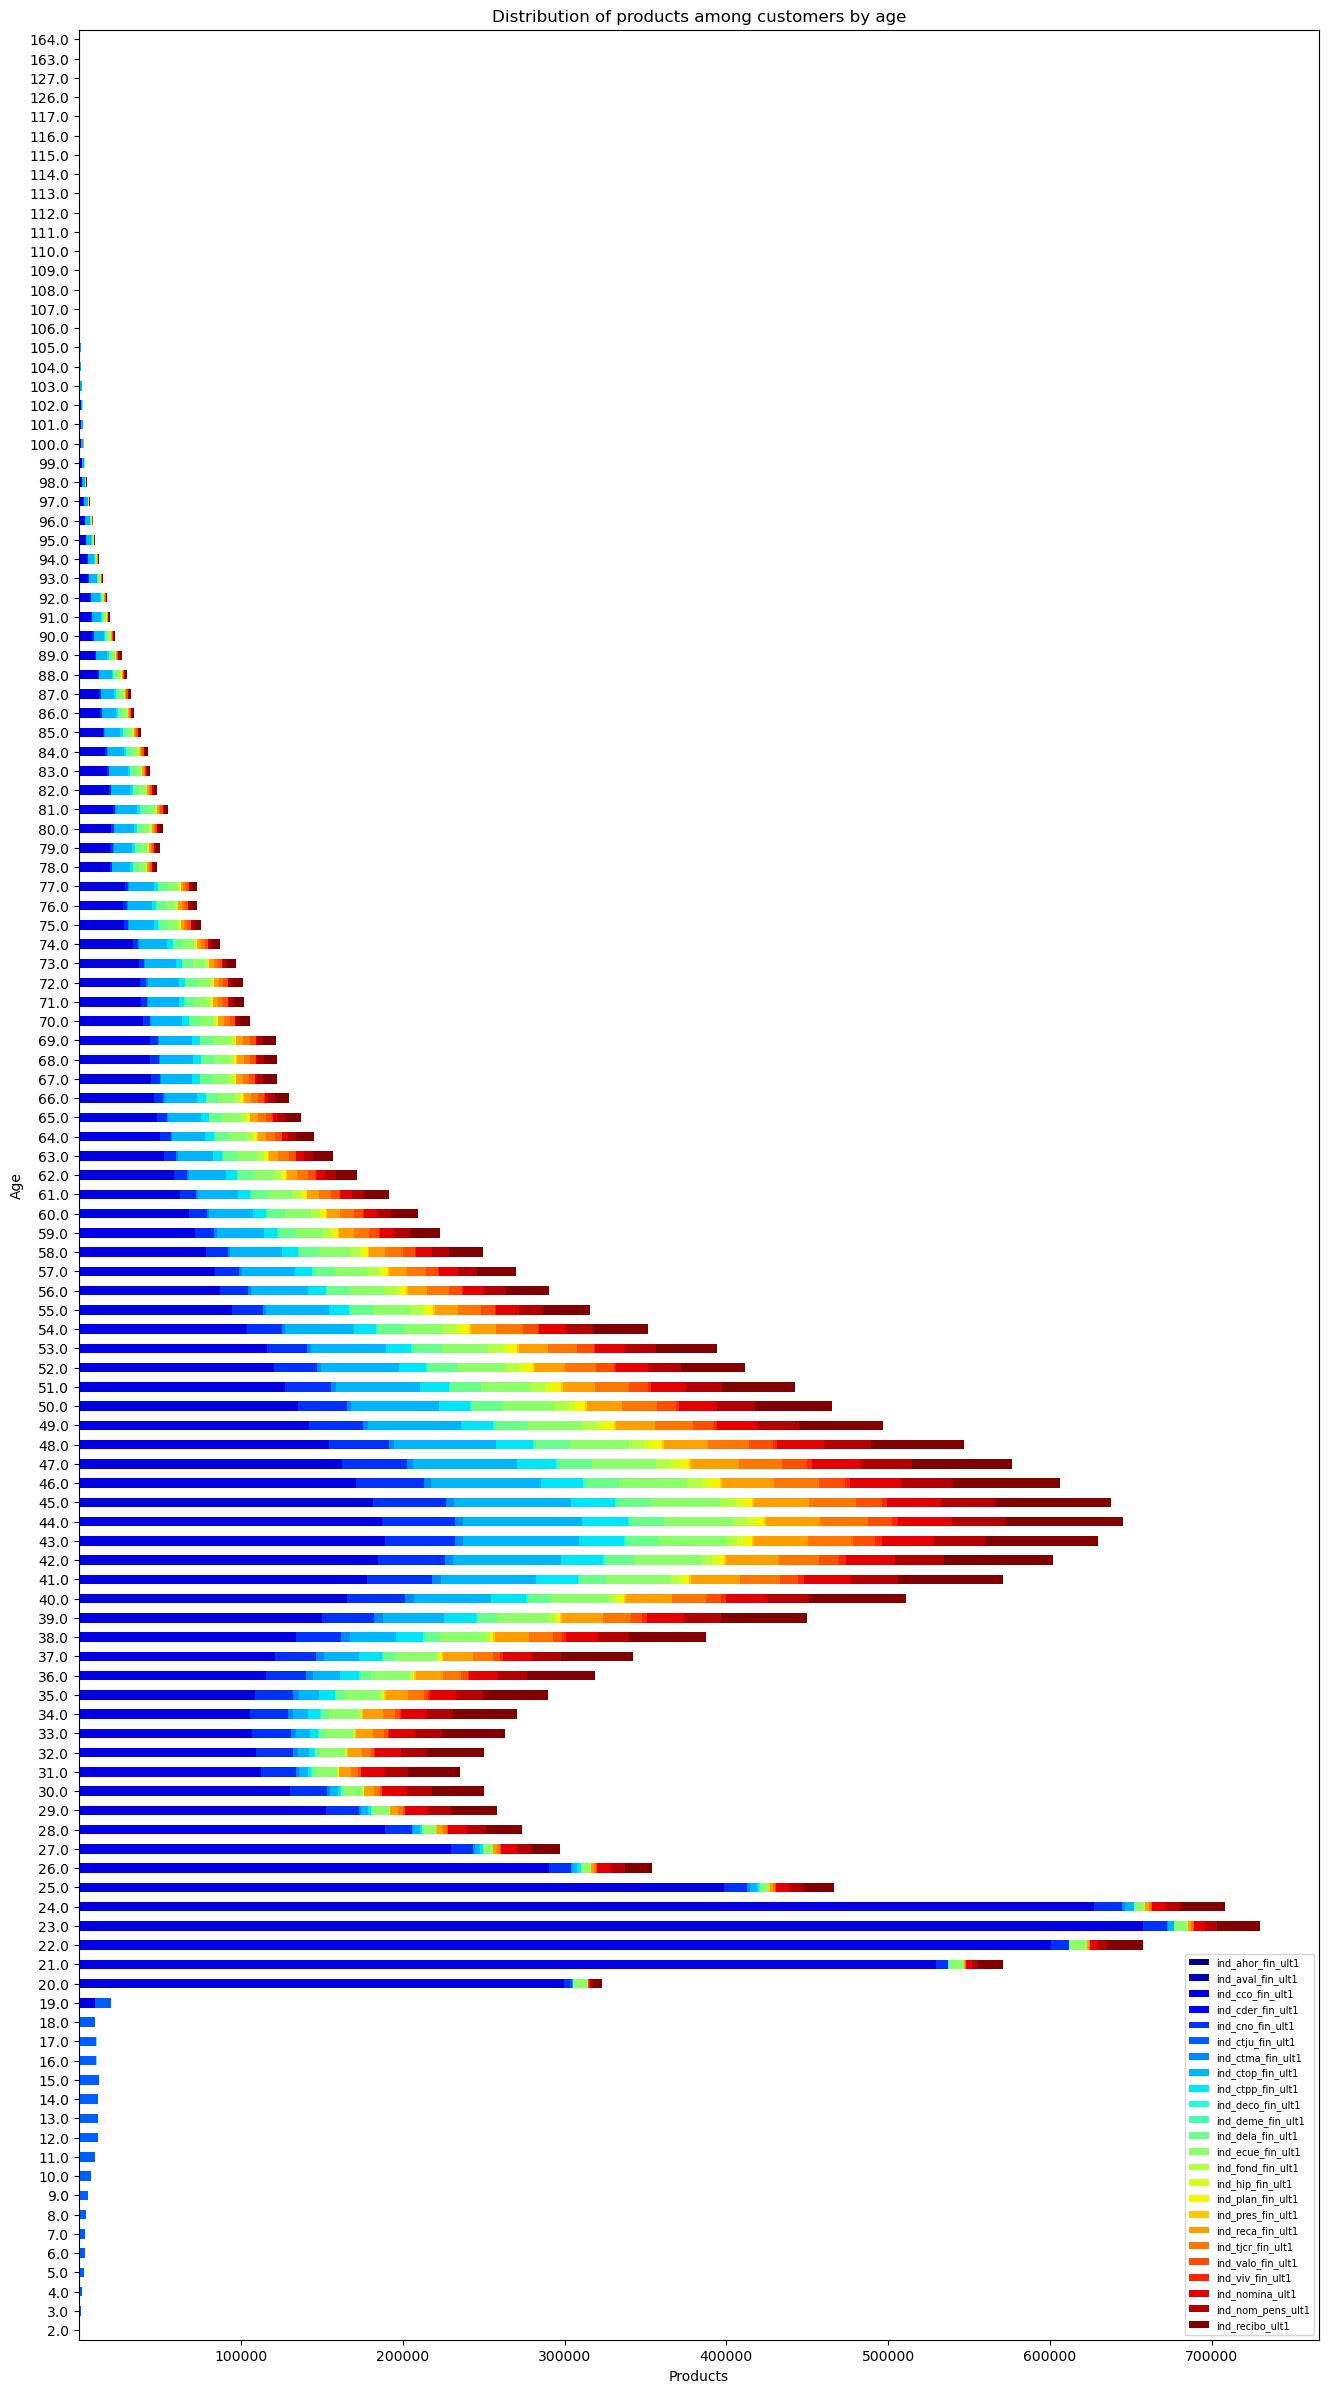

In [77]:
# Plot of product share based on customer's age
df_a.plot(kind='barh', stacked=True, figsize=[16,30], colormap='jet')
plt.title('Distribution of products among customers by age') 
plt.xlabel('Products') 
plt.ylabel('Age') 
plt.legend(prop={'size':7},loc="lower right") 

observations: There are 2 peaks in the age 
1) form age : 20 to 27 

2) form age : 36 to 56

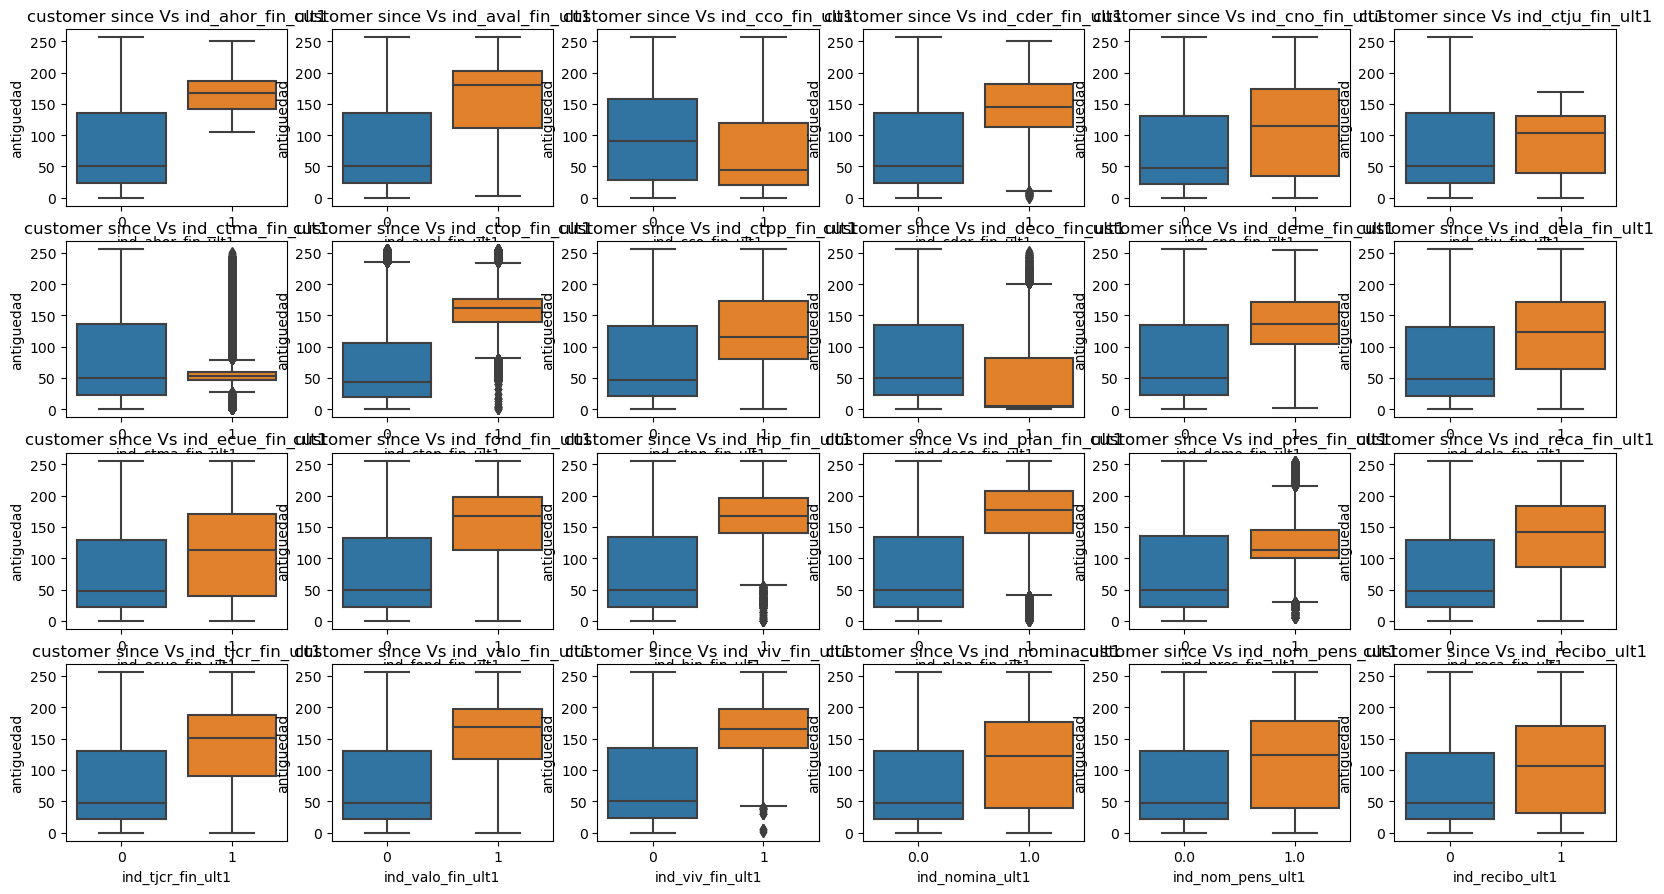

In [78]:
# # Customer Seniority vs Target Variables
fig = plt.figure(figsize=(20, 60))

plot_count = 0
for target_variable in target_variables:
    plot_count += 1
    plt.subplot(22, 6, plot_count)
    sns.boxplot(x=target_variable, y='antiguedad', data=df)
    plt.title('customer since Vs ' + target_variable)
plt.show()


Observation: From the plots, it appears that there is some extreme values in the 'customer since' (antiguedad) variable that are affecting the distribution of the data. 

These outliers may be skewing the analysis and should be investigated further to determine their impact on the target variables.








In [79]:
#returning the minimum and median value of the antiguedad column in the DataFrame df.
df['antiguedad'].min(), df['antiguedad'].median()

(0.0, 50.0)

In [80]:
#counting the number of rows in the df where the value in the column antiguedad is equal to the minimum value of the antiguedad column.

df[df['antiguedad'] == df['antiguedad'].min()]['antiguedad'].count()

134522

In [81]:
#replacing all the values in the antiguedad column in df which are equal to -999999.0 with the value 50 
df["antiguedad"].loc[df["antiguedad"] == -999999.0] = 50

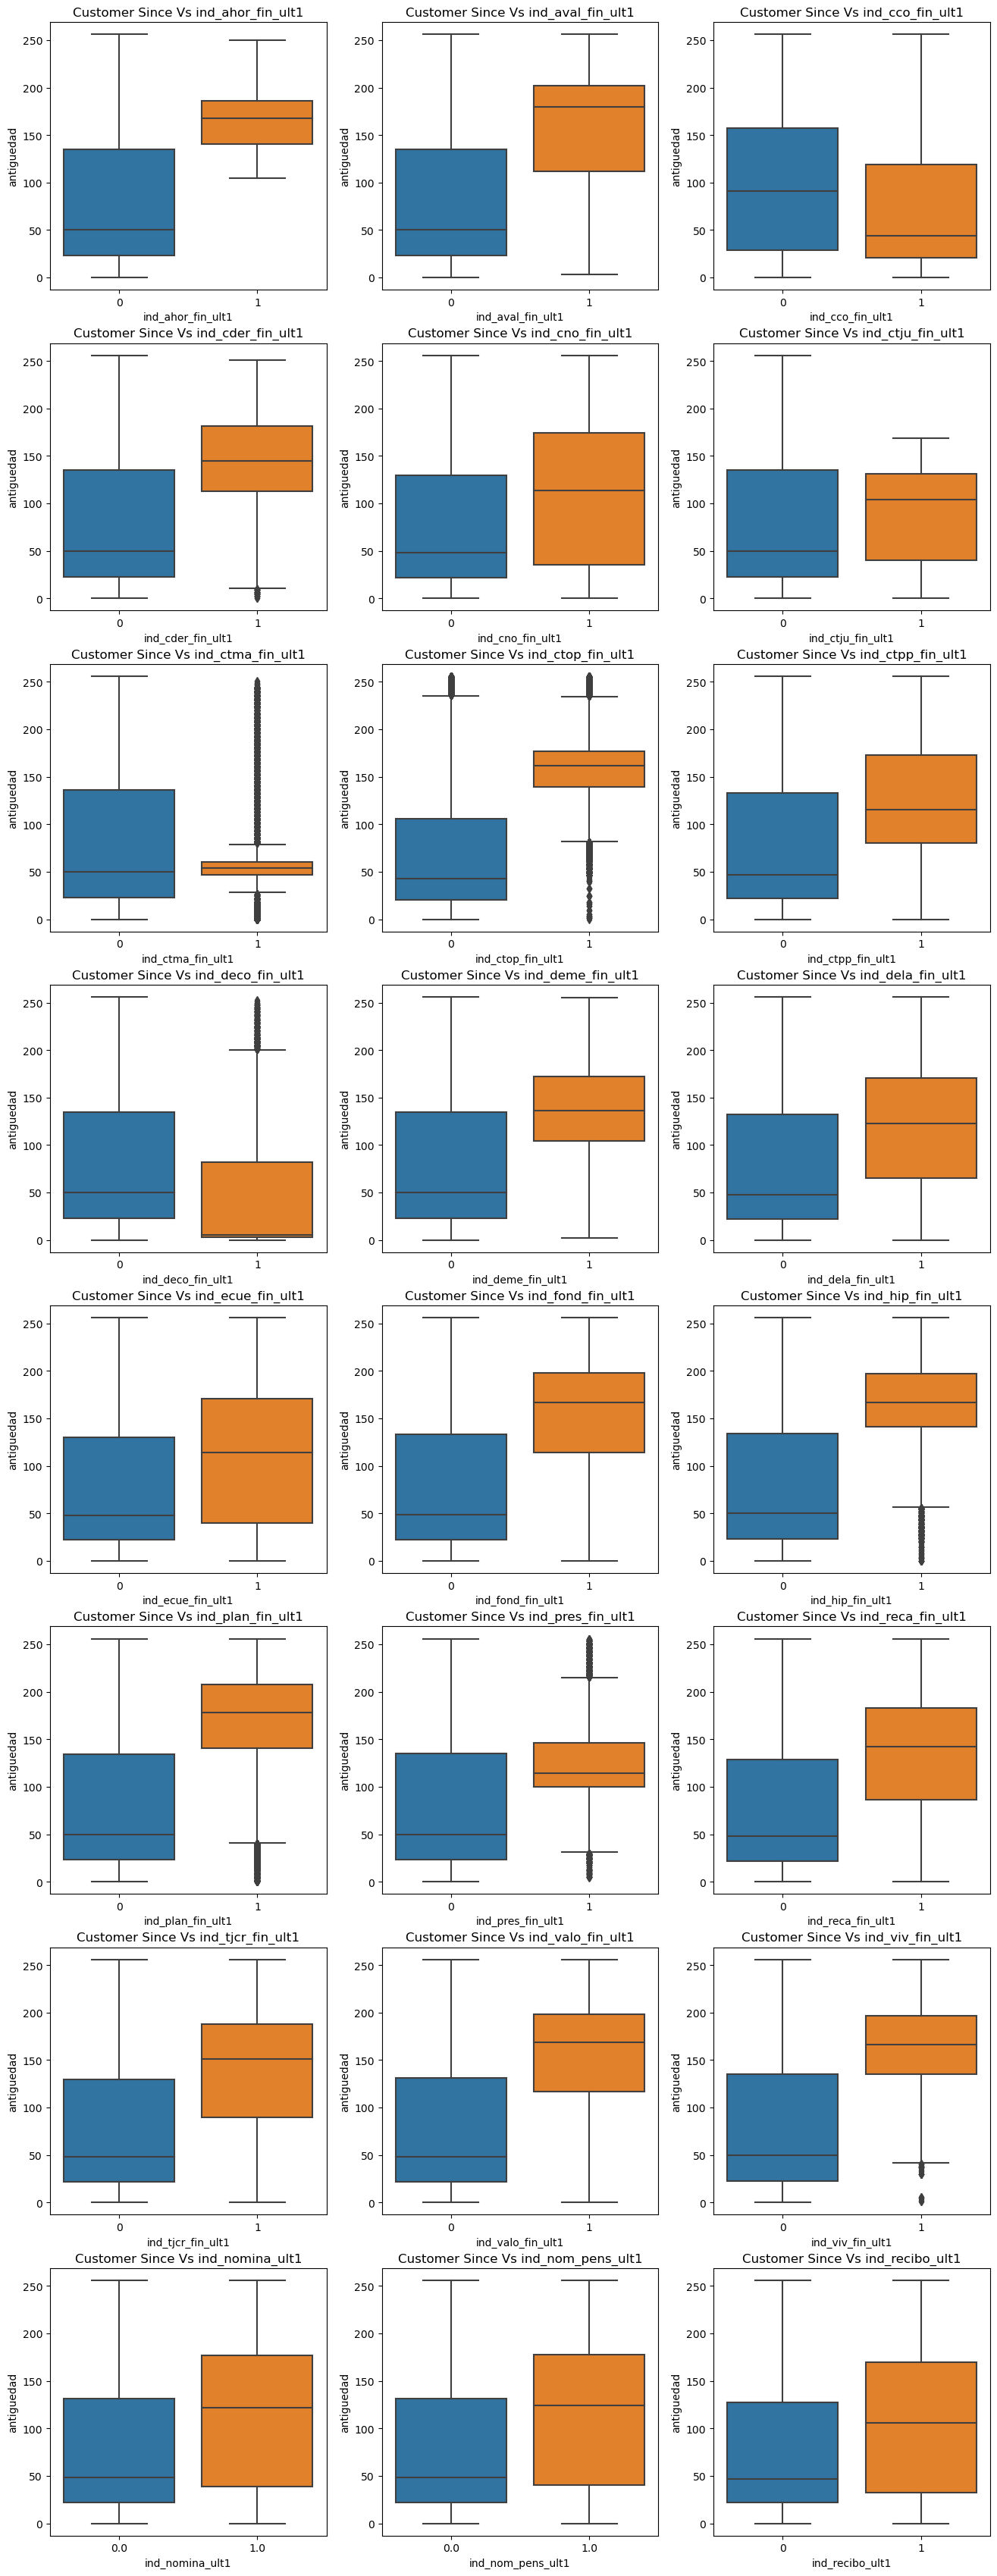

In [82]:
fig = plt.figure(figsize=(16, 120))

plot_count = 0
for ind, target_var in enumerate(target_variables):
    plot_count += 1
    plt.subplot(22, 3, plot_count)
    sns.boxplot(x=target_var, y='antiguedad', data=df)
    plt.title('Customer Since Vs ' + target_var)
plt.show()

Observation: This data is similar to age data, customer seniority also help choose which product customer chooses.

In [83]:
#ploting houseHold income vs target variables

#maximum household income to the 99.9th percentile value of the "renta" column in df using the quantile() method.

household_income_max = df.renta.quantile(0.999)


#creating a new Series household_income_max that contains all the values of the renta column in df that are greater than the maximum household income. 
#This is done by using boolean indexing to select the values that satisfy the condition df["renta"]>household_income_max.

household_income_max= df["renta"].loc[df["renta"]>household_income_max]


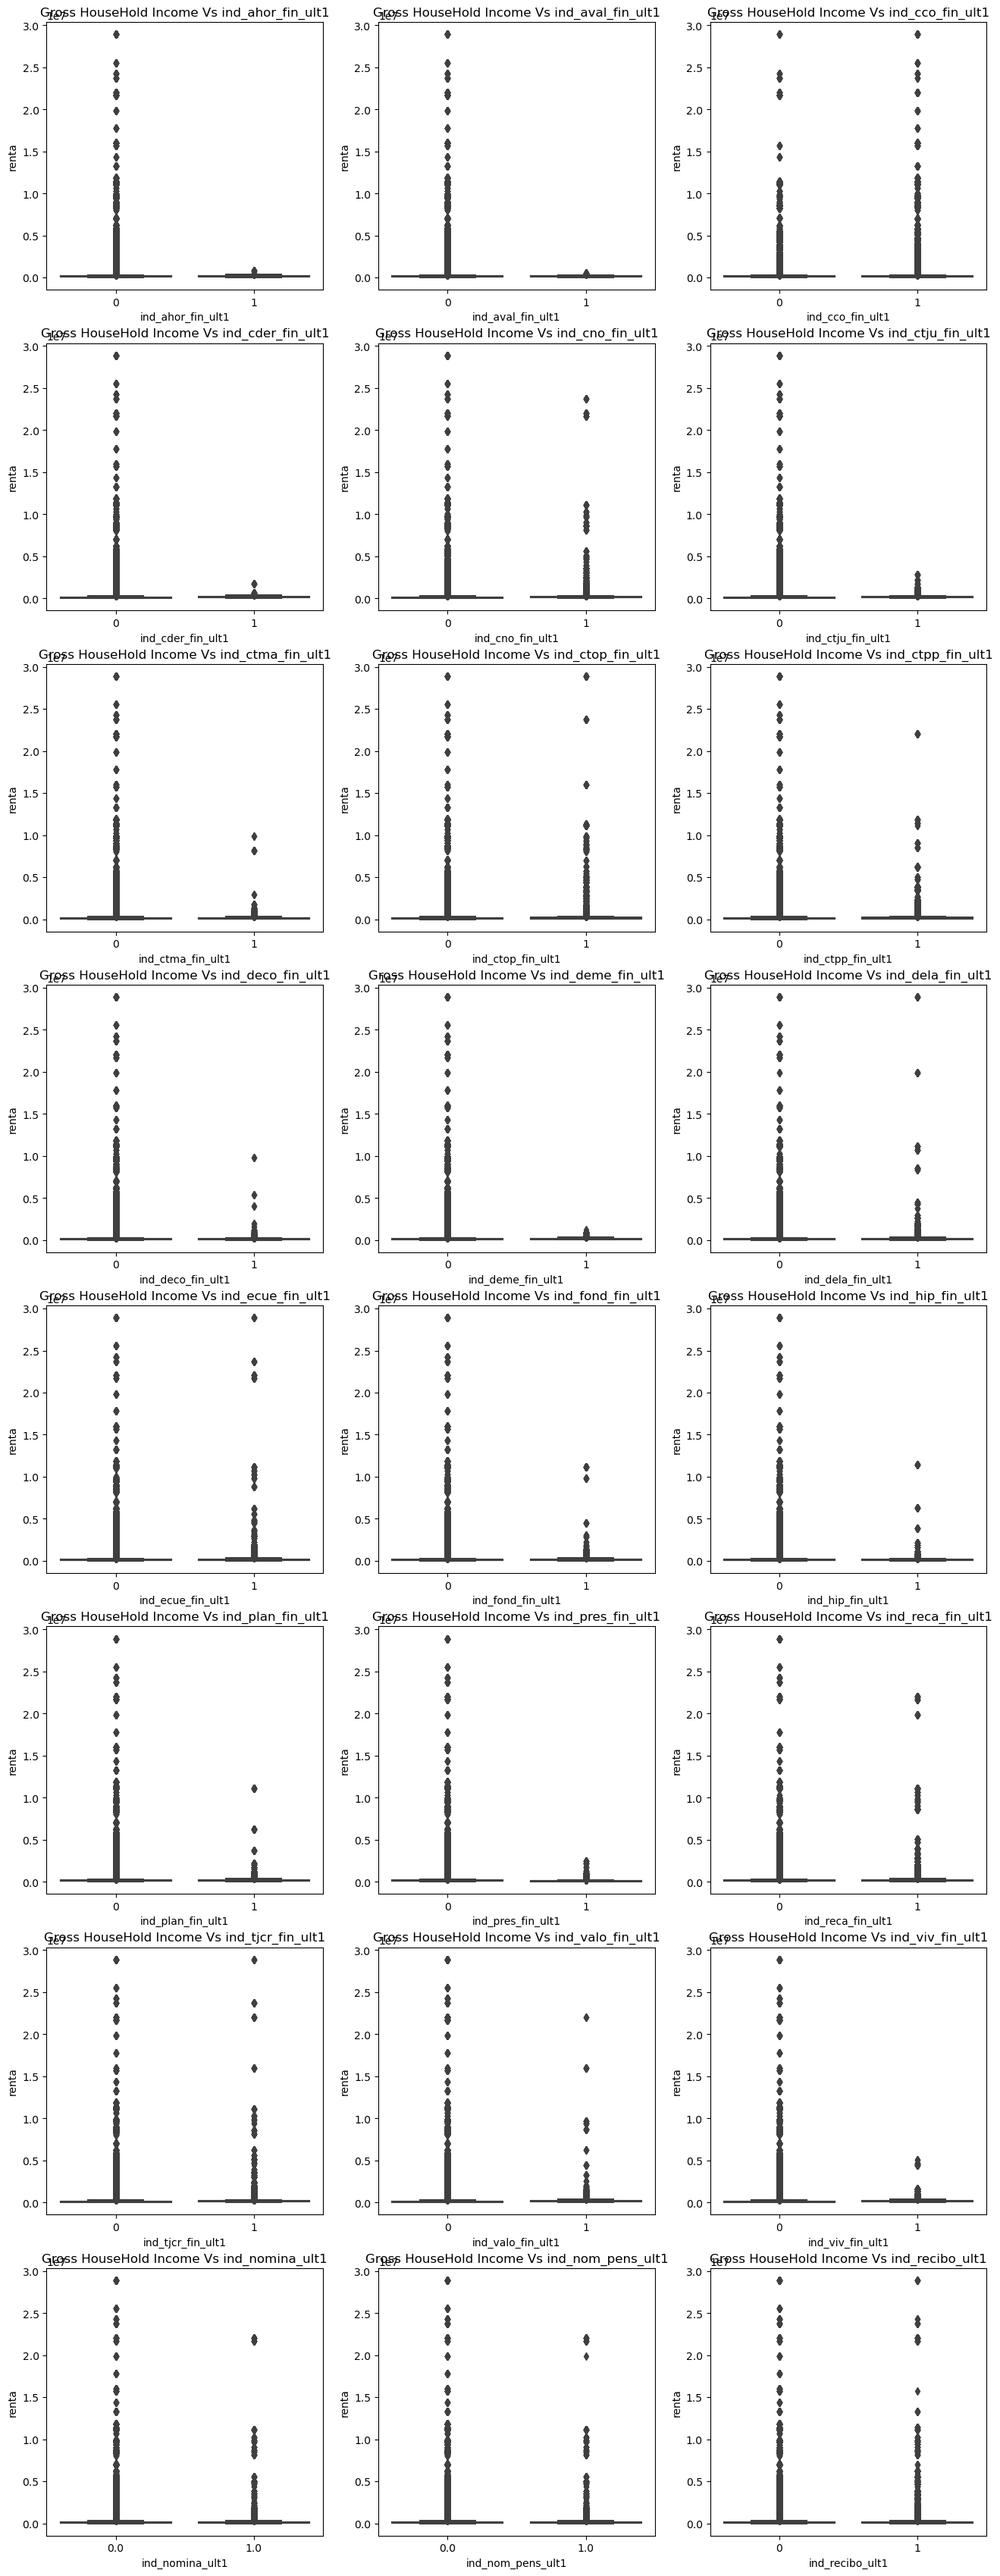

In [84]:
fig = plt.figure(figsize=(16, 120))

plot_count = 0
for ind, target_var in enumerate(target_variables):
    plot_count += 1
    plt.subplot(22, 3, plot_count)
    sns.boxplot(x=target_var, y='renta', data=df)
    plt.title('Gross HouseHold Income Vs ' + target_var)
plt.show()

Observation: Household income does not help to choose which product a customer choose

In [85]:
#Total number of products by segmentation

df_a = df.groupby('segmento')['total_products'].agg('sum')
df_a

segmento
01 - TOP               2313447.0
02 - PARTICULARES     12575643.0
03 - UNIVERSITARIO     4953625.0
Name: total_products, dtype: float64

In [86]:
# to delete this code after the restart the whole noetebook

# df_a.plot(x=None, y=None, kind='pie', autopct='%1.0f%%')
# plt.title('Number of products by segment') 

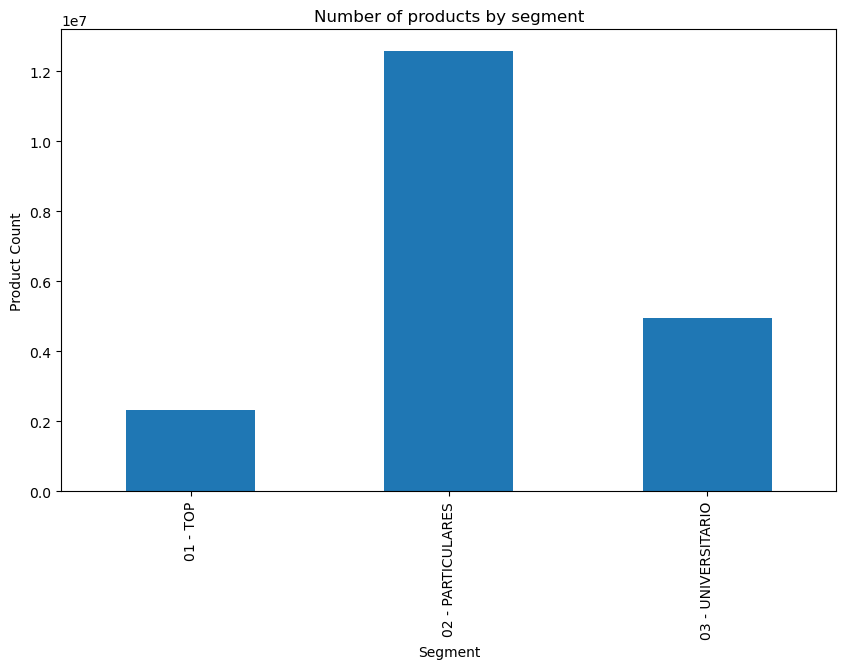

In [87]:
# plot a bar chart of the product counts by segment
df_a.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Number of products by segment')
plt.xlabel('Segment')
plt.ylabel('Product Count')
plt.show()


Observation:

Paticulares own most of products.

In [88]:
df.ind_empleado.value_counts(dropna=False)

N      13610977
NaN       27734
B          3566
F          2523
A          2492
S            17
Name: ind_empleado, dtype: int64

In [89]:
customer_id = df.ncodpers.unique()

In [90]:
customer_id[:10]

array([1375586, 1050611, 1050612, 1050613, 1050614, 1050615, 1050616,
       1050617, 1050619, 1050620])

In [91]:
pd.set_option('display.max_columns', 500)

In [92]:
cols = ['fecha_dato', 'ncodpers','ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1','ind_cder_fin_ult1', 
        'ind_cno_fin_ult1', 'ind_ctju_fin_ult1','ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1','ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 
        'ind_hip_fin_ult1','ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1',
        'ind_valo_fin_ult1', 'ind_viv_fin_ult1','ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

df[df.ncodpers==1050612][cols]


fecha_dato  ncodpers  ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
2         2015-01-28   1050612                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0
1243373   2015-02-28   1050612                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0
1847832   2015-03-28   1050612                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0
2507210   2015-04-28   1050612                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0
2519200   2015-05-28   1050612                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0
3176929   2015-06-28   1050612                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0
4371720   2015-07-28   1050612                  0                  0                 1                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0              0.0                0.0                0
5136564   2015-08-28   1050612                  0                  0                 1                  0                 0                  0                  0                 

In [93]:
df.ind_empleado.value_counts(dropna=False)

N      13610977
NaN       27734
B          3566
F          2523
A          2492
S            17
Name: ind_empleado, dtype: int64

#### Handaling the missing values

In [94]:
df_test = pd.read_csv('/kaggle/input/santander-product-recommendation/test_ver2.csv.zip')
df_test

fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  ind_nuevo  antiguedad  indrel ult_fec_cli_1t  indrel_1mes tiprel_1mes indresi indext conyuemp canal_entrada indfall  tipodom  cod_prov         nomprov  ind_actividad_cliente        renta            segmento
0       2016-06-28     15889            F              ES    V   56  1995-01-16          0         256       1            NaN          1.0           A       S      N        N           KAT       N        1      28.0          MADRID                      1    326124.90            01 - TOP
1       2016-06-28   1170544            N              ES    H   36  2013-08-28          0          34       1            NaN          1.0           I       S      N      NaN           KAT       N        1       3.0        ALICANTE                      0           NA   02 - PARTICULARES
2       2016-06-28   1170545            N              ES    V   22  2013-08-28          0          34       1            NaN          1.0           A       S      N      NaN           KHE       N        1      15.0       CORUÑA, A                      1           NA  03 - UNIVERSITARIO
3       2016-06-28   1170547            N              ES    H   22  2013-08-28          0          34       1            NaN          1.0           I       S      N      NaN           KHE       N        1       8.0       BARCELONA                      0    148402.98  03 - UNIVERSITARIO
4       2016-06-28   1170548            N              ES    H   22  2013-08-28          0          34       1            NaN          1.0           I       S      N      NaN           KHE       N        1       7.0  BALEARS, ILLES                      0    106885.80  03 - UNIVERSITARIO
...            ...       ...          ...             ...  ...  ...         ...        ...         ...     ...            ...          ...         ...     ...    ...      ...           ...     ...      ...       ...             ...                    ...          ...                 ...
929610  2016-06-28    660237            N              ES    V   55  1999-04-21          0         206       1            NaN          1.0           A       S      N      NaN           KAT       N        1      28.0          MADRID                      1    128643.57            01 - TOP
929611  2016-06-28    660238            N              ES    V   30  2006-11-29          0         115       1            NaN          1.0           I       S      N      NaN           KFC       N        1      26.0       RIOJA, LA                      0           NA   02 - PARTICULARES
929612  2016-06-28    660240            N              ES    V   52  2006-11-29          0         115       1            NaN          1.0           A       S      N      NaN           KBZ       N        1      33.0        ASTURIAS                      1     72765.27   02 - PARTICULARES
929613  2016-06-28    660243            N              ES    V   32  2006-11-29          0         115       1            NaN          1.0           I       S      N      NaN           KFC       N        1      33.0        ASTURIAS                      0    147488.88   02 - PARTICULARES
929614  2016-06-28    660248            N              ES    V   92  2006-11-29          0         115       1            NaN          1.0           A       S      N      NaN           KAT       N        1      45.0          TOLEDO                      0           NA   02 - PARTICULARES

[929615 rows x 24 columns]

In [95]:
#function to calculate missing values by column

def count_missing_values(df):
    num_cols = len(df.columns)
    num_cols_with_missing_values = df.isnull().any().sum()
    print("")
    print(f"The Test Dataframe has {num_cols} columns.")
    print(f"There are {num_cols_with_missing_values} columns that have missing values.")
    print("-"*50)

    return df.isnull().sum()


In [96]:
count_missing_values(df_test)



The Test Dataframe has 24 columns.
There are 9 columns that have missing values.
--------------------------------------------------


fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          5
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           927932
indrel_1mes                  23
tiprel_1mes                  23
indresi                       0
indext                        0
conyuemp                 929511
canal_entrada              2081
indfall                       0
tipodom                       0
cod_prov                   3996
nomprov                    3996
ind_actividad_cliente         0
renta                         0
segmento                   2248
dtype: int64

observations: For some columns like 'ult_fec_cli_1t' and 'conyuemp', almost all the values are missing in the test set.

In some columns like 'sexo' and 'indrel_1mes','tiprel_1mes ',have only a few missing values. These missing values need to be handled before using the test set for analysis or modeling.

In [97]:
# Define a function to calculate missing values in a dataframe
def calculate_missing_values(df):
    # Get the sum of missing values for each column
    missing_values = df.isnull().sum()
    # Calculate the percentage of missing values for each column
    missing_values_percent = 100 * missing_values / len(df)
    # Combine the missing values and percentages into a single table
    missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
    # Rename the columns of the table
    missing_values_table = missing_values_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    # Filter the table to only include columns with missing values
    missing_values_table = missing_values_table[missing_values_table.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False)
    # Return the table of missing values
    return missing_values_table

# Define a function to compare missing values between two dataframes
def compare_missing_values(train_df, test_df):
    # Calculate the missing values for the train and test dataframes
    train_missing_values = calculate_missing_values(train_df)
    test_missing_values = calculate_missing_values(test_df)

    # Rename the columns of the train and test missing value tables
    train_missing_values = train_missing_values.rename(columns={'Missing Values': 'Missing Values Train', '% of Total Values': '% of Total Values Train'})
    test_missing_values = test_missing_values.rename(columns={'Missing Values': 'Missing Values Test', '% of Total Values': '% of Total Values Test'})

    # Print the number of columns and number of columns with missing values for the train and test dataframes
    print(f'Train Dataframe has {train_df.shape[1]} columns.')
    print(f'There are {train_missing_values.shape[0]} columns that have missing values in the train dataframe.\n')
    print(f'Test Dataframe has {test_df.shape[1]} columns.')
    print(f'There are {test_missing_values.shape[0]} columns that have missing values in the test dataframe.')
    print('-' * 50)

    # Display the train and test missing value tables side by side
    pd.options.display.max_rows = None
    pd.options.display.max_columns = None
    print(pd.concat([train_missing_values, test_missing_values], axis=1))


In [98]:
#printing all the missing value columns of train data and test data
compare_missing_values(df, df_test)


Train Dataframe has 49 columns.
There are 24 columns that have missing values in the train dataframe.

Test Dataframe has 24 columns.
There are 9 columns that have missing values in the test dataframe.
--------------------------------------------------
                       Missing Values Train  % of Total Values Train  Missing Values Test  % of Total Values Test
conyuemp                           13645501                99.986752             929511.0               99.988813
ult_fec_cli_1t                     13622516                99.818330             927932.0               99.818957
renta                               2794375                20.475648                  NaN                     NaN
segmento                             189368                 1.387585               2248.0                0.241821
canal_entrada                        186126                 1.363829               2081.0                0.223856
indrel_1mes                          149781                 1.0

In [99]:
# counting the number of occurrences of each unique value in the 'conyuemp' column df. 
# dropna=False is used to include any missing values in the counts.


# Count the number of occurrences of each unique value in the conyuemp column
conyuemp_counts = df.conyuemp.value_counts(dropna=False)

# Print the counts
print("Counts of Unique Values in conyuemp Column:")
print(conyuemp_counts)

# Count the number of missing values in the conyuemp column
num_missing_values = df.conyuemp.isnull().sum()

# Calculate the percentage of missing values
percent_missing_values = (num_missing_values / len(df.conyuemp)) * 100

# Print the number and percentage of missing values
print(f"\nNumber of Missing Values: {num_missing_values}")
print(f"Percentage of Missing Values: {percent_missing_values:.2f}%")


Counts of Unique Values in conyuemp Column:
NaN    13645501
N          1791
S            17
Name: conyuemp, dtype: int64

Number of Missing Values: 13645501
Percentage of Missing Values: 99.99%


In [100]:
#filling the missing values in the "conyuemp" column of both the train and test dataframes with the value "N".
fill_N = "N"
df.loc[df["conyuemp"].isnull(),"conyuemp"] = fill_N
df_test.loc[df_test["conyuemp"].isnull(),"conyuemp"] = fill_N

In [101]:
df.ult_fec_cli_1t.dtype

dtype('O')

In [102]:
#we will impute it with a future date
fill_dt = "2020-12-31"
df.loc[df["ult_fec_cli_1t"].isnull(),"ult_fec_cli_1t"] = fill_dt
df_test.loc[df_test["ult_fec_cli_1t"].isnull(),"ult_fec_cli_1t"] = fill_dt


In [103]:
df.loc[df["renta"].isnull(),"renta"] = np.nanmedian(df.renta)

In [104]:
#Looks like Cust_Segment and Join_Channel are missing for the same customers
df.segmento.value_counts(dropna=False)

02 - PARTICULARES     7960220
03 - UNIVERSITARIO    4935579
01 - TOP               562142
NaN                    189368
Name: segmento, dtype: int64

In [105]:
fill_value = '02 - PARTICULARES'
df.loc[df["segmento"].isnull(),"segmento"] = fill_value
df_test.loc[df_test["segmento"].isnull(),"segmento"] = fill_value


In [106]:
df.canal_entrada.value_counts().head()

KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
Name: canal_entrada, dtype: int64

In [107]:
fill_channel = 'KHE'
df.loc[df["canal_entrada"].isnull(),"canal_entrada"] = fill_channel
df_test.loc[df_test["canal_entrada"].isnull(),"canal_entrada"] = fill_channel

In [108]:
df.indrel_1mes.value_counts(dropna=False)

1.0    7277607
1.0    4017746
1      2195328
NaN     149781
3.0       1804
3.0       1409
3         1137
P          874
2          483
2.0        479
2.0        355
4.0        143
4.0         93
4           70
Name: indrel_1mes, dtype: int64

In [109]:
df_test.indrel_1mes.value_counts(dropna=False)


1.0    929565
3.0        27
NaN        23
Name: indrel_1mes, dtype: int64

In [110]:
"""transforming the "indrel_1mes" column of the dataframes "df" and "df_test". 
The lambda function maps the value "P" to 5.0 and leaves the other values as they are
The "astype(float)" method converts the column to float type
The "fillna(0.0)" method fills missing values with 0.0
The "astype(np.int8)" method converts the column to int8 type
this transformation is to clean and prepare the "indrel_1mes" column for further analysis."""

df["indrel_1mes"] = df["indrel_1mes"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
df_test["indrel_1mes"] = df_test["indrel_1mes"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)

In [111]:
#counting the number of occurrences of each unique value in the "tiprel_1mes" column of the DataFrame "df", 
#including missing values (if any), and displays the counts in descending order,it shows the frequency distribution of values 

df.tiprel_1mes.value_counts(dropna=False)

I      7304875
A      6187123
NaN     149781
P         4656
R          870
N            4
Name: tiprel_1mes, dtype: int64

In [112]:
#fills the missing values in the "tiprel_1mes" column of the Pandas DataFrame "df" and "df_test" with the string value "I".

fill_vals = 'I'
df.loc[df["tiprel_1mes"].isnull(),"tiprel_1mes"] = fill_vals
df_test.loc[df_test["tiprel_1mes"].isnull(),"tiprel_1mes"] = fill_vals

In [113]:
df.cod_prov.value_counts().head()

28.0    4409600
8.0     1275219
46.0     682304
41.0     605164
15.0     429322
Name: cod_prov, dtype: int64

In [114]:
fill_cust_province = 28.0
df.loc[df["cod_prov"].isnull(),"cod_prov"] = fill_cust_province
df_test.loc[df_test["cod_prov"].isnull(),"cod_prov"] = fill_cust_province

In [115]:
df.nomprov.value_counts().head()

MADRID       4409600
BARCELONA    1275219
VALENCIA      682304
SEVILLA       605164
CORUÑA, A     429322
Name: nomprov, dtype: int64

In [116]:
fill_cust_province_name = 'MADRID'
df.loc[df["nomprov"].isnull(),"nomprov"] = fill_cust_province_name
df_test.loc[df_test["nomprov"].isnull(),"nomprov"] = fill_cust_province_name

In [117]:
df.sexo.value_counts(dropna=False)

V      7424252
H      6195253
NaN      27804
Name: sexo, dtype: int64

In [118]:
fill_cust_sex = 'V'
df.loc[df["sexo"].isnull(),"sexo"] = fill_cust_sex
df_test.loc[df_test["sexo"].isnull(),"sexo"] = fill_cust_sex

In [119]:
df.tipodom.value_counts(dropna=False)

1.0    13619574
NaN       27735
Name: tipodom, dtype: int64

In [120]:
fill_address_type = 1.0
df.loc[df["tipodom"].isnull(),"tipodom"] = fill_address_type
df_test.loc[df_test["tipodom"].isnull(),"tipodom"] = fill_address_type

In [121]:
df.ind_empleado.value_counts(dropna=False)

N      13610977
NaN       27734
B          3566
F          2523
A          2492
S            17
Name: ind_empleado, dtype: int64

In [122]:
fill_emp_status = 'N'
df.loc[df["ind_empleado"].isnull(),"ind_empleado"] = fill_emp_status
df_test.loc[df_test["ind_empleado"].isnull(),"ind_empleado"] = fill_emp_status

In [123]:
df.pais_residencia.value_counts().head()

ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
Name: pais_residencia, dtype: int64

In [124]:
fill_cust_cntry = 'ES'
df.loc[df["pais_residencia"].isnull(),"pais_residencia"] = fill_cust_cntry
df_test.loc[df_test["pais_residencia"].isnull(),"pais_residencia"] = fill_cust_cntry

In [125]:
df.fecha_alta.value_counts().head()

2014-07-28    57389
2014-10-03    54287
2014-08-04    45746
2013-10-14    40804
2013-08-03    33414
Name: fecha_alta, dtype: int64

In [126]:
#get all the customers
cust_ids = df[df.fecha_alta.isnull()]['ncodpers']
tmp = df[df.ncodpers.isin(cust_ids)].groupby(['ncodpers', 'fecha_dato']).size().to_frame()
tmp.reset_index(level=[0,1], inplace=True)
tmp.columns=['ncodpers', 'fecha_dato','Count']
tmp.drop(columns='Count', inplace=True)
tmp = tmp.join(tmp.groupby('ncodpers')['fecha_dato'].agg(['min', 'max']), on='ncodpers')

In [127]:
tmp.drop(['fecha_dato'], axis = 1, inplace=True)
tmp.drop_duplicates(keep='first', inplace=True)
tmp.rename(index=str, columns={"ncodpers": "ncodpers", "min": "Min_Status_Dt", "max":"Max_Status_Dt"}, inplace=True)
tmp.head()

ncodpers Min_Status_Dt Max_Status_Dt
0      16513    2015-01-28    2015-06-28
6      17025    2015-01-28    2015-06-28
12     17196    2015-01-28    2015-06-28
18     17488    2015-01-28    2015-06-28
24     17792    2015-01-28    2015-06-28

In [128]:
df = df.merge(tmp, on='ncodpers', how = 'outer')

#update Join Date to be the same as Min Status Date
df.loc[df.fecha_alta.isnull(), 'fecha_alta'] = df.Min_Status_Dt

In [129]:
df.drop(columns=['Min_Status_Dt', 'Max_Status_Dt'], inplace=True)

In [130]:
df.ind_actividad_cliente.value_counts(dropna=False).head()

0.0    7384390
1.0    6235185
NaN      27734
Name: ind_actividad_cliente, dtype: int64

In [131]:
# df["Relship_Status"].fillna(1.0, inplace=True)
# df["Residence_Ctry"].fillna('S', inplace=True)
# df["Is_Foreigner"].fillna('N', inplace=True)
# df["Deceased_Flg"].fillna('N', inplace=True)
# df["Cust_Active_Status"].fillna(0.0, inplace=True)

In [132]:
df['age'] = pd.to_numeric(df.age, errors='coerce')

df["age"].fillna(df.age.mean(), inplace=True)

months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()


6

Observation:

customers are active for 6 months and New_Customer should be amongs these customers.

In [133]:
#update them to be customers who registered themselves in the past 6 months.
df.loc[df['ind_nuevo'].isnull(), 'ind_nuevo'] = 1

In [134]:
df.loc[df['antiguedad'].isnull(), 'antiguedad'] = 1

In [135]:
missing_values = count_missing_values(df_test)
print(missing_values)
print("")
print(calculate_missing_values(df_test))


The Test Dataframe has 24 columns.
There are 0 columns that have missing values.
--------------------------------------------------
fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
dtype: int64

Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [136]:
calculate_missing_values(df_test)

Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

* fecha_dato: Date of Data
* ncodpers: Customer Code
* ind_empleado: Employee Index
* pais_residencia: Customer's Country of Residence
* sexo: Customer's Gender
* age: Age
* fecha_alta: Date of First Contract with the Bank
* ind_nuevo: New Customer Index (1 if customer registered in the last 6 months)
* antiguedad: Customer Seniority (in months)
* indrel: Primary Customer Index (1 if the customer is the primary customer of the bank)
* ult_fec_cli_1t: Last Date as Primary Customer (if he/she is no longer)
* indrel_1mes: Customer type at the beginning of the month
* tiprel_1mes: Customer relation type at the beginning of the month
* indresi: Residence Index (S (Yes) or N (No) if the residence country is the same as the bank country)
* indext: Foreigner Index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
* conyuemp: Spouse Index (S (Yes) or N (No) if the customer is married to an employee)
* canal_entrada: Channel used by the customer to join
* indfall: Deceased index
* tipodom: Address type (1: primary address)
* cod_prov: Province code (customer's address)
* nomprov: Province name
* ind_actividad_cliente: Activity Index (1, active customer; 0, inactive customer)
* renta: Gross Income of the Household
* segmento: Segmentation: VIP, Individuals, or College Graduates
* ind_ahor_fin_ult1: Saving Account
* ind_aval_fin_ult1: Guarantees
* ind_cco_fin_ult1: Current Accounts
* ind_cder_fin_ult1: Derivada Account
* ind_cno_fin_ult1: Payroll Account
* ind_ctju_fin_ult1: Junior Account
* ind_ctma_fin_ult1: Más particular Account
* ind_ctop_fin_ult1: particular Account
* ind_ctpp_fin_ult1: particular Plus Account
* ind_deco_fin_ult1: Short-term deposits
* ind_deme_fin_ult1: Medium-term deposits
* ind_dela_fin_ult1: Long-term deposits
* ind_ecue_fin_ult1: e-account
* ind_fond_fin_ult1: Funds
* ind_hip_fin_ult1: Mortgage
* ind_plan_fin_ult1: Pensions 1
* ind_pres_fin_ult1: Loans
* ind_reca_fin_ult1: Taxes
* ind_tjcr_fin_ult1: Credit Card
* ind_valo_fin_ult1: Securities
* ind_viv_fin_ult1: Home Account
* ind_nomina_ult1: Payroll
* ind_nom_pens_ult1: Pensions 2
* ind_recibo_ult1: Direct Debit

* fecha_dato: date of observation
* ncodpers: customer code
* ind_empleado: employee index
* pais_residencia: customer's country of residence
* sexo: gender of the customer
* age: age of the customer
* ind_nuevo: new customer index
* antiguedad: customer seniority (in months)
* indrel: primary customer index
* indrel_1mes: customer type at the beginning of the month
* tiprel_1mes: customer relation type at the beginning of the month
* indresi: residence index
* indext: foreigner index
* conyuemp: spouse index
* canal_entrada: channel used by the customer to join
* indfall: deceased index
* tipodom: address type
* cod_prov: province code (customer address)
* nomprov: province name (customer address)
* ind_actividad_cliente: activity index of the customer
* renta: gross income of the household
* segmento: customer segmentation
* Product columns (ind_ahor_fin_ult1 to ind_recibo_ult1): binary variables indicating whether a customer has purchased a particular product in the current month or not.


These columns could be useful for understanding customer demographics, behavior, and product ownership patterns, which can be used for feature engineering and modeling. However, the exact columns to focus on for EDA will depend on the specific goals and questions of the analysis

### Multivariet analysis

In [137]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define the predictor and target variables
X = df[['age']]
y = df['ind_cco_fin_ult1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the target variable using the testing data
y_pred = lr.predict(X_test)

# Calculate the R^2 score for the model
r2 = r2_score(y_test, y_pred)
print('R^2 score: {:.2f}'.format(r2))


R^2 score: 0.03


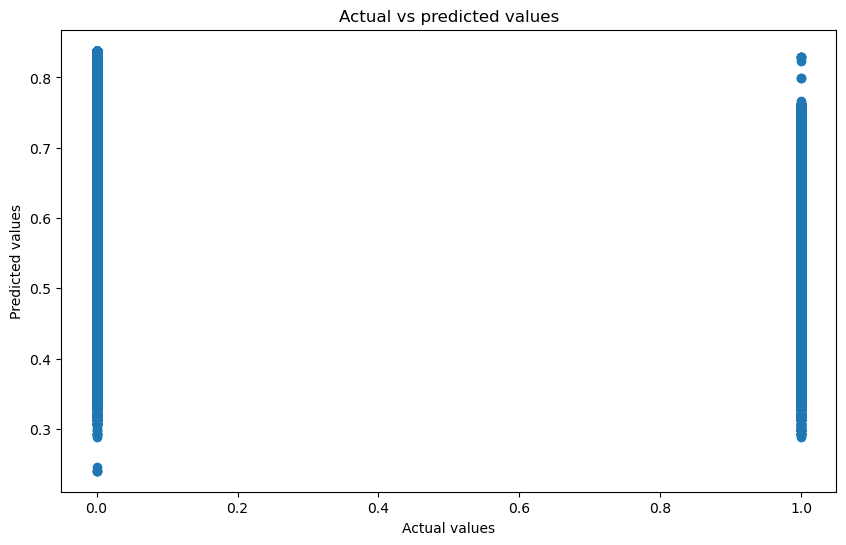

In [138]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual values vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs predicted values')
plt.show()


In [139]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Define the predictor and target variables
X = df[['age']]
y = df['ind_cco_fin_ult1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Check the model's coefficients
print('Coefficients: ', lr.coef_)

# Predict the target variable using the testing data
y_pred = lr.predict(X_test)

# Calculate the R^2 score for the model
r2 = r2_score(y_test, y_pred)
print('R^2 score: {:.2f}'.format(r2))


Coefficients:  [-0.0047791]
R^2 score: 0.03


<AxesSubplot:>

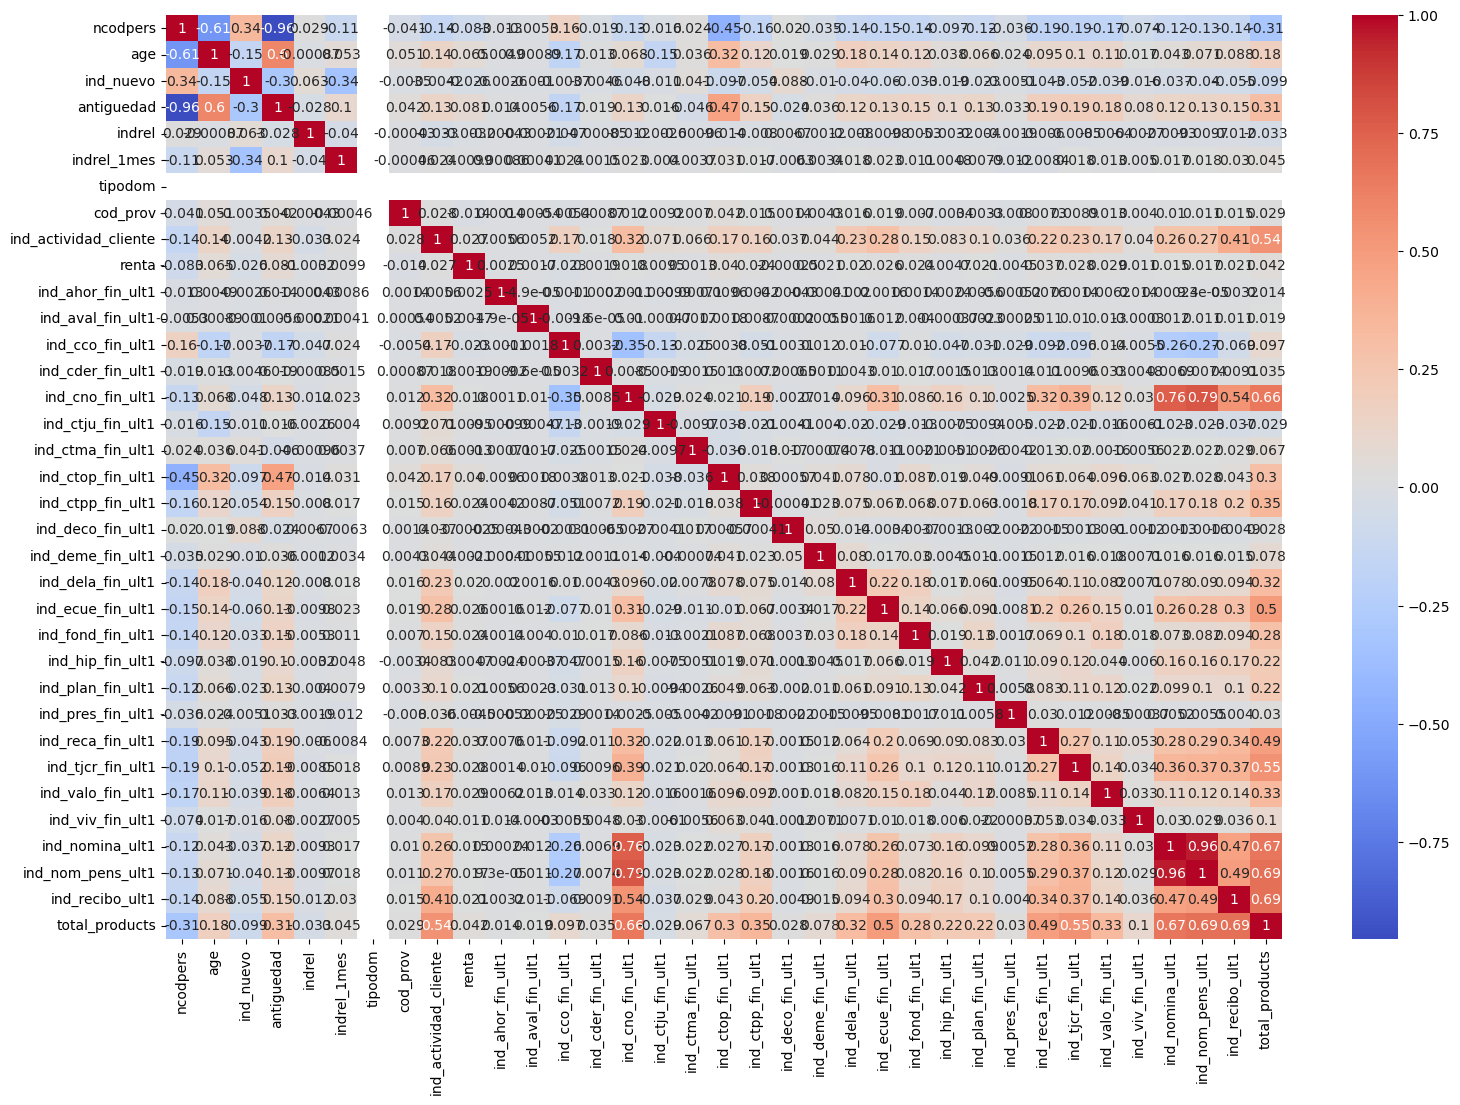

In [140]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(18, 12))
# Create a correlation matrix
corr = df.corr()

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)


<AxesSubplot:xlabel='ind_recibo_ult1', ylabel='age'>

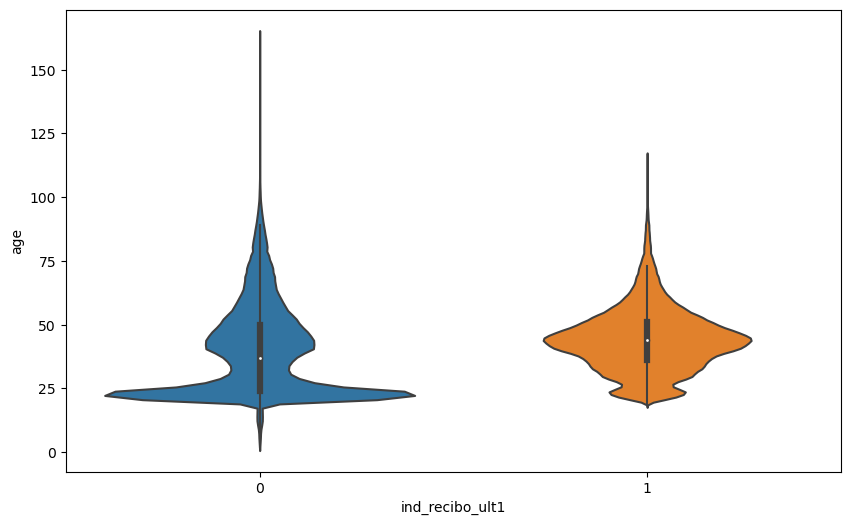

In [141]:
sns.violinplot(x='ind_recibo_ult1', y='age', data=df)


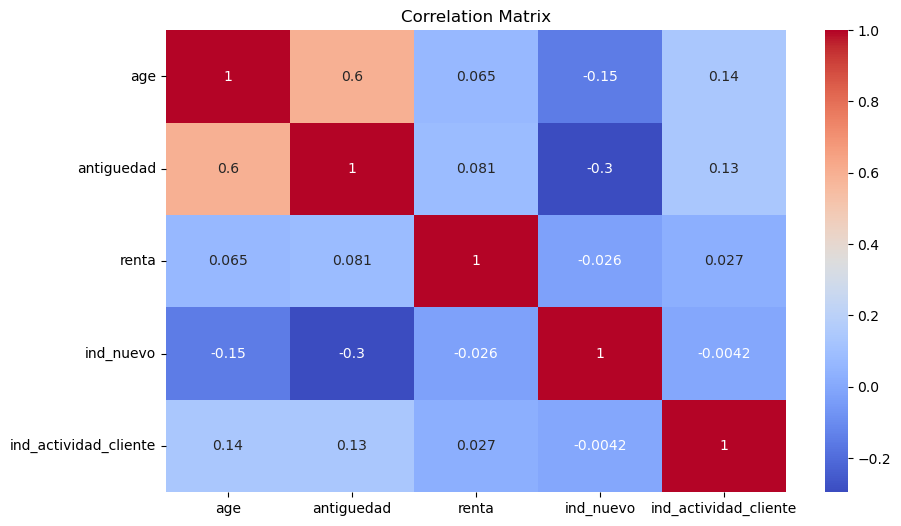

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix using the numerical columns in the dataset
num_cols = ['age', 'antiguedad', 'renta', 'ind_nuevo', 'ind_actividad_cliente']
corr_matrix = df[num_cols].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


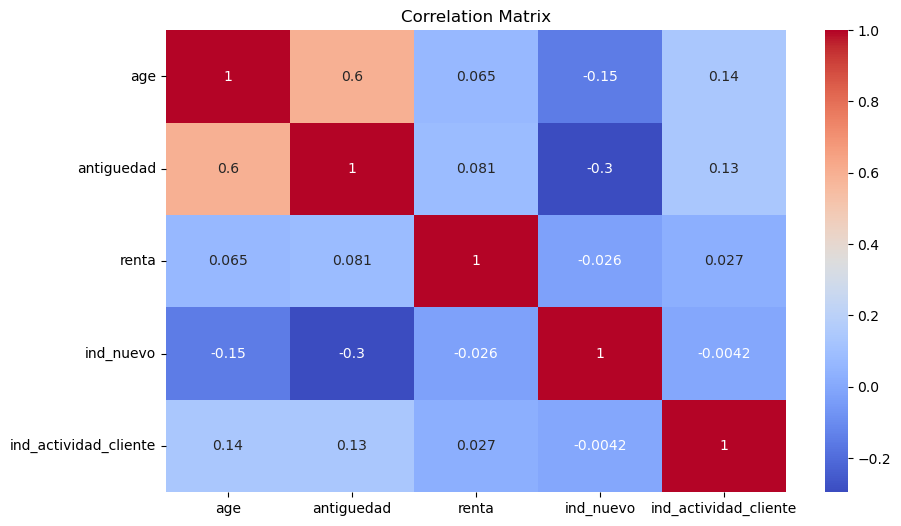

In [143]:
# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

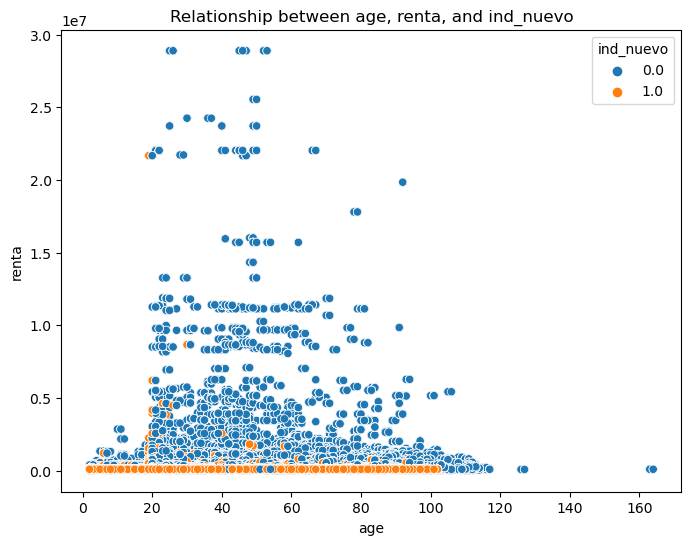

In [144]:
# Plot the relationship between age, renta, and ind_nuevo
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='renta', hue='ind_nuevo', data=df)
plt.title('Relationship between age, renta, and ind_nuevo')
plt.show()

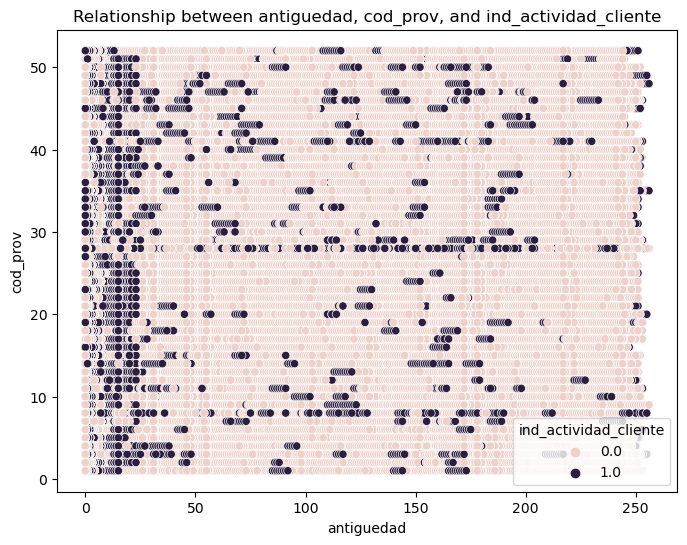

In [145]:
# Plot the relationship between antiguedad, cod_prov, and ind_actividad_cliente
plt.figure(figsize=(8,6))
sns.scatterplot(x='antiguedad', y='cod_prov', hue='ind_actividad_cliente', data=df)
plt.title('Relationship between antiguedad, cod_prov, and ind_actividad_cliente')
plt.show()

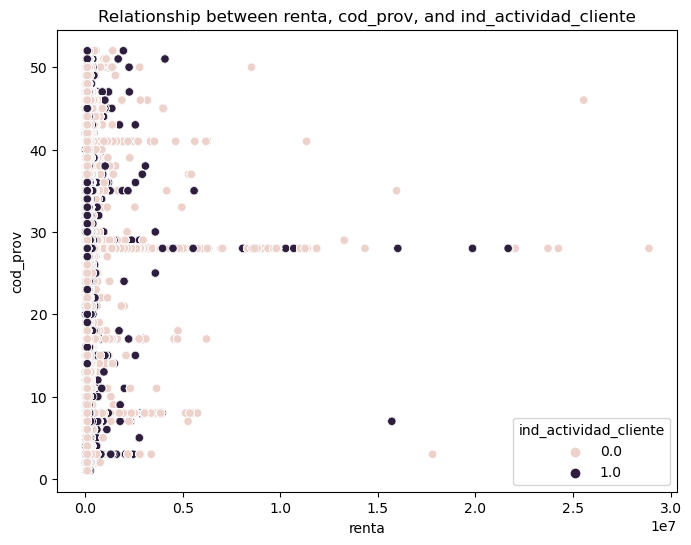

In [146]:
# Plot the relationship between renta, cod_prov, and ind_actividad_cliente
plt.figure(figsize=(8,6))
sns.scatterplot(x='renta', y='cod_prov', hue='ind_actividad_cliente', data=df)
plt.title('Relationship between renta, cod_prov, and ind_actividad_cliente')
plt.show()

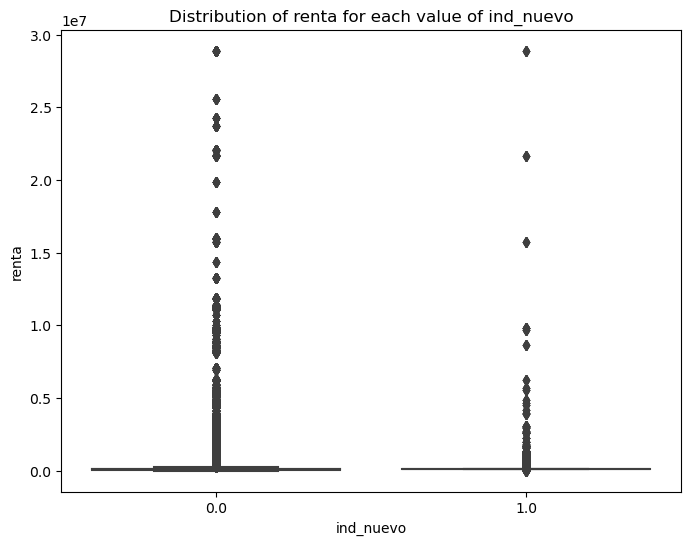

In [147]:
# Plot a boxplot of renta for each ind_nuevo value
plt.figure(figsize=(8,6))
sns.boxplot(x='ind_nuevo', y='renta', data=df)
plt.title('Distribution of renta for each value of ind_nuevo')
plt.show()

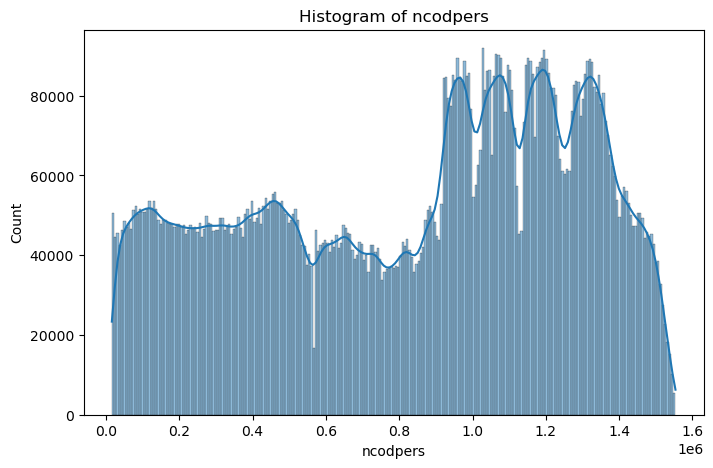

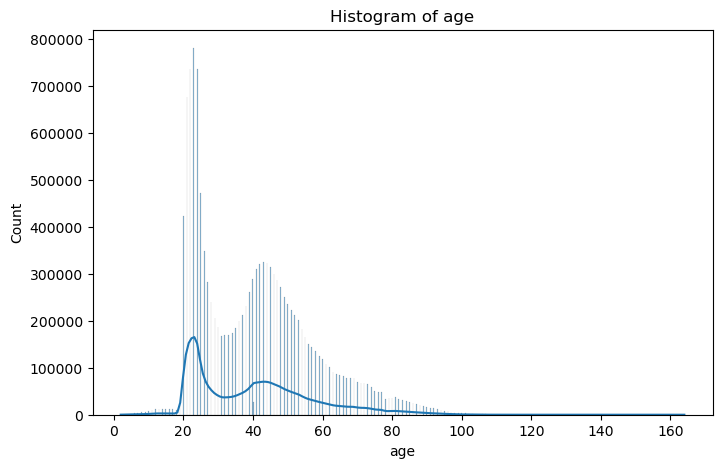

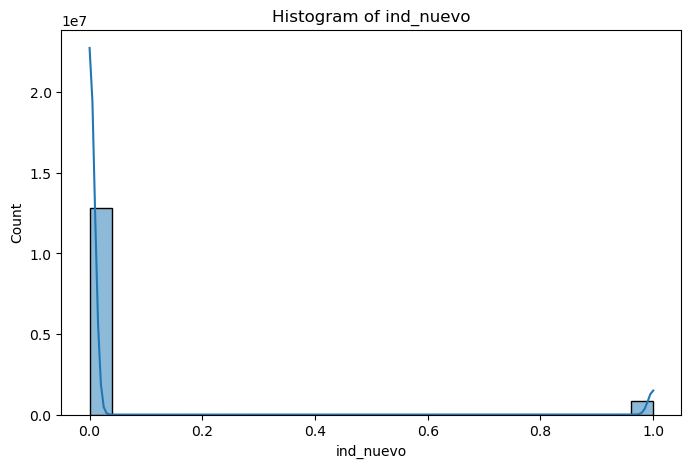

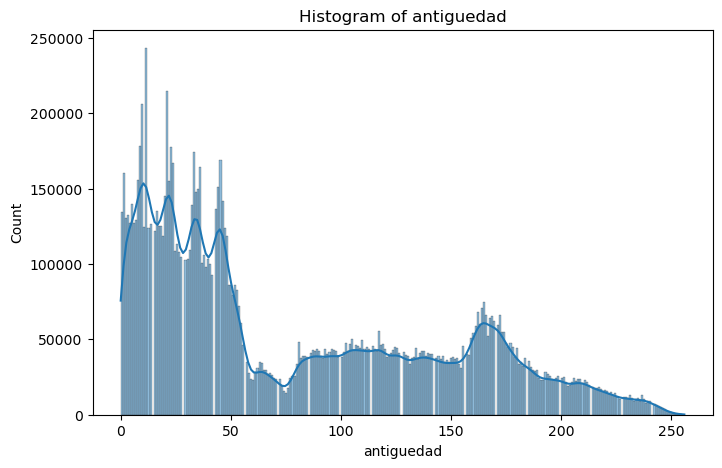

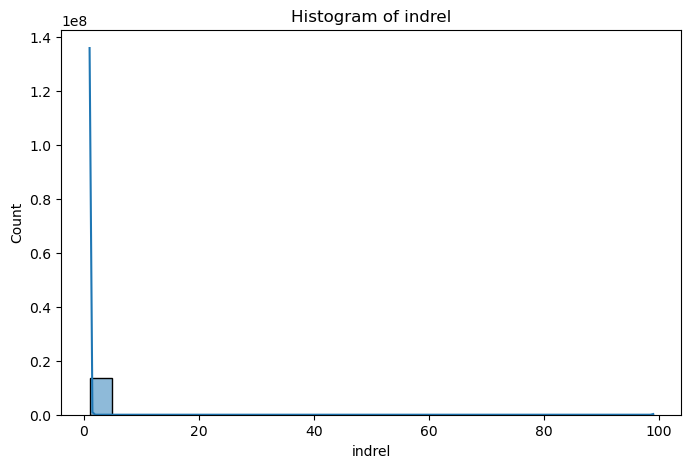

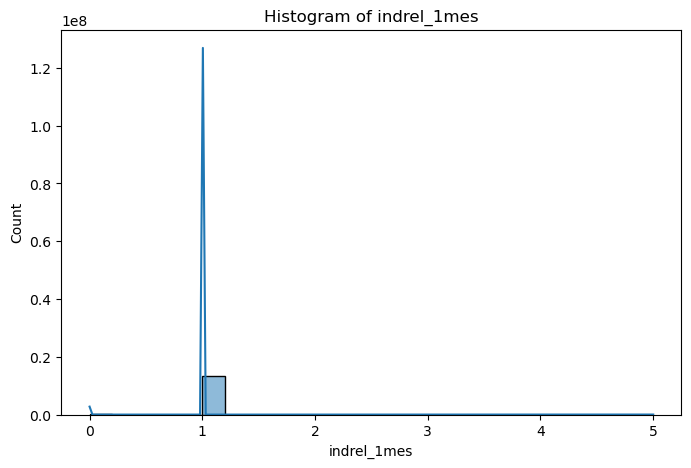

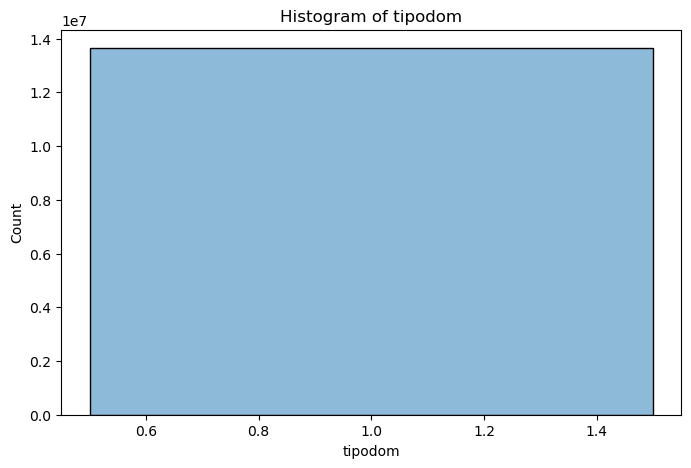

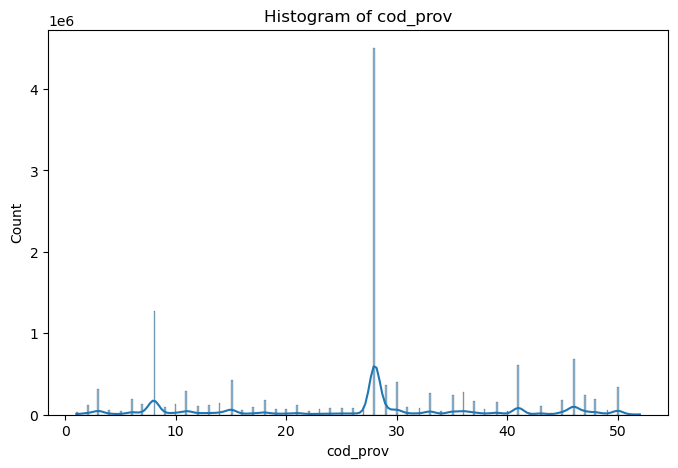

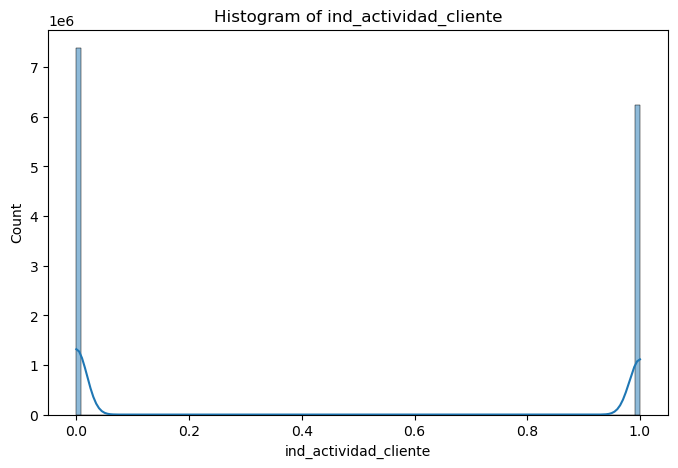

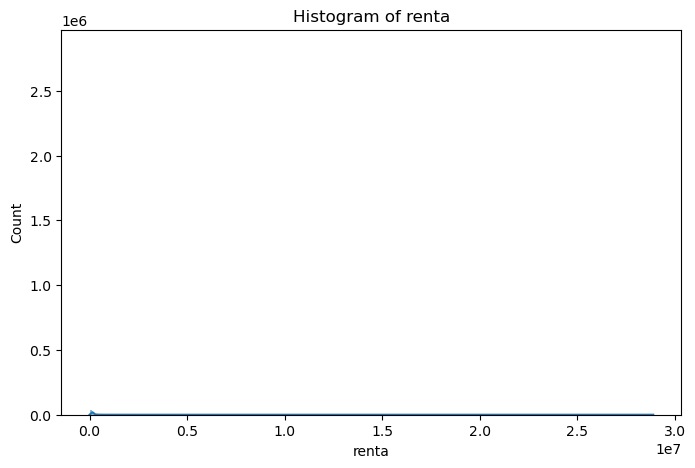

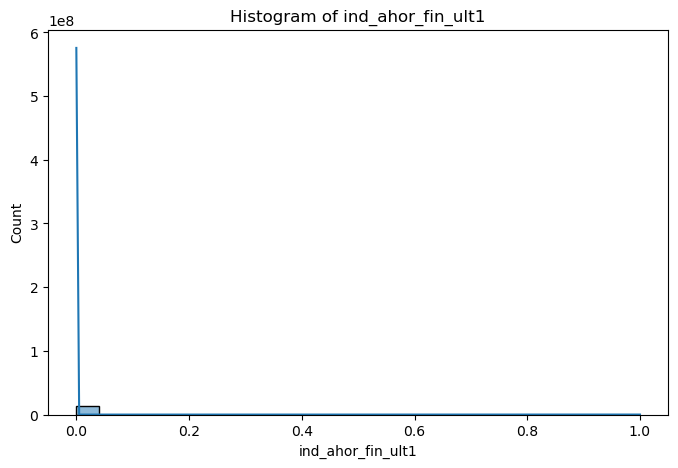

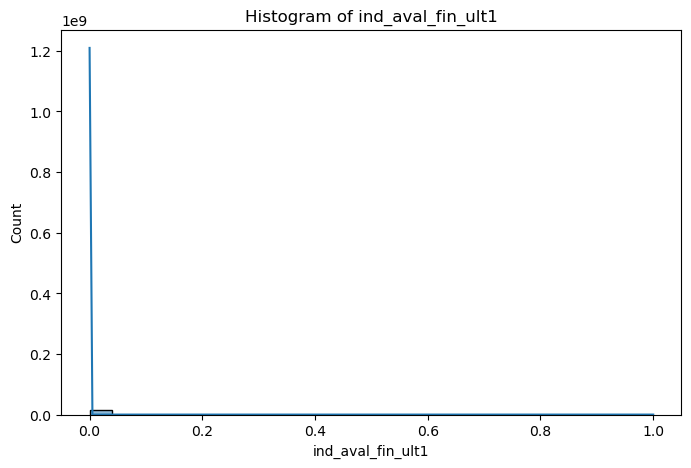

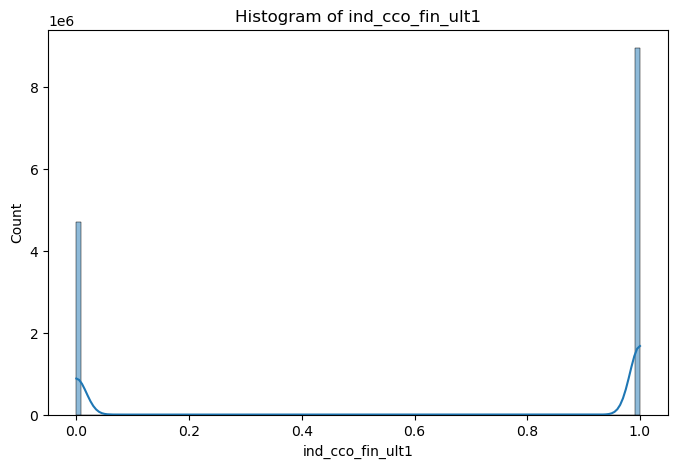

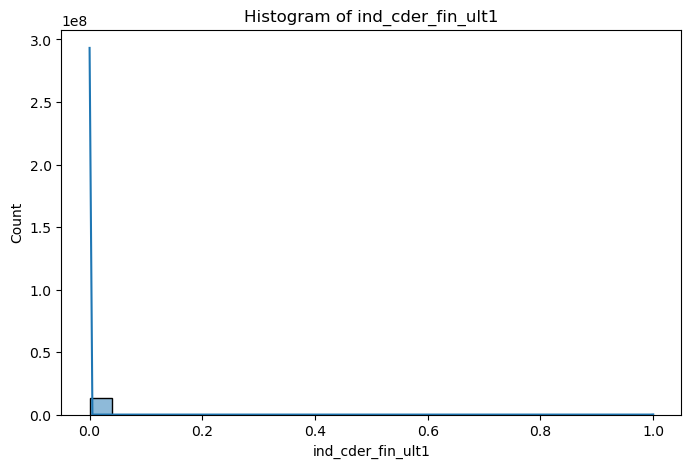

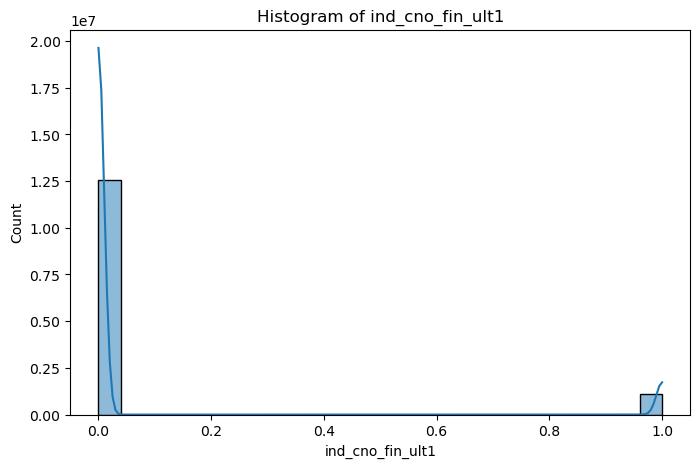

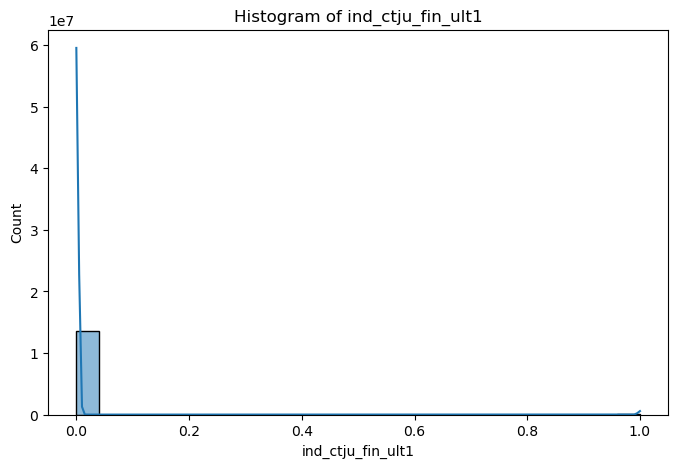

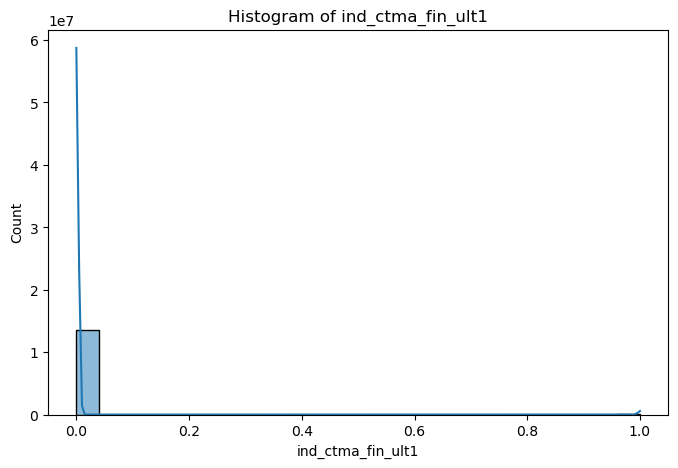

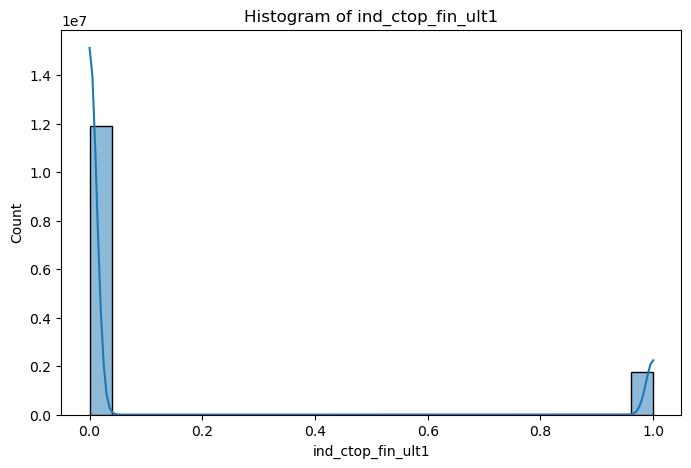

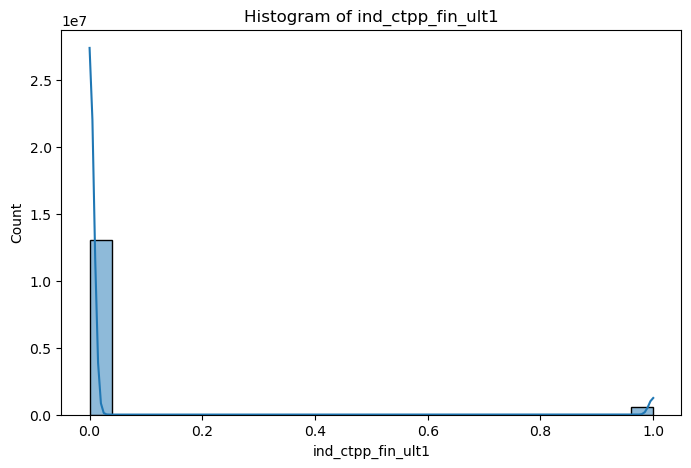

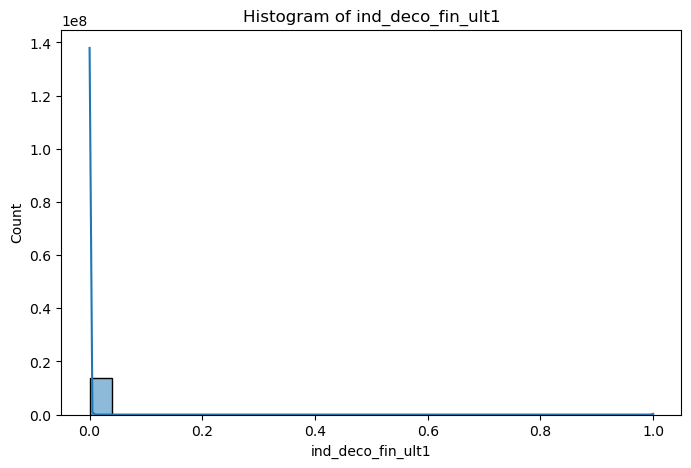

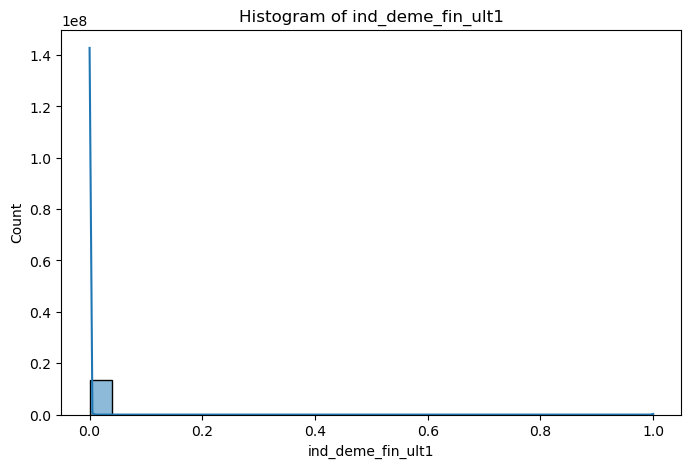

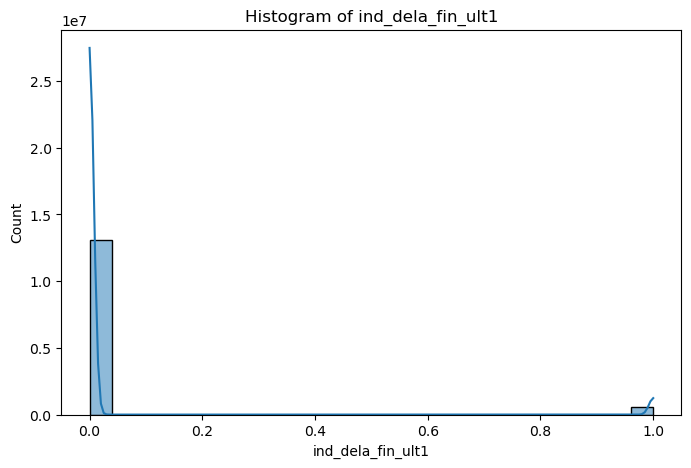

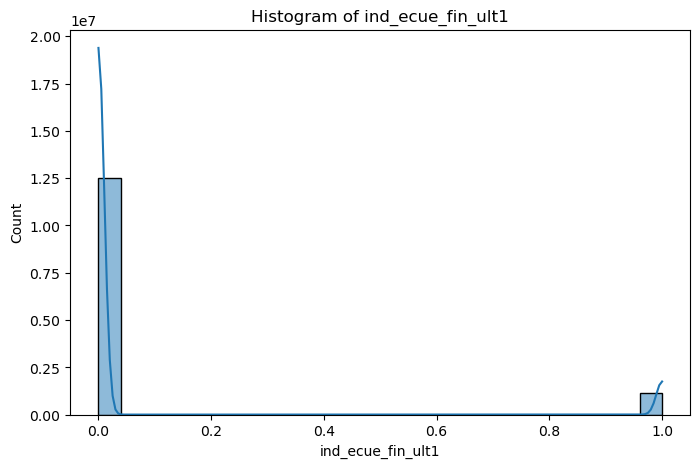

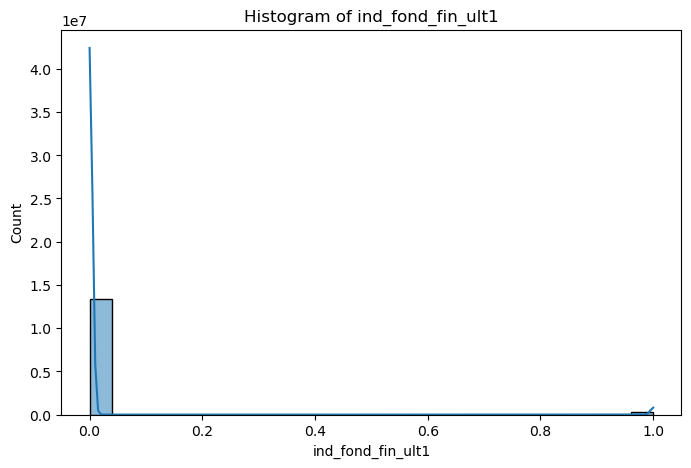

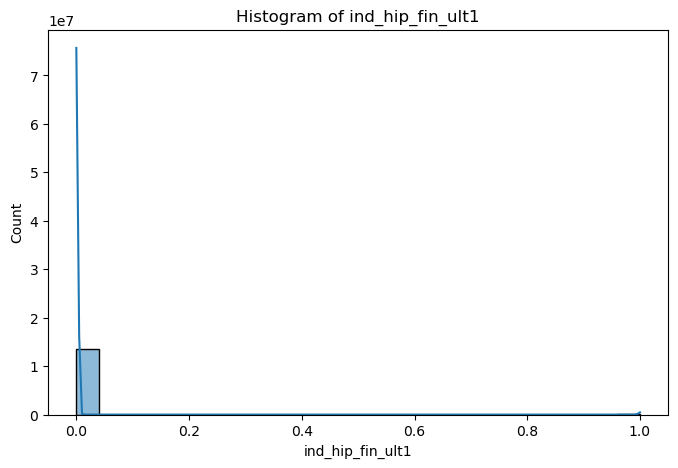

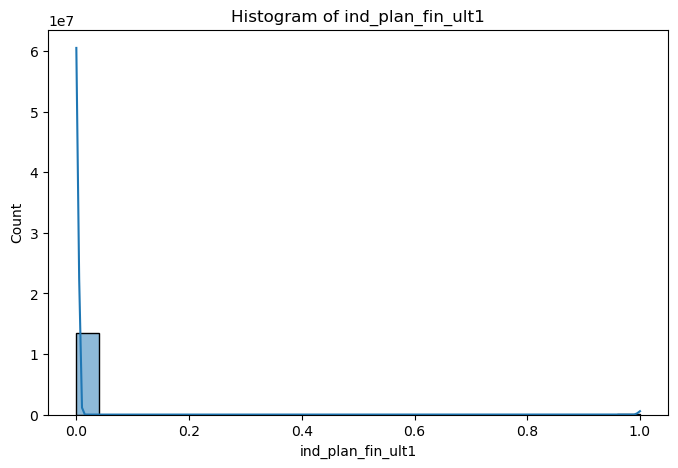

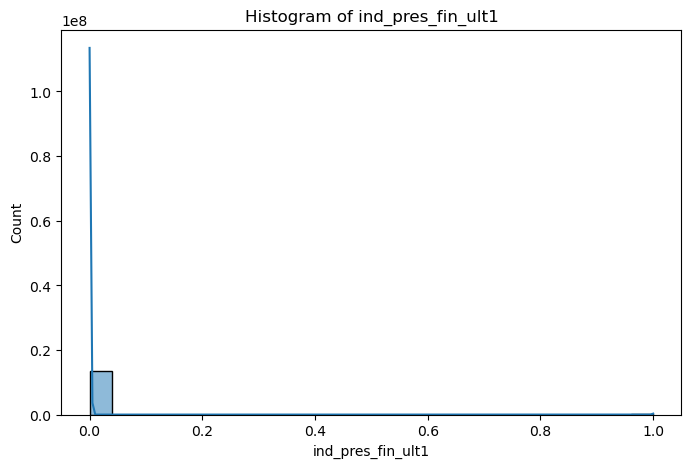

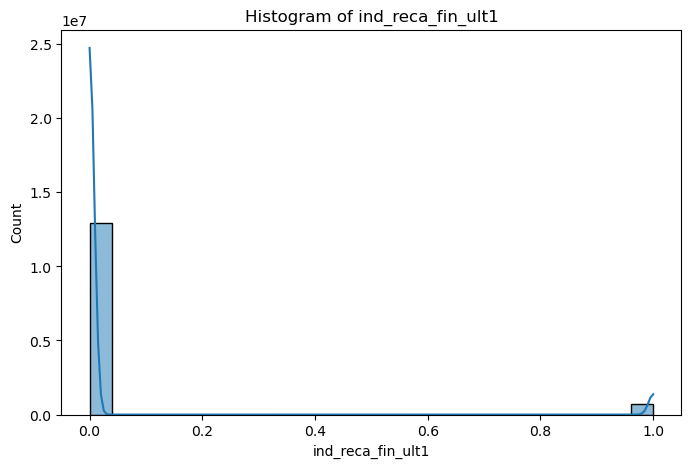

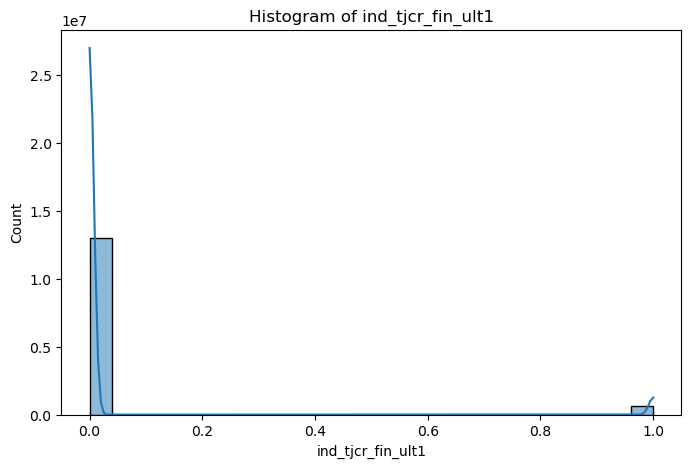

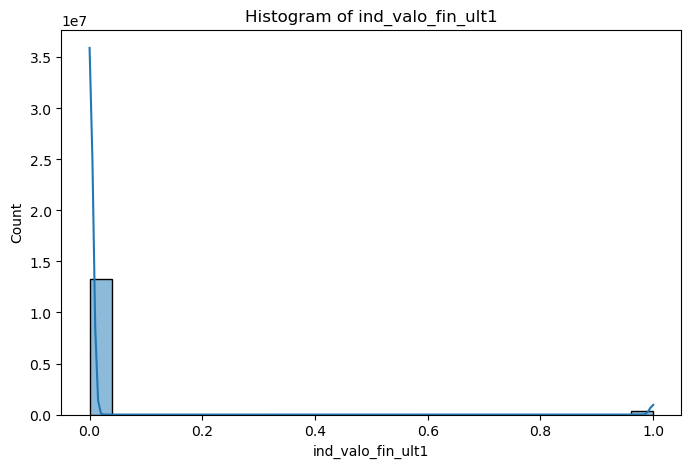

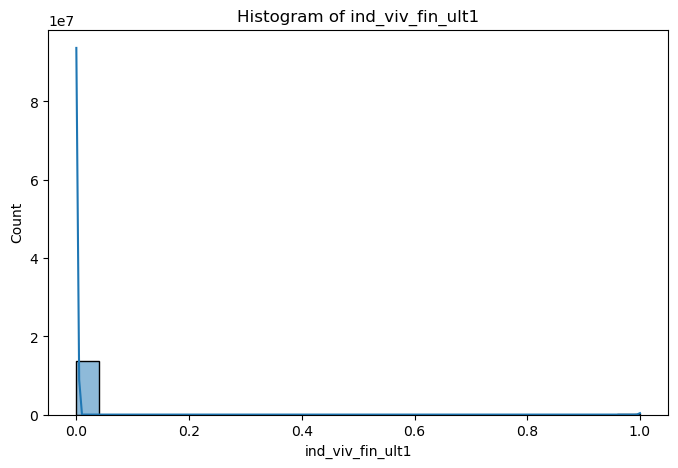

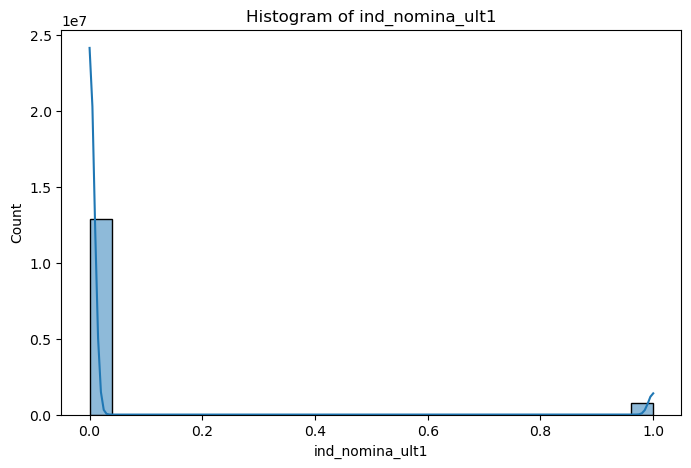

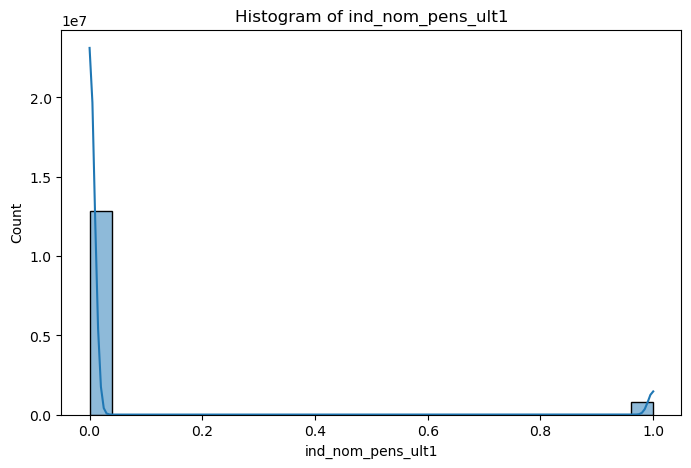

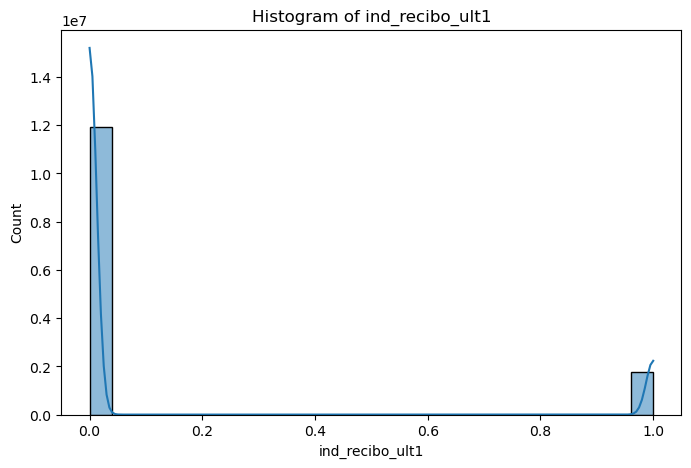

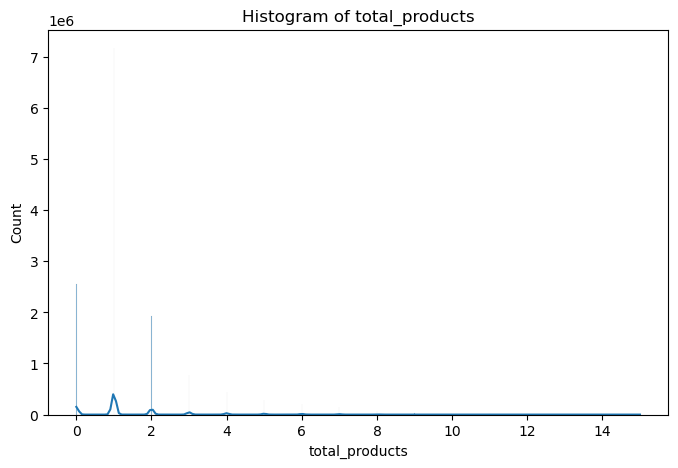

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# select the numerical columns for the histogram
num_cols = df.select_dtypes(include='number').columns

# plot the histograms using a loop
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

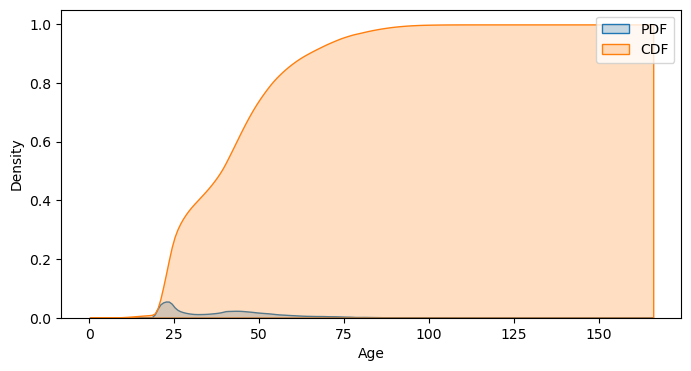

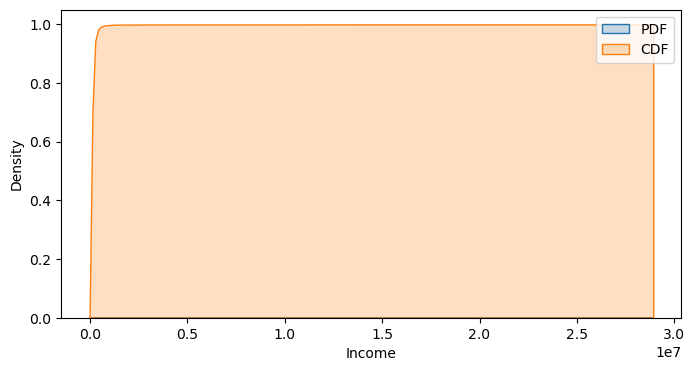

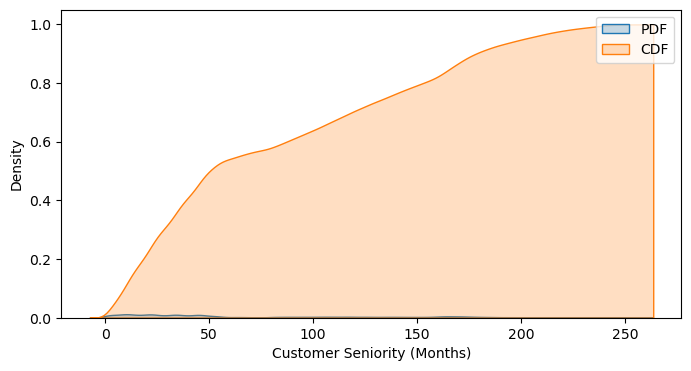

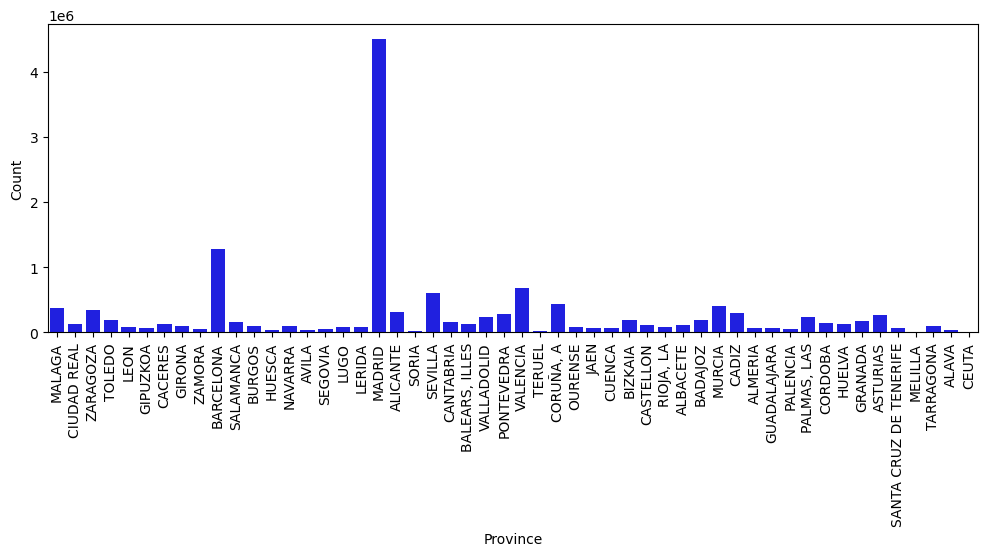

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


# select important columns
important_cols = ['age', 'renta', 'antiguedad', 'nomprov']

# remove rows with missing values in important columns
df = df.dropna(subset=important_cols)

# plot PDF and CDF for age
plt.figure(figsize=(8, 4))
sns.kdeplot(df['age'], shade=True, label='PDF')
sns.kdeplot(df['age'], shade=True, cumulative=True, label='CDF')
plt.xlabel('Age')
plt.legend()
plt.show()

# plot PDF and CDF for renta
plt.figure(figsize=(8, 4))
sns.kdeplot(df['renta'], shade=True, label='PDF')
sns.kdeplot(df['renta'], shade=True, cumulative=True, label='CDF')
plt.xlabel('Income')
plt.legend()
plt.show()

# plot PDF and CDF for antiguedad
plt.figure(figsize=(8, 4))
sns.kdeplot(df['antiguedad'], shade=True, label='PDF')
sns.kdeplot(df['antiguedad'], shade=True, cumulative=True, label='CDF')
plt.xlabel('Customer Seniority (Months)')
plt.legend()
plt.show()

# plot PDF and CDF for nomprov
plt.figure(figsize=(12, 4))
sns.countplot(x='nomprov', data=df, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Province')
plt.ylabel('Count')
plt.show()
